In [2120]:
# FALTA:
# - Eliminar columnas que no sirven.
# - Tratar valores nulos (eliminar o reemplazar, ya sea con un promedio o un nuevo valor).
# - Pasar a valores cuantitativos.

# Inicializador

In [2121]:
# Biblioteca Numerical Python, para la computación científica
import numpy as np

# Biblioteca para las estructuras y análisis de datos
import pandas as pd

# Biblioteca para visualizaciones y gráficos
import matplotlib.pyplot as plt

# Complemento para gráficos estadísticos
import seaborn as sns

# Para ignorar advertencias
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Para compatibilidad entre múltiples plataformas
import os
IB = os.environ.get('INSTABASE_URI', None) is not None
open = ib.open if IB else open

# Biblioteca te aprendizaje automático (Machine Learning)
import sklearn.metrics
#from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Funciones

In [2122]:
#Función para asignar un valor numerico a una variable cualitativa
def to_quantitative(column):
    cont=0
    dic={}
    values_checked=[]
    values=datos[column].values
    for v in values:
        if v not in values_checked:
            dic[v]=cont
            cont+=1
            values_checked.append(v)
    datos.loc[:,column]=datos[column].map(dic)
    return dic

# Cargando archivos

In [2123]:
# Se carga los dataset de atropellos en la Región Metropolitana
#, names='X,Y,FID,ICOUNT,Año,Cód_Comuna,Comuna,Cód_Región,Región,Calle_Uno,Calle_Dos,Número,Dirección,Fallecidos,Graves,Menos_Grav,Leves,Accidentes'
#datos_2013 = pd.read_csv('siniestro_atropello_RM2013.csv', sep=',', encoding='latin-1')
#datos_2013 = pd.read_csv('siniestro_atropello_RM2013.csv', sep=',', encoding='utf-8')
#datos_2013 = pd.read_csv('siniestro_atropello_RM2013.csv', sep=',')

datos_2013 = pd.read_csv('siniestro 2013.csv')
datos_2014 = pd.read_csv('siniestro 2014.csv', na_values=[" "])
datos_2015 = pd.read_csv('siniestro 2015.csv')
datos_2016 = pd.read_csv('siniestro 2016.csv', na_values=[" "])
datos_2017 = pd.read_csv('siniestro 2017.csv')
#datos_2014 = pd.read_csv('siniestro_atropello_RM2014.csv', sep=',')
#datos_2015 = pd.read_csv('siniestro_atropello_RM2015.csv', sep=',')
#datos_2016 = pd.read_csv('siniestro_atropello_RM2016.csv', sep=',')
#datos_2017 = pd.read_csv('siniestro_atropello_RM2017.csv', sep=',')
#datos_2016 = pd.read_csv('siniestro_atropello_RM2016.csv', sep=',', encoding='latin-1')
#datos_2017 = pd.read_csv('siniestro_atropello_RM2017.csv', sep=',', encoding='latin-1')

# Estado original de los datos

DATAFRAME: 
              X          Y   FID  ICOUNT  Anho  Cod_Comuna         Comuna  \
0    -70.714761 -33.621957     1       1  2013       13401   SAN BERNARDO   
1    -70.713433 -33.629206     2       1  2013       13401   SAN BERNARDO   
2    -70.712113 -33.601339     3       1  2013       13401   SAN BERNARDO   
3    -70.710571 -33.601829     4       1  2013       13401   SAN BERNARDO   
4    -70.707259 -33.636547     5       1  2013       13101       SANTIAGO   
5    -70.706052 -33.607581     6       1  2013       13401   SAN BERNARDO   
6    -70.703659 -33.613648     7       1  2013       13401   SAN BERNARDO   
7    -70.699158 -33.618561     8       1  2013       13401   SAN BERNARDO   
8    -70.697107 -33.600392     9       1  2013       13401   SAN BERNARDO   
9    -70.694671 -33.619191    10       1  2013       13401   SAN BERNARDO   
10   -70.685910 -33.603031    11       1  2013       13401   SAN BERNARDO   
11   -70.682573 -33.604873    12       1  2013       13401   SAN

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CCAF71B00>


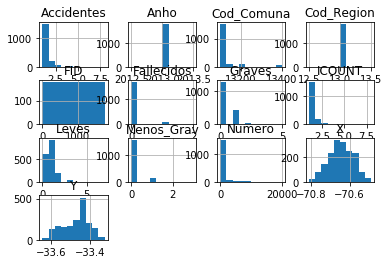

In [2124]:
# 2013

print('DATAFRAME: ')
print(datos_2013)
print('--------------------------------------------')
print('DESCRIPCIÓN CUANTITATIVA:')
print(datos_2013.describe())
print('--------------------------------------------')
print('TIPO DE LAS COLUMNAS:')
print(datos_2013.dtypes)
print('--------------------------------------------')
print('HISTOGRAMA:')
print(datos_2013.hist())

DATAFRAME: 
              X          Y   FID  OBJECTID  ICOUNT                Region  \
0    -70.797727 -33.456009     1         1       1  REGION METROPOLITANA   
1    -70.796959 -33.516373     2         2       1  REGION METROPOLITANA   
2    -70.795044 -33.516192     3         3       1  REGION METROPOLITANA   
3    -70.794488 -33.514124     4         4       1  REGION METROPOLITANA   
4    -70.793303 -33.532115     5         5       1  REGION METROPOLITANA   
5    -70.791389 -33.505505     6         6       1  REGION METROPOLITANA   
6    -70.790715 -33.512344     7         7       1  REGION METROPOLITANA   
7    -70.788130 -33.537179     8         8       1  REGION METROPOLITANA   
8    -70.786953 -33.524725     9         9       1  REGION METROPOLITANA   
9    -70.782614 -33.365751    10        10       1  REGION METROPOLITANA   
10   -70.785381 -33.518402    11        11       1  REGION METROPOLITANA   
11   -70.784387 -33.515680    12        12       1  REGION METROPOLITANA   


[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CC8A59320>


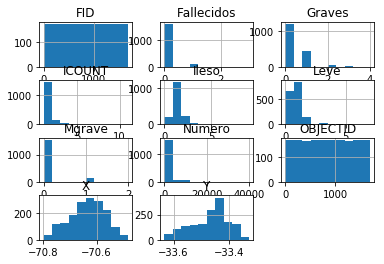

In [2125]:
# 2014

print('DATAFRAME: ')
print(datos_2014)
print('--------------------------------------------')
print('DESCRIPCIÓN CUANTITATIVA:')
print(datos_2014.describe())
print('--------------------------------------------')
print('TIPO DE LAS COLUMNAS:')
print(datos_2014.dtypes)
print('--------------------------------------------')
print('HISTOGRAMA:')
print(datos_2014.hist())

DATAFRAME: 
              X          Y   FID  \
0    -70.798508 -33.364435     1   
1    -70.797142 -33.354941     2   
2    -70.797944 -33.511716     3   
3    -70.797199 -33.513151     4   
4    -70.797021 -33.518601     5   
5    -70.795022 -33.553664     6   
6    -70.793611 -33.526045     7   
7    -70.792403 -33.508712     8   
8    -70.791895 -33.524834     9   
9    -70.791389 -33.505507    10   
10   -70.791437 -33.520368    11   
11   -70.791295 -33.519198    12   
12   -70.790712 -33.512344    13   
13   -70.790341 -33.507939    14   
14   -70.788002 -33.542313    15   
15   -70.786628 -33.511645    16   
16   -70.784184 -33.506892    17   
17   -70.783792 -33.509819    18   
18   -70.782385 -33.533079    19   
19   -70.781500 -33.532442    20   
20   -70.779086 -33.443957    21   
21   -70.779277 -33.508568    22   
22   -70.779115 -33.513286    23   
23   -70.779196 -33.532971    24   
24   -70.778536 -33.525992    25   
25   -70.778004 -33.508929    26   
26   -70.778223 

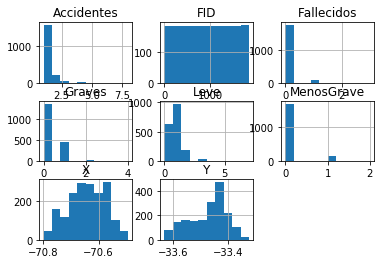

In [2126]:
# 2015

print('DATAFRAME: ')
print(datos_2015)
print('--------------------------------------------')
print('DESCRIPCIÓN CUANTITATIVA:')
print(datos_2015.describe())
print('--------------------------------------------')
print('TIPO DE LAS COLUMNAS:')
print(datos_2015.dtypes)
print('--------------------------------------------')
print('HISTOGRAMA:')
print(datos_2015.hist())

DATAFRAME: 
              X          Y   FID  ICOUNT         Comuna  Anho  Clase_Acci  \
0    -70.921865 -33.088773     1       1         TILTIL  2016           1   
1    -70.918988 -33.089121     2       1         TILTIL  2016           1   
2    -70.881707 -33.278868     3       1          LAMPA  2016           1   
3    -70.873056 -33.285780     4       1          LAMPA  2016           1   
4    -70.870458 -33.282819     5       1          LAMPA  2016           1   
5    -70.869087 -33.384302     6       1       PUDAHUEL  2016           1   
6    -70.856193 -33.403052     7       1       PUDAHUEL  2016           1   
7    -70.818879 -33.427293     8       1       PUDAHUEL  2016           1   
8    -70.815940 -33.224321     9       1          LAMPA  2016           1   
9    -70.811113 -33.566032    10       1          MAIPU  2016           1   
10   -70.809930 -33.226595    11       1          LAMPA  2016           1   
11   -70.797949 -33.511712    12       2          MAIPU  2016   

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CC808DCF8>


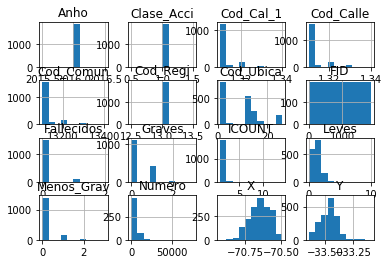

In [2127]:
# 2016

print('DATAFRAME: ')
print(datos_2016)
print('--------------------------------------------')
print('DESCRIPCIÓN CUANTITATIVA:')
print(datos_2016.describe())
print('--------------------------------------------')
print('TIPO DE LAS COLUMNAS:')
print(datos_2016.dtypes)
print('--------------------------------------------')
print('HISTOGRAMA:')
print(datos_2016.hist())

DATAFRAME: 
              X          Y   FID  \
0    -70.542220 -33.473719  2001   
1    -70.542197 -33.450019  2002   
2    -70.541772 -33.476860  2003   
3    -70.541637 -33.476406  2004   
4    -70.541548 -33.462810  2005   
5    -70.541185 -33.416711  2006   
6    -70.540981 -33.473960  2007   
7    -70.540956 -33.458449  2008   
8    -70.540920 -33.592443  2009   
9    -70.540753 -33.440474  2010   
10   -70.540607 -33.413161  2011   
11   -70.540146 -33.420876  2012   
12   -70.540057 -33.405388  2013   
13   -70.539934 -33.356379  2014   
14   -70.539931 -33.476440  2015   
15   -70.539709 -33.353435  2016   
16   -70.539534 -33.462015  2017   
17   -70.538701 -33.427063  2018   
18   -70.538210 -33.423378  2019   
19   -70.537169 -33.380272  2020   
20   -70.536974 -33.452651  2021   
21   -70.536405 -33.453735  2022   
22   -70.535878 -33.403869  2023   
23   -70.535582 -33.420719  2024   
24   -70.535504 -33.420701  2025   
25   -70.534387 -33.464618  2026   
26   -70.534329 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CCAB4BBE0>


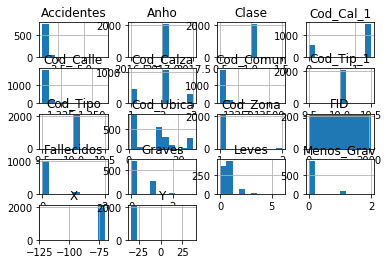

In [2128]:
# 2017

print('DATAFRAME: ')
print(datos_2017)
print('--------------------------------------------')
print('DESCRIPCIÓN CUANTITATIVA:')
print(datos_2017.describe())
print('--------------------------------------------')
print('TIPO DE LAS COLUMNAS:')
print(datos_2017.dtypes)
print('--------------------------------------------')
print('HISTOGRAMA:')
print(datos_2017.hist())

# Limpieza

## Datos 2013

In [2129]:
# Muchas
#datos_2013.X.unique()

# Muchas
#datos_2013.Y.unique()

# Una por cada registro
#datos_2013.FID.unique()

# ICOUNT = 1, 2, 3, 4, 5, 6, 7, 8 
#datos_2013.ICOUNT.unique()

# Anho = 2013
#datos_2013.Anho.unique()

# Borrados:
#datos_2013.Cod_Comuna.unique()
#datos_2013.Cod_Region.unique()


# Comuna =
# 'SAN BERNARDO',
# 'SANTIAGO',
# 'EL BOSQUE',
# 'MAIPU',
# 'CERRILLOS',
# 'LO ESPEJO',
# 'LA CISTERNA',
# 'PEDRO AGUIRRE CERDA',
# 'LA PINTANA',
# 'PUENTE ALTO',
# 'LA FLORIDA',
# 'SAN RAMON',
# 'LA GRANJA',
# 'RECOLETA',
# 'HUECHURABA',
# 'PROVIDENCIA',
# 'LAS CONDES',
# 'VITACURA',
# 'PENALOLEN',
# 'LA REINA',
# 'LO BARNECHEA',
# 'INDEPENDENCIA',
# 'PUDAHUEL',
# 'QUINTA NORMAL',
# 'QUILICURA',
# 'RENCA',
# 'CONCHALI',
# 'SAN JOAQUIN',
# 'SAN MIGUEL',
# '\xd1U\xd1OA',
# 'MACUL',
# 'ESTACION CENTRAL',
# 'LO PRADO',
# 'CERRO NAVIA'
datos_2013.Comuna.unique()

# Region = REGION METROPOLITANA
#datos_2013.Region.unique()

# Muchas
#datos_2013.Calle_Uno.unique()

# Muchas
#datos_2013.Calle_Dos.unique()

# Número de la casa
#datos_2013.Numero.unique()

# Muchas
#datos_2013.Direccion.unique()

# Fallecidos = 0, 1, 2
#datos_2013.Fallecidos.unique()

# Graves = 0, 1, 2, 3, 4, 5
#datos_2013.Graves.unique()

# Menos_Grav = 0, 1, 2, 3
#datos_2013.Menos_Grav.unique()

# Leves = 0, 1, 2, 3, 4, 5, 6, 7
#datos_2013.Leves.unique()

# Accidentes = 1, 2, 3, 4, 5, 6, 7, 8
#datos_2013.Accidentes.unique()

array(['SAN BERNARDO', 'SANTIAGO', 'EL BOSQUE', 'MAIPU', 'CERRILLOS',
       'LO ESPEJO', 'LA CISTERNA', 'PEDRO AGUIRRE CERDA', 'LA PINTANA',
       'PUENTE ALTO', 'LA FLORIDA', 'SAN RAMON', 'LA GRANJA', 'RECOLETA',
       'HUECHURABA', 'PROVIDENCIA', 'LAS CONDES', 'VITACURA', 'PENALOLEN',
       'LA REINA', 'LO BARNECHEA', 'INDEPENDENCIA', 'PUDAHUEL',
       'QUINTA NORMAL', 'QUILICURA', 'RENCA', 'CONCHALI', 'SAN JOAQUIN',
       'SAN MIGUEL', 'ÑUÑOA', 'MACUL', 'ESTACION CENTRAL', 'LO PRADO',
       'CERRO NAVIA'], dtype=object)

In [2130]:
datos_2013

X          Y   FID  ICOUNT  Anho  Cod_Comuna         Comuna  \
0    -70.714761 -33.621957     1       1  2013       13401   SAN BERNARDO   
1    -70.713433 -33.629206     2       1  2013       13401   SAN BERNARDO   
2    -70.712113 -33.601339     3       1  2013       13401   SAN BERNARDO   
3    -70.710571 -33.601829     4       1  2013       13401   SAN BERNARDO   
4    -70.707259 -33.636547     5       1  2013       13101       SANTIAGO   
5    -70.706052 -33.607581     6       1  2013       13401   SAN BERNARDO   
6    -70.703659 -33.613648     7       1  2013       13401   SAN BERNARDO   
7    -70.699158 -33.618561     8       1  2013       13401   SAN BERNARDO   
8    -70.697107 -33.600392     9       1  2013       13401   SAN BERNARDO   
9    -70.694671 -33.619191    10       1  2013       13401   SAN BERNARDO   
10   -70.685910 -33.603031    11       1  2013       13401   SAN BERNARDO   
11   -70.682573 -33.604873    12       1  2013       13401   SAN BERNARDO   
12   -70.682212 -33.616943    13       1  2013       13401   SAN BERNARDO   
13   -70.714333 -33.597314    14       1  2013       13401   SAN BERNARDO   
14   -70.712020 -33.597796    15       1  2013       13401   SAN BERNARDO   
15   -70.711417 -33.588092    16       1  2013       13401   SAN BERNARDO   
16   -70.711319 -33.597926    17       1  2013       13401   SAN BERNARDO   
17   -70.708012 -33.595922    18       2  2013       13401   SAN BERNARDO   
18   -70.706575 -33.596167    19       1  2013       13401   SAN BERNARDO   
19   -70.706279 -33.596152    20       1  2013       13401   SAN BERNARDO   
20   -70.705212 -33.596632    21       1  2013       13401   SAN BERNARDO   
21   -70.705182 -33.596358    22       3  2013       13401   SAN BERNARDO   
22   -70.704594 -33.594661    23       1  2013       13401   SAN BERNARDO   
23   -70.704002 -33.592983    24       1  2013       13401   SAN BERNARDO   
24   -70.703644 -33.591888    25       3  2013       13401   SAN BERNARDO   
25   -70.707588 -33.590959    26       1  2013       13401   SAN BERNARDO   
26   -70.707082 -33.586800    27       1  2013       13401   SAN BERNARDO   
27   -70.704914 -33.591595    28       1  2013       13401   SAN BERNARDO   
28   -70.703005 -33.590228    29       1  2013       13401   SAN BERNARDO   
29   -70.702788 -33.589913    30       1  2013       13401   SAN BERNARDO   
...         ...        ...   ...     ...   ...         ...            ...   
1738 -70.683281 -33.432890  1739       1  2013       13126  QUINTA NORMAL   
1739 -70.681682 -33.432983  1740       1  2013       13126  QUINTA NORMAL   
1740 -70.681614 -33.433822  1741       1  2013       13126  QUINTA NORMAL   
1741 -70.680585 -33.431668  1742       1  2013       13101       SANTIAGO   
1742 -70.680536 -33.433043  1743       2  2013       13126  QUINTA NORMAL   
1743 -70.680276 -33.435837  1744       5  2013       13126  QUINTA NORMAL   
1744 -70.679913 -33.428033  1745       1  2013       13101       SANTIAGO   
1745 -70.679364 -33.433682  1746       1  2013       13101       SANTIAGO   
1746 -70.677068 -33.435435  1747       1  2013       13101       SANTIAGO   
1747 -70.674849 -33.433400  1748       1  2013       13101       SANTIAGO   
1748 -70.674696 -33.435143  1749       1  2013       13101       SANTIAGO   
1749 -70.672050 -33.435025  1750       1  2013       13101       SANTIAGO   
1750 -70.671819 -33.428317  1751       1  2013       13101       SANTIAGO   
1751 -70.671466 -33.435068  1752       1  2013       13101       SANTIAGO   
1752 -70.671320 -33.432237  1753       1  2013       13101       SANTIAGO   
1753 -70.669804 -33.432195  1754       1  2013       13101       SANTIAGO   
1754 -70.669608 -33.429190  1755       1  2013       13101       SANTIAGO   
1755 -70.669496 -33.429410  1756       1  2013       13101       SANTIAGO   
1756 -70.669211 -33.432123  1757       1  2013       13101       SANTIAGO   
1757 -70.669111 -33.433008  1758       1  2013       13101       SANTIAGO   
1758 -70.6

In [2131]:
#Renombre-Eliminación de columnas año 2013

# La región siempre es RM
datos_2013 = datos_2013.drop('Region', 1)

# Vamos a usar nuestros propios códigos
#datos_2013 = datos_2013.drop('Cód_Región'.encode('latin-1'), 1)
datos_2013 = datos_2013.drop('Cod_Region', 1)
datos_2013 = datos_2013.drop('Cod_Comuna', 1)

# Renombramos las columnas para juntar los Excel
datos_2013 = datos_2013.rename(columns={'Menos_Grav': 'Menos_Grav'})

In [2132]:
datos_2013.head()

X          Y  FID  ICOUNT  Anho        Comuna  \
0 -70.714761 -33.621957    1       1  2013  SAN BERNARDO   
1 -70.713433 -33.629206    2       1  2013  SAN BERNARDO   
2 -70.712113 -33.601339    3       1  2013  SAN BERNARDO   
3 -70.710571 -33.601829    4       1  2013  SAN BERNARDO   
4 -70.707259 -33.636547    5       1  2013      SANTIAGO   

                               Calle_Uno       Calle_Dos  Numero  \
0  PRESIDENTE JORGE ALESSANDRI RODRIGUEZ                   12489   
1  PRESIDENTE JORGE ALESSANDRI RODRIGUEZ                   20040   
2                        CALLE 1 DE MAYO      EYZAGUIRRE       0   
3                        CALLE 1 DE MAYO  FIDEL PINOCHET       0   
4                               PORTALES                    3000   

                                     Direccion  Fallecidos  Graves  \
0  PRESIDENTE JORGE ALESSANDRI RODRIGUEZ 12489           1       0   
1  PRESIDENTE JORGE ALESSANDRI RODRIGUEZ 20040           0       0   
2                 CALLE 1 DE MAYO / EYZAGUIRRE           0       0   
3             CALLE 1 DE MAYO / FIDEL PINOCHET           1       0   
4                                PORTALES 3000           0       1   

   Menos_Grav  Leves  Accidentes  
0           0      0           1  
1           0      1           1  
2           0      1           1  
3           0      0           1  
4           0      0           1

In [2133]:
datos_2013['Interseccion'] = np.where( datos_2013['Direccion'].str.contains('/') == True, '1', '0')

datos_2013

X          Y   FID  ICOUNT  Anho         Comuna  \
0    -70.714761 -33.621957     1       1  2013   SAN BERNARDO   
1    -70.713433 -33.629206     2       1  2013   SAN BERNARDO   
2    -70.712113 -33.601339     3       1  2013   SAN BERNARDO   
3    -70.710571 -33.601829     4       1  2013   SAN BERNARDO   
4    -70.707259 -33.636547     5       1  2013       SANTIAGO   
5    -70.706052 -33.607581     6       1  2013   SAN BERNARDO   
6    -70.703659 -33.613648     7       1  2013   SAN BERNARDO   
7    -70.699158 -33.618561     8       1  2013   SAN BERNARDO   
8    -70.697107 -33.600392     9       1  2013   SAN BERNARDO   
9    -70.694671 -33.619191    10       1  2013   SAN BERNARDO   
10   -70.685910 -33.603031    11       1  2013   SAN BERNARDO   
11   -70.682573 -33.604873    12       1  2013   SAN BERNARDO   
12   -70.682212 -33.616943    13       1  2013   SAN BERNARDO   
13   -70.714333 -33.597314    14       1  2013   SAN BERNARDO   
14   -70.712020 -33.597796    15       1  2013   SAN BERNARDO   
15   -70.711417 -33.588092    16       1  2013   SAN BERNARDO   
16   -70.711319 -33.597926    17       1  2013   SAN BERNARDO   
17   -70.708012 -33.595922    18       2  2013   SAN BERNARDO   
18   -70.706575 -33.596167    19       1  2013   SAN BERNARDO   
19   -70.706279 -33.596152    20       1  2013   SAN BERNARDO   
20   -70.705212 -33.596632    21       1  2013   SAN BERNARDO   
21   -70.705182 -33.596358    22       3  2013   SAN BERNARDO   
22   -70.704594 -33.594661    23       1  2013   SAN BERNARDO   
23   -70.704002 -33.592983    24       1  2013   SAN BERNARDO   
24   -70.703644 -33.591888    25       3  2013   SAN BERNARDO   
25   -70.707588 -33.590959    26       1  2013   SAN BERNARDO   
26   -70.707082 -33.586800    27       1  2013   SAN BERNARDO   
27   -70.704914 -33.591595    28       1  2013   SAN BERNARDO   
28   -70.703005 -33.590228    29       1  2013   SAN BERNARDO   
29   -70.702788 -33.589913    30       1  2013   SAN BERNARDO   
...         ...        ...   ...     ...   ...            ...   
1738 -70.683281 -33.432890  1739       1  2013  QUINTA NORMAL   
1739 -70.681682 -33.432983  1740       1  2013  QUINTA NORMAL   
1740 -70.681614 -33.433822  1741       1  2013  QUINTA NORMAL   
1741 -70.680585 -33.431668  1742       1  2013       SANTIAGO   
1742 -70.680536 -33.433043  1743       2  2013  QUINTA NORMAL   
1743 -70.680276 -33.435837  1744       5  2013  QUINTA NORMAL   
1744 -70.679913 -33.428033  1745       1  2013       SANTIAGO   
1745 -70.679364 -33.433682  1746       1  2013       SANTIAGO   
1746 -70.677068 -33.435435  1747       1  2013       SANTIAGO   
1747 -70.674849 -33.433400  1748       1  2013       SANTIAGO   
1748 -70.674696 -33.435143  1749       1  2013       SANTIAGO   
1749 -70.672050 -33.435025  1750       1  2013       SANTIAGO   
1750 -70.671819 -33.428317  1751       1  2013       SANTIAGO   
1751 -70.671466 -33.435068  1752       1  2013       SANTIAGO   
1752 -70.671320 -33.432237  1753       1  2013       SANTIAGO   
1753 -70.669804 -33.432195  1754       1  2013       SANTIAGO   
1754 -70.669608 -33.429190  1755       1  2013       SANTIAGO   
1755 -70.669496 -33.429410  1756       1  2013       SANTIAGO   
1756 -70.669211 -33.432123  1757       1  2013       SANTIAGO   
1757 -70.669111 -33.433008  1758       1  2013       SANTIAGO   
1758 -70.669053 -33.433803  1759       1  2013       SANTIAGO   
1759 -70.665048 -33.443344  1760       1  2013       SANTIAGO   
1760 -70.661685 -33.444408  1761       1  2013       SANTIAGO   
1761 -70.660705 -33.442945  1762       1  2013       SANTIAGO   
1762 -70.660685 -33.445958  1763       4  2013       SANTIAGO   
1763 -70.657387 -33.445187  1764       1  2013       SANTIAGO   
1764 -70.665039 -33.441062  1765       1  2013       SANTIAGO   
1765 -70.662406 -33.438546  1766       2  2013       SANTIAGO   
1766 -70.662281 -33.439612  1767       1  2013       SANTIAGO   
1767 -70.661990 -33.441870  1768       1  2013   

In [2134]:
datos_2013.Fallecidos.unique()

array([1, 0, 2], dtype=int64)

In [2135]:
datos_2013.Graves.isna().sum()

0

## Datos 2014

In [2136]:
# Muchas
#datos_2014.X.unique()

# Muchas
#datos_2014.Y.unique()

# Una por cada registro
#datos_2014.FID.unique()

#datos_2014.OBJECTID.unique()
#datos_2014.ICOUNT.unique()
#datos_2014.Region.unique()
#datos_2014.Comuna.unique()
#datos_2014.Match_Addr.unique()
#datos_2014.Calle1.unique()
#datos_2014.Calle2.unique()
#datos_2014.Numero.unique()
#datos_2014.Fallecidos.unique()
#datos_2014.Graves.unique()
#datos_2014.Mgrave.unique()
#datos_2014.Leve.unique()
#datos_2014.Ileso.unique()

In [2137]:
datos_2014.head()

X          Y  FID  OBJECTID  ICOUNT                Region  \
0 -70.797727 -33.456009    1         1       1  REGION METROPOLITANA   
1 -70.796959 -33.516373    2         2       1  REGION METROPOLITANA   
2 -70.795044 -33.516192    3         3       1  REGION METROPOLITANA   
3 -70.794488 -33.514124    4         4       1  REGION METROPOLITANA   
4 -70.793303 -33.532115    5         5       1  REGION METROPOLITANA   

     Comuna                                  Match_Addr             Calle1  \
0  PUDAHUEL             400 CAMINO LA FARFANA, PUDAHUEL  CAMINO LA FARFANA   
1     MAIPU                 1660 EL CONQUISTADOR, MAIPU    EL CONQUISTADOR   
2     MAIPU                     2839 LAS TINAJAS, MAIPU        LAS TINAJAS   
3     MAIPU                      1791 LA GALAXIA, MAIPU         LA GALAXIA   
4     MAIPU  4 PONIENTE & ALFREDO SILVA CARVALLO, MAIPU         4 PONIENTE   

                   Calle2  Numero  Fallecidos  Graves  Mgrave  Leve  Ileso  
0                     NaN     400           0       1       0     0      1  
1                     NaN    1660           0       0       1     0      1  
2                     NaN    2838           0       0       1     0      1  
3                     NaN    1791           0       0       1     0      1  
4  ALFREDO SILVA CARVALLO       0           0       0       0     1      1

In [2138]:
#Renombre-Eliminación de columnas año 2014

# La región siempre es RM
datos_2014 = datos_2014.drop('Region', 1)

# ID redundante
datos_2014 = datos_2014.drop('OBJECTID', 1)

# Renombramos las columnas para juntar los Excel
datos_2014 = datos_2014.rename(columns={'Mgrave': 'Menos_Grav'})
datos_2014 = datos_2014.rename(columns={'Calle1': 'Calle_Uno'})
datos_2014 = datos_2014.rename(columns={'Calle2': 'Calle_Dos'})
datos_2014 = datos_2014.rename(columns={'Leve': 'Leves'})
datos_2014 = datos_2014.rename(columns={'Match_Addr': 'Direccion'})

In [2139]:
# Agregamos el año

datos_2014['Anho'] = 2014

In [2140]:
datos_2014.head()

X          Y  FID  ICOUNT    Comuna  \
0 -70.797727 -33.456009    1       1  PUDAHUEL   
1 -70.796959 -33.516373    2       1     MAIPU   
2 -70.795044 -33.516192    3       1     MAIPU   
3 -70.794488 -33.514124    4       1     MAIPU   
4 -70.793303 -33.532115    5       1     MAIPU   

                                    Direccion          Calle_Uno  \
0             400 CAMINO LA FARFANA, PUDAHUEL  CAMINO LA FARFANA   
1                 1660 EL CONQUISTADOR, MAIPU    EL CONQUISTADOR   
2                     2839 LAS TINAJAS, MAIPU        LAS TINAJAS   
3                      1791 LA GALAXIA, MAIPU         LA GALAXIA   
4  4 PONIENTE & ALFREDO SILVA CARVALLO, MAIPU         4 PONIENTE   

                Calle_Dos  Numero  Fallecidos  Graves  Menos_Grav  Leves  \
0                     NaN     400           0       1           0      0   
1                     NaN    1660           0       0           1      0   
2                     NaN    2838           0       0           1      0   
3                     NaN    1791           0       0           1      0   
4  ALFREDO SILVA CARVALLO       0           0       0           0      1   

   Ileso  Anho  
0      1  2014  
1      1  2014  
2      1  2014  
3      1  2014  
4      1  2014

In [2141]:
datos_2014['Interseccion'] = np.where( datos_2014.Calle_Dos.isnull() == True, '0', '1')

datos_2014

X          Y   FID  ICOUNT       Comuna  \
0    -70.797727 -33.456009     1       1     PUDAHUEL   
1    -70.796959 -33.516373     2       1        MAIPU   
2    -70.795044 -33.516192     3       1        MAIPU   
3    -70.794488 -33.514124     4       1        MAIPU   
4    -70.793303 -33.532115     5       1        MAIPU   
5    -70.791389 -33.505505     6       1        MAIPU   
6    -70.790715 -33.512344     7       1        MAIPU   
7    -70.788130 -33.537179     8       1        MAIPU   
8    -70.786953 -33.524725     9       1        MAIPU   
9    -70.782614 -33.365751    10       1    QUILICURA   
10   -70.785381 -33.518402    11       1        MAIPU   
11   -70.784387 -33.515680    12       1        MAIPU   
12   -70.780561 -33.508290    13       1        MAIPU   
13   -70.779082 -33.443956    14       2     PUDAHUEL   
14   -70.777393 -33.426434    15       1     PUDAHUEL   
15   -70.778166 -33.506300    16       1        MAIPU   
16   -70.777952 -33.520755    17       1        MAIPU   
17   -70.777173 -33.532950    18       1        MAIPU   
18   -70.777081 -33.528883    19       1        MAIPU   
19   -70.777201 -33.534774    20       1        MAIPU   
20   -70.775749 -33.505529    21       1        MAIPU   
21   -70.775546 -33.509346    22       1        MAIPU   
22   -70.775325 -33.500520    23       1        MAIPU   
23   -70.775498 -33.511955    24       1        MAIPU   
24   -70.774491 -33.531324    25       1        MAIPU   
25   -70.770451 -33.524880    26       1        MAIPU   
26   -70.768686 -33.442858    27       1     PUDAHUEL   
27   -70.770081 -33.536289    28       1        MAIPU   
28   -70.767481 -33.436514    29       1     PUDAHUEL   
29   -70.767197 -33.435365    30       1     PUDAHUEL   
...         ...        ...   ...     ...          ...   
1660 -70.620196 -33.595686  1661       1   LA PINTANA   
1661 -70.618198 -33.507886  1662       1  SAN JOAQUIN   
1662 -70.617543 -33.491578  1663       2        MACUL   
1663 -70.619285 -33.586600  1664       1   LA PINTANA   
1664 -70.616283 -33.425876  1665       1  PROVIDENCIA   
1665 -70.617845 -33.517756  1666       1    LA GRANJA   
1666 -70.616605 -33.452957  1667       1        NUNOA   
1667 -70.616882 -33.469464  1668       1        NUNOA   
1668 -70.618880 -33.590892  1669       1   LA PINTANA   
1669 -70.615981 -33.437518  1670       1  PROVIDENCIA   
1670 -70.615858 -33.432732  1671       2  PROVIDENCIA   
1671 -70.618755 -33.592099  1672       1   LA PINTANA   
1672 -70.617013 -33.526812  1673       1    LA GRANJA   
1673 -70.616271 -33.496119  1674       1        MACUL   
1674 -70.614808 -33.420742  1675       1  PROVIDENCIA   
1675 -70.614727 -33.425622  1676       1  PROVIDENCIA   
1676 -70.616472 -33.537542  1677       2    LA GRANJA   
1677 -70.614606 -33.439112  1678       1  PROVIDENCIA   
1678 -70.614259 -33.426516  1679       1  PROVIDENCIA   
1679 -70.614165 -33.421905  1680       2  PROVIDENCIA   
1680 -70.614536 -33.443934  1681       1  PROVIDENCIA   
1681 -70.615302 -33.501093  1682       1  SAN JOAQUIN   
1682 -70.615974 -33.541387  1683       1    LA GRANJA   
1683 -70.616244 -33.556488  1684       1    LA GRANJA   
1684 -70.613856 -33.439189  1685       1  PROVIDENCIA   
1685 -70.613554 -33.424592  1686       1  PROVIDENCIA   
1686 -70.615657 -33.542450  1687       1    LA GRANJA   
1687 -70.613590 -33.432328  1688       1  PROVIDENCIA   
1688 -70.613787 -33.454710  1689       2        NUNOA   
1689 -70.615249 -33.548822  1690       1    LA GRANJA   

                                              Direccion  \
0                       400 CAMINO LA FARFANA, PUDAHUEL   
1                           1660 EL CONQUISTADOR, MAIPU   
2                               2839 LAS TINAJAS, MAIPU   
3                                1791 LA GALAXIA, MAIPU   
4            4 PONIENTE & ALFREDO SILVA CARVALLO, MAIPU   
5                4 PONIENTE & CAMINO A RINCONADA, MAIPU   
6                       4 PONIENTE & INCA DE ORO, MAIPU   
7     4

In [2142]:
datos_2014.Fallecidos.unique()

array([0, 1, 3, 2], dtype=int64)

In [2143]:
datos_2014.Graves.isna().sum()

0

## Datos 2015

In [2144]:
# Muchas
#datos_2015.X.unique()

# Muchas
#datos_2015.Y.unique()

# Una por cada registro
#datos_2015.FID.unique()

#datos_2015.Ubicacion.unique()

#datos_2015.Fallecidos.unique()
#datos_2015.Graves.unique()
#datos_2015.MenosGrave.unique()
#datos_2015.Leve.unique()
#datos_2015.Accidentes.unique()

In [2145]:
#datos_2015['Calle','Comuna'] = datos_2015.Direccion.str.split(pat = ",")
#datos_2015.Direccion.str.split(pat = ",",n=0)

# Se guarda en new3 los datos de 'Ubicacion', separados por su coma
new3 = datos_2015['Ubicacion'].str.split(pat = ",", n=1 , expand = True)

# Se agrega la columna 'Comuna', que incluye todo lo que está después de la primera coma
datos_2015['Comuna'] = new3[1]

# Se agrega la columna 'Direccion', que contiene la 'Ubicacion' sin la comuna
datos_2015['Direccion'] = new3[0]

# Se borra la columna original de Ubicacion
datos_2015.drop(columns =['Ubicacion'], inplace = True)

In [2146]:
#Renombre-Eliminación de columnas año 2015

# Renombramos las columnas para juntar los Excel
datos_2015 = datos_2015.rename(columns={'MenosGrave': 'Menos_Grav'})
datos_2015 = datos_2015.rename(columns={'Leve': 'Leves'})

#datos_2015 = datos_2015.rename(columns={'Ubicacion': 'Direccion'}) # Ubicacion ya no existe

In [2147]:
# Agregamos el año

datos_2015['Anho'] = 2015

In [2148]:
# Agregamos las calles por separado

# Se guarda en new3 los datos de 'Direccion', separados por su ampersand
new3 = datos_2015['Direccion'].str.split(pat = "&", n=1 , expand = True)

# Se agrega la columna 'Calle_Dos', que incluye todo lo que está después del ampersand
datos_2015['Calle_Dos'] = new3[1]

# Se agrega la columna 'Calle_Uno', que contiene todo lo que está antes del ampersand
datos_2015['Calle_Uno'] = new3[0]

datos_2015.Calle_Dos.value_counts()

 AMERICO VESPUCIO                    19
 LIBERTADOR BERNARDO O`HIGGINS       13
 GRAN AVENIDA JOSE MIGUEL CARRERA     9
 MANUEL RODRIGUEZ                     8
 3 PONIENTE                           7
 NONATO COO                           7
 VICUNA MACKENNA                      7
 SANTA ISABEL                         7
 EJERCITO LIBERTADOR                  6
 SAN FRANCISCO                        6
 RECOLETA                             6
 DORSAL                               6
 CONCHA Y TORO                        6
 SAN PABLO                            6
 LAS TORRES                           6
 5 DE ABRIL                           6
 4 PONIENTE                           6
 SANTA ELENA                          5
 PEDRO DE VALDIVIA                    5
 ANTONIO VARAS                        5
 EYZAGUIRRE                           5
 LAS PARCELAS                         5
 APOQUINDO                            5
 GRECIA                               5
 IRARRAZAVAL                          5


In [2149]:
datos_2015['Interseccion'] = np.where( datos_2015['Direccion'].str.contains('&') == True, '1', '0')

datos_2015

X          Y   FID  Fallecidos  Graves  Menos_Grav  Leves  \
0    -70.798508 -33.364435     1           0       1           0      0   
1    -70.797142 -33.354941     2           0       1           0      0   
2    -70.797944 -33.511716     3           0       1           0      1   
3    -70.797199 -33.513151     4           0       1           0      0   
4    -70.797021 -33.518601     5           0       1           0      0   
5    -70.795022 -33.553664     6           0       0           1      0   
6    -70.793611 -33.526045     7           0       0           0      2   
7    -70.792403 -33.508712     8           0       0           0      1   
8    -70.791895 -33.524834     9           0       1           0      0   
9    -70.791389 -33.505507    10           0       0           0      1   
10   -70.791437 -33.520368    11           0       0           0      1   
11   -70.791295 -33.519198    12           0       0           0      1   
12   -70.790712 -33.512344    13           0       0           0      1   
13   -70.790341 -33.507939    14           0       0           0      1   
14   -70.788002 -33.542313    15           0       1           0      0   
15   -70.786628 -33.511645    16           0       0           0      1   
16   -70.784184 -33.506892    17           1       0           0      0   
17   -70.783792 -33.509819    18           0       0           0      1   
18   -70.782385 -33.533079    19           0       0           1      0   
19   -70.781500 -33.532442    20           0       1           0      0   
20   -70.779086 -33.443957    21           0       1           0      3   
21   -70.779277 -33.508568    22           0       1           0      0   
22   -70.779115 -33.513286    23           0       0           0      1   
23   -70.779196 -33.532971    24           0       0           0      0   
24   -70.778536 -33.525992    25           0       0           0      1   
25   -70.778004 -33.508929    26           0       2           1      2   
26   -70.778223 -33.542283    27           1       1           0      0   
27   -70.775678 -33.506798    28           0       0           0      1   
28   -70.775579 -33.508801    29           0       0           0      1   
29   -70.775469 -33.512915    30           0       1           1      2   
...         ...        ...   ...         ...     ...         ...    ...   
1811 -70.520443 -33.610324  1812           0       0           0      1   
1812 -70.516429 -33.405782  1813           0       0           0      1   
1813 -70.515630 -33.369700  1814           0       0           1      0   
1814 -70.515286 -33.362209  1815           0       0           0      3   
1815 -70.515119 -33.369354  1816           1       0           0      0   
1816 -70.513601 -33.329447  1817           0       1           0      0   
1817 -70.513543 -33.326724  1818           0       0           0      1   
1818 -70.512409 -33.381048  1819           0       0           0      1   
1819 -70.511961 -33.368211  1820           0       0           0      2   
1820 -70.511413 -33.370698  1821           0       0           0      1   
1821 -70.510378 -33.346252  1822           0       0           0      1   
1822 -70.510286 -33.351511  1823           0       0           0      1   
1823 -70.510176 -33.356996  1824           0       0           0      1   
1824 -70.509861 -33.358632  1825           0       0           0      1   
1825 -70.509816 -33.370330  1826           0       0           0      1   
1826 -70.509385 -33.359693  1827           0       0           0      1   
1827 -70.509792 -33.397584  1828           0       0           0      2   
1828 -70.509134 -33.360706  1829           0       0           0      0   
1829 -70.509240 -33.395471  1830           0       1           0      0   
1830 -70.508488 -33.362527  1831           0       0           1      1   
1831 -70.507899 -33.370137  1832           0       1           0      0   
1832 -70.507555 -33.375128  1833       

In [2150]:
datos_2015.Fallecidos.unique()

array([0, 1, 2, 3], dtype=int64)

In [2151]:
datos_2015.Graves.isna().sum()

0

## Datos 2016

In [2152]:
# Muchas
#datos_2016.X.unique()

# Muchas
#datos_2016.Y.unique()

# Una por cada registro
#datos_2016.FID.unique()

# Comuna =
# 'TILTIL',
# 'LAMPA',
# 'PUDAHUEL',
# 'MAIPU',
# 'CERRO NAVIA',
# 'QUILICURA',
# 'CONCHALI',
# 'SAN BERNARDO',
# 'RENCA',
# 'COLINA',
# 'LO PRADO',
# 'CERRILLOS',
# 'ESTACION CENTRAL',
# 'LO ESPEJO',
# 'QUINTA NORMAL',
# 'SANTIAGO',
# 'PUENTE ALTO',
# 'INDEPENDENCIA',
# 'SAN MIGUEL',
# 'RECOLETA',
# 'LA CISTERNA',
# 'EL BOSQUE',
# 'LA PINTANA',
# 'SAN RAMON',
# 'PROVIDENCIA',
# 'SAN JOAQUIN',
# 'HUECHURABA',
# 'LA GRANJA',
# '\xf1u\xf1oa',
# 'VITACURA',
# 'NUNOA',
# 'MACUL',
# 'PIRQUE',
# 'LAS CONDES',
# 'LA FLORIDA',
# 'PENALOLEN',
# 'LA REINA',
# 'LO BARNECHEA',
# 'P. AGUIRRE CERDA',
# 'PEDRO AGUIRRE CERDA'
#datos_2016.Comuna.unique()

# Anho = 2016
#datos_2016.Anho.unique()

# Clase_Acci = 1
#datos_2016.Clase_Acci.unique()

# Zona = URBANA, RURAL
#datos_2016.Zona.unique()

# Ubicacion =
# 'TRAMO DE VIA RECTA',
# 'PUENTE',
# 'CRUCE CON SE\xd1AL PARE',
# 'CRUCE CON SE\xd1AL CEDA EL PASO',
# 'CRUCE CON SEMAFORO FUNCIONANDO',
# 'OTROS NO CONSIDERADOS',
# 'CRUCE SIN SE\xd1ALIZACI\xd3N',
# 'CRUCE CON SEMAFORO APAGADO',
# 'ACCESO NO HABILITADO',
# 'ACERA O BERMA',
# 'TRAMO DE VIA CURVA HORIZONTAL',
# 'ROTONDA',
# 'PLAZA DE PEAJE'
#datos_2016.Ubicacion.unique()

# Borrados:
#datos_2016.Cod_Comun.unique()
#datos_2016.Cod_Regi.unique()
#datos_2016.Cod_Cal_1.unique()
#datos_2016.Cod_Calle.unique()
#datos_2016.Cod_Ubica.unique()


# Region = REGION METROPOLITANA
#datos_2016.Region.unique()

# Muchas
#datos_2016.Calle_Uno.unique()

# Muchas
#datos_2016.Calle_Dos.unique()

# Muchas
#datos_2016.Numero.unique()

# Muchas
#datos_2016.Intersecci.unique()

# Muchas
#datos_2016.Direcci_1.unique()

# 0., 1., 2., nan
#datos_2016.Fallecidos.unique()

# 0., 1., 2., 3., nan
#datos_2016.Graves.unique()

# 0., 1., 2., 3., nan
#datos_2016.Menos_Grav.unique()

# 0., 1., 2., 3., 4., 5., 6., 7., 10., nan
#datos_2016.Leves.unique()

In [2153]:
datos_2016

X          Y   FID  ICOUNT         Comuna  Anho  Clase_Acci  \
0    -70.921865 -33.088773     1       1         TILTIL  2016           1   
1    -70.918988 -33.089121     2       1         TILTIL  2016           1   
2    -70.881707 -33.278868     3       1          LAMPA  2016           1   
3    -70.873056 -33.285780     4       1          LAMPA  2016           1   
4    -70.870458 -33.282819     5       1          LAMPA  2016           1   
5    -70.869087 -33.384302     6       1       PUDAHUEL  2016           1   
6    -70.856193 -33.403052     7       1       PUDAHUEL  2016           1   
7    -70.818879 -33.427293     8       1       PUDAHUEL  2016           1   
8    -70.815940 -33.224321     9       1          LAMPA  2016           1   
9    -70.811113 -33.566032    10       1          MAIPU  2016           1   
10   -70.809930 -33.226595    11       1          LAMPA  2016           1   
11   -70.797949 -33.511712    12       2          MAIPU  2016           1   
12   -70.797482 -33.507301    13       1          MAIPU  2016           1   
13   -70.797127 -33.513723    14       1          MAIPU  2016           1   
14   -70.796902 -33.519970    15       1          MAIPU  2016           1   
15   -70.796896 -33.520549    16       1          MAIPU  2016           1   
16   -70.796268 -33.506830    17       2          MAIPU  2016           1   
17   -70.794420 -33.519603    18       2          MAIPU  2016           1   
18   -70.794227 -33.511199    19       2          MAIPU  2016           1   
19   -70.793968 -33.129324    20       1         TILTIL  2016           1   
20   -70.793290 -33.410633    21       2       PUDAHUEL  2016           1   
21   -70.791907 -33.524897    22       1          MAIPU  2016           1   
22   -70.791494 -33.551189    23       1          MAIPU  2016           1   
23   -70.790176 -33.421198    24       1       PUDAHUEL  2016           1   
24   -70.789820 -33.509858    25       1          MAIPU  2016           1   
25   -70.786953 -33.524725    26       1          MAIPU  2016           1   
26   -70.786534 -33.521985    27       1          MAIPU  2016           1   
27   -70.786277 -33.506190    28       1          MAIPU  2016           1   
28   -70.785837 -33.561723    29       1          MAIPU  2016           1   
29   -70.784654 -33.511208    30       1          MAIPU  2016           1   
...         ...        ...   ...     ...            ...   ...         ...   
1845 -70.659319 -33.500262  1846       1     SAN MIGUEL  2016           1   
1846 -70.659205 -33.518606  1847       1    LA CISTERNA  2016           1   
1847 -70.658955 -33.426318  1848       1  INDEPENDENCIA  2016           1   
1848 -70.658937 -33.433423  1849       1       SANTIAGO  2016           1   
1849 -70.658859 -33.444176  1850       1       SANTIAGO  2016           1   
1850 -70.658823 -33.564099  1851       1      EL BOSQUE  2016           1   
1851 -70.658752 -33.412308  1852       2  INDEPENDENCIA  2016           1   
1852 -70.658732 -33.431588  1853       1       SANTIAGO  2016           1   
1853 -70.658726 -33.434513  1854       2       SANTIAGO  2016           1   
1854 -70.658571 -33.517088  1855       1    LA CISTERNA  2016           1   
1855 -70.658568 -33.516408  1856       2    LA CISTERNA  2016           1   
1856 -70.658545 -33.435804  1857       2       SANTIAGO  2016           1   
1857 -70.658457 -33.562170  1858       1      EL BOSQUE  2016           1   
1858 -70.658441 -33.441905  1859       1       SANTIAGO  2016           1   
1859 -70.658427 -33.446030  1860       2       SANTIAGO  2016           1   
1860 -70.658394 -33.436967  1861       1       SANTIAGO  2016           1   
1861 -70.658317 -33.413281  1862       1  INDEPENDENCIA  2016           1   
1862 -70.658255 -33.560942  1863       1      EL BOSQUE  2016           1   
1863 -70.658153 -33.567148  1864       1      EL BOSQUE  2016           1   
1864 -70.658076 -33.514697  1865       5    LA CISTERNA  2016           1   
1865 -70.6

In [2154]:
#Renombre-Eliminación de columnas año 2016

# La región siempre es RM
datos_2016 = datos_2016.drop('Region', 1)

# Vamos a usar nuestros propios códigos
datos_2016 = datos_2016.drop('Cod_Regi', 1)
datos_2016 = datos_2016.drop('Cod_Comun', 1)
datos_2016 = datos_2016.drop('Cod_Calle', 1)
datos_2016 = datos_2016.drop('Cod_Cal_1', 1)
datos_2016 = datos_2016.drop('Cod_Ubica', 1)

# Es lo mismo que Direcci_1, pero sin el número
datos_2016 = datos_2016.drop('Intersecci', 1)

# Renombramos las columnas para juntar los Excel
datos_2016 = datos_2016.rename(columns={'Menos_Grav': 'Menos_Grav'})
datos_2016 = datos_2016.rename(columns={'Direcci_1': 'Direccion'})

In [2155]:
datos_2016.head()

X          Y  FID  ICOUNT  Comuna  Anho  Clase_Acci    Zona  \
0 -70.921865 -33.088773    1       1  TILTIL  2016           1  URBANA   
1 -70.918988 -33.089121    2       1  TILTIL  2016           1  URBANA   
2 -70.881707 -33.278868    3       1   LAMPA  2016           1  URBANA   
3 -70.873056 -33.285780    4       1   LAMPA  2016           1  URBANA   
4 -70.870458 -33.282819    5       1   LAMPA  2016           1  URBANA   

                      Ubicacion            Calle_Uno   Calle_Dos  Numero  \
0            TRAMO DE VIA RECTA            EL ESPINO         NaN    39.0   
1                        PUENTE         BARROS ARANA         NaN    10.0   
2          CRUCE CON SEÑAL PARE            BAQUEDANO         NaN    65.0   
3  CRUCE CON SEÑAL CEDA EL PASO  PEDRO AGUIRRE CERDA  SGTO ALDEA     NaN   
4            TRAMO DE VIA RECTA  PEDRO AGUIRRE CERDA         NaN  1370.0   

                          Direccion  Fallecidos  Graves  Menos_Grav  Leves  
0                      39 EL ESPINO         0.0     0.0         0.0    1.0  
1                   10 BARROS ARANA         0.0     0.0         0.0    2.0  
2                      65 BAQUEDANO         0.0     0.0         1.0    0.0  
3  PEDRO AGUIRRE CERDA @ SGTO ALDEA         0.0     0.0         0.0    1.0  
4          1370 PEDRO AGUIRRE CERDA         0.0     0.0         0.0    1.0

In [2156]:
datos_2016['Interseccion'] = np.where( datos_2016.Calle_Dos.isnull() == True, '0', '1')

datos_2016

X          Y   FID  ICOUNT         Comuna  Anho  Clase_Acci  \
0    -70.921865 -33.088773     1       1         TILTIL  2016           1   
1    -70.918988 -33.089121     2       1         TILTIL  2016           1   
2    -70.881707 -33.278868     3       1          LAMPA  2016           1   
3    -70.873056 -33.285780     4       1          LAMPA  2016           1   
4    -70.870458 -33.282819     5       1          LAMPA  2016           1   
5    -70.869087 -33.384302     6       1       PUDAHUEL  2016           1   
6    -70.856193 -33.403052     7       1       PUDAHUEL  2016           1   
7    -70.818879 -33.427293     8       1       PUDAHUEL  2016           1   
8    -70.815940 -33.224321     9       1          LAMPA  2016           1   
9    -70.811113 -33.566032    10       1          MAIPU  2016           1   
10   -70.809930 -33.226595    11       1          LAMPA  2016           1   
11   -70.797949 -33.511712    12       2          MAIPU  2016           1   
12   -70.797482 -33.507301    13       1          MAIPU  2016           1   
13   -70.797127 -33.513723    14       1          MAIPU  2016           1   
14   -70.796902 -33.519970    15       1          MAIPU  2016           1   
15   -70.796896 -33.520549    16       1          MAIPU  2016           1   
16   -70.796268 -33.506830    17       2          MAIPU  2016           1   
17   -70.794420 -33.519603    18       2          MAIPU  2016           1   
18   -70.794227 -33.511199    19       2          MAIPU  2016           1   
19   -70.793968 -33.129324    20       1         TILTIL  2016           1   
20   -70.793290 -33.410633    21       2       PUDAHUEL  2016           1   
21   -70.791907 -33.524897    22       1          MAIPU  2016           1   
22   -70.791494 -33.551189    23       1          MAIPU  2016           1   
23   -70.790176 -33.421198    24       1       PUDAHUEL  2016           1   
24   -70.789820 -33.509858    25       1          MAIPU  2016           1   
25   -70.786953 -33.524725    26       1          MAIPU  2016           1   
26   -70.786534 -33.521985    27       1          MAIPU  2016           1   
27   -70.786277 -33.506190    28       1          MAIPU  2016           1   
28   -70.785837 -33.561723    29       1          MAIPU  2016           1   
29   -70.784654 -33.511208    30       1          MAIPU  2016           1   
...         ...        ...   ...     ...            ...   ...         ...   
1845 -70.659319 -33.500262  1846       1     SAN MIGUEL  2016           1   
1846 -70.659205 -33.518606  1847       1    LA CISTERNA  2016           1   
1847 -70.658955 -33.426318  1848       1  INDEPENDENCIA  2016           1   
1848 -70.658937 -33.433423  1849       1       SANTIAGO  2016           1   
1849 -70.658859 -33.444176  1850       1       SANTIAGO  2016           1   
1850 -70.658823 -33.564099  1851       1      EL BOSQUE  2016           1   
1851 -70.658752 -33.412308  1852       2  INDEPENDENCIA  2016           1   
1852 -70.658732 -33.431588  1853       1       SANTIAGO  2016           1   
1853 -70.658726 -33.434513  1854       2       SANTIAGO  2016           1   
1854 -70.658571 -33.517088  1855       1    LA CISTERNA  2016           1   
1855 -70.658568 -33.516408  1856       2    LA CISTERNA  2016           1   
1856 -70.658545 -33.435804  1857       2       SANTIAGO  2016           1   
1857 -70.658457 -33.562170  1858       1      EL BOSQUE  2016           1   
1858 -70.658441 -33.441905  1859       1       SANTIAGO  2016           1   
1859 -70.658427 -33.446030  1860       2       SANTIAGO  2016           1   
1860 -70.658394 -33.436967  1861       1       SANTIAGO  2016           1   
1861 -70.658317 -33.413281  1862       1  INDEPENDENCIA  2016           1   
1862 -70.658255 -33.560942  1863       1      EL BOSQUE  2016           1   
1863 -70.658153 -33.567148  1864       1      EL BOSQUE  2016           1   
1864 -70.658076 -33.514697  1865       5    LA CISTERNA  2016           1   
1865 -70.6

### Fallecidos 2016

In [2157]:
# Verificamos si existen valores nan (nulos)
datos_2016.Fallecidos.unique()

array([ 0., nan,  1.,  2.])

In [2158]:
# Verificamos cuántos valores nulos existen
datos_2016.Fallecidos.isna().sum()

257

In [2159]:
# Verificamos cuántos valores NO nulos existen
datos_2016.Fallecidos.value_counts()

0.0    1516
1.0      97
2.0       5
Name: Fallecidos, dtype: int64

In [2160]:
# Probablemente se dejaba el espacio vacío cuando no había fallecidos. Reemplazamos por cero.
datos_2016['Fallecidos'].fillna(0, inplace=True)

datos_2016.Fallecidos.value_counts()

0.0    1773
1.0      97
2.0       5
Name: Fallecidos, dtype: int64

In [2161]:
# Graves nulos en 2016
datos_2016.Graves.isna().sum()

295

## Datos 2017

In [2162]:
# Muchas
#datos_2017.X.unique()

# Muchas
#datos_2017.Y.unique()

# Una por cada registro
#datos_2017.FID.unique()

# Muchas
#datos_2017.Intersecci.unique()

# Comuna =
# 'PE\xd1ALOLEN',
# 'LA REINA',
# 'LAS CONDES',
# 'PUENTE ALTO',
# 'LO BARNECHEA',
# 'VITACURA',
# 'SAN MIGUEL',
# 'RECOLETA',
# 'INDEPENDENCIA',
# 'LA CISTERNA',
# 'SANTIAGO',
# # 'LA PINTANA',
# 'PUDAHUEL',
# 'COLINA',
# 'SAN RAMON',
# 'SAN JOAQUIN',
# 'HUECHURABA',
# '\xd1U\xd1OA',
# 'LA FLORIDA',
# 'PROVIDENCIA',
# 'MACUL',
# 'PIRQUE',
# 'QUILICURA',
# 'LO PRADO',
# 'QUINTA NORMAL',
# 'ESTACION CENTRAL',
# 'PEDRO AGUIRRE CERDA',
# 'CERRILLOS',
# 'SAN BERNARDO',
# 'RENCA',
# 'LO ESPEJO',
# 'MAIPU',
# 'EL BOSQUE',
# 'CONCHALI',
# 'LA GRANJA',
# 'LAMPA',
# 'PADRE HURTADO',
# 'CERRO NAVIA'
#datos_2017.Comuna.unique()

# Ciudad = SANTIAGO, ' '
#datos_2017.Ciudad.unique()

# Pais = CHILE, ' '
#datos_2017.Pais.unique()

# Anho = 2017
#datos_2017.Anho.unique()

# Clase = 1
#datos_2017.Clase.unique()

# Borradas:
#datos_2017.Cod_Comun.unique()

# Region = REGION METROPOLITANA
#datos_2017.Region.unique()

# Cod_Tipo = 10
#datos_2017.Cod_Tipo.unique()

# Tipo_Accid = ATROPELLO
#datos_2017.Tipo_Accid.unique()

# Cod_Tip_1 = 10
#datos_2017.Cod_Tip_1.unique()

# Tipo__CONA = ATROPELLO
#datos_2017.Tipo__CONA.unique()

# Cod_Zona = 1, 2
#datos_2017.Cod_Zona.unique()

# Zona = URBANA, RURAL
#datos_2017.Zona.unique()

# Cod_Ubica = 1., 2., 3., 4., 11., 12., 13., 14., 15., 16., 21,. 23., 24., 26
#datos_2017.Cod_Ubica.unique()

# Ubicacion =
#'CRUCE CON SE\xd1AL CEDA EL PASO',
# 'TRAMO DE VIA RECTA',
# 'CRUCE CON SEMAFORO FUNCIONANDO',
# 'OTROS NO CONSIDERADOS',
# 'CRUCE SIN SE\xd1ALIZACION',
# 'TRAMO DE VIA CURVA HORIZONTAL',
# 'CRUCE CON SE\xd1AL PARE',
# 'ACERA O BERMA',
# 'TRAMO DE VIA CURVA VERTICAL',
# 'ACCESO NO HABILITADO',
# 'CRUCE CON SEMAFORO APAGADO',
# 'CRUCE REGULADO POR CARABINERO',
# 'ENLACE A NIVEL',
# 'ROTONDA'
#datos_2017.Ubicacion.unique()

# Muchas
#datos_2017.Cod_Calle.unique()

# Muchas
#datos_2017.Cod_Cal_1.unique()

# Muchas
#datos_2017.Calle_Uno.unique()

# Muchas
#datos_2017.Calle_Dos.unique()

# Muchas
#datos_2017.Numero.unique()

# 0., 1., 2., 3., 4., 5., nan, ' '
#datos_2017.PiSANTAsde.unique()

# 0., 1., 2., 3., 4., 5., nan., ' '
#datos_2017.PiSANTAs_1.unique()

# 1., 2., 3., nan
#datos_2017.Cod_Calza.unique()

# Calzada =
# 'BIDIRECCIONAL',
# 'BIDIRECCIONAL CON BANDEJON',
# nan,
# 'UNIDIRECCIONAL',
# 'B',
# 'BIDIRECCIONA',
# 'BIDIRE',
# 'UNIDIRECC',
# 'BIDIRECC',
# 'BIDIR',
# 'BIDIRECCIONAL CON BANDEJO',
# 'BIDIRECCIONAL CON',
# 'BIDIREC',
# 'BIDIRECCIO',
# 'BI',
# 'UNIDIRE',
# 'U',
# 'BID',
# 'BIDIRECCION',
# 'UNIDIRECCION',
# 'BIDI',
# 'BIDIRECCIONAL CON BA',
# 'BIDIRECCI',
# 'BIDIRECCIONAL CON BANDEJ',
# 'BIDIRECCIONAL CON BAN',
# 'UNIDIRECCIO',
# 'BIDIRECCIONAL CON B',
# 'BIDIRECCIONAL CO',
# 'BIDIRECCIONAL CON ',
# 'UNI',
# 'UNIDIREC',
# 'BIDIRECCIONAL C',
# 'UNIDIR',
# 'BIDIRECCIONAL ',
# 'BIDIRECCIONAL CON BAND',
# 'UNID',
# 'BIDIRECCIONAL CON BANDE',
# 'UNIDI',
# 'UNIDIRECCI',
# 'UN',
# 'UNIDIRECCIONA'
#datos_2017.Calzada.unique()

# Tipo_Calza =
# 'C',
# 'ASFALTO',
# 'MIXTO',
# 'CONCRETO',
# nan,
# 'CONC',
# 'CONCRE',
# 'ASFAL',
# 'ASFA',
# 'CONCRET',
# 'ASF',
# 'A',
# 'AS',
# 'ASFALT',
# 'CON',
# 'CONCR',
# 'MIX',
# 'MI',
# 'RIPIO',
# 'CO',
# 'ADOQUIN',
# 'ADOQU',
# 'TIERRA'
#datos_2017.Tipo_Calza.unique()

# 0., 1., 2., nan
#datos_2017.Fallecidos.unique()

# 0., 1., 2., 3,. nan
#datos_2017.Graves.unique()

# 0., 1., 2., nan
#datos_2017.Menos_Grav.unique()

# 0., 1., 2., 3., 4., 5., 6., nan
#datos_2017.Leves.unique()

# 1., 2., 3., 4., 7., nan
#datos_2017.Accidentes.unique()

In [2163]:
datos_2017.head()

X          Y   FID                          Intersecci     Comuna  \
0 -70.542220 -33.473719  2001          CONSISTORIAL @ TAGUA TAGUA  PEÑALOLEN   
1 -70.542197 -33.450019  2002              8622 VALENZUELA LLANOS   LA REINA   
2 -70.541772 -33.476860  2003              GRECIA / LOS MOLINEROS  PEÑALOLEN   
3 -70.541637 -33.476406  2004                         8735 GRECIA  PEÑALOLEN   
4 -70.541548 -33.462810  2005  DIP LAURA RODRIGUEZ / JOSE ARRIETA  PEÑALOLEN   

     Ciudad   Pais  Anho  Clase  Cod_Comun  ... PiSANTAsde  PiSANTAs_1  \
0                   2017      1      13122  ...          1           1   
1                   2017      1      13113  ...          2           2   
2  SANTIAGO  CHILE  2017      1      13122  ...          2           2   
3                   2017      1      13122  ...          1           1   
4  SANTIAGO  CHILE  2017      1      13122  ...        NaN         NaN   

  Cod_Calza                     Calzada Tipo_Calza  Fallecidos Graves  \
0       2.0               BIDIRECCIONAL          C         NaN    NaN   
1       3.0  BIDIRECCIONAL CON BANDEJON    ASFALTO         0.0    0.0   
2       3.0  BIDIRECCIONAL CON BANDEJON      MIXTO         0.0    1.0   
3       2.0               BIDIRECCIONAL   CONCRETO         0.0    0.0   
4       NaN                         NaN        NaN         NaN    NaN   

   Menos_Grav Leves  Accidentes  
0         NaN   NaN         NaN  
1         0.0   1.0         1.0  
2         1.0   2.0         NaN  
3         0.0   1.0         1.0  
4         NaN   NaN         NaN  

[5 rows x 34 columns]

In [2164]:
#Renombre-Eliminación de columnas año 2017

# El país siempre es Chile y la región siempre es RM
datos_2017 = datos_2017.drop('Pais', 1)
datos_2017 = datos_2017.drop('Region', 1)

# Estas dos columnas son lo mismo y siempre dicen ATROPELLO (porque todos los datos son de atropello)
datos_2017 = datos_2017.drop('Tipo_Accid', 1)
datos_2017 = datos_2017.drop('Tipo__CONA', 1)

# Vamos a usar nuestros propios códigos
datos_2017 = datos_2017.drop('Cod_Ubica', 1)
datos_2017 = datos_2017.drop('Cod_Comun', 1)
datos_2017 = datos_2017.drop('Cod_Tipo', 1)
datos_2017 = datos_2017.drop('Cod_Tip_1', 1)
datos_2017 = datos_2017.drop('Cod_Zona', 1)
datos_2017 = datos_2017.drop('Cod_Calle', 1)
datos_2017 = datos_2017.drop('Cod_Cal_1', 1)
datos_2017 = datos_2017.drop('Cod_Calza', 1)

# Renombramos las columnas para juntar los Excel
datos_2017 = datos_2017.rename(columns={'Intersecci': 'Direccion'})

In [2165]:
datos_2017.head()

X          Y   FID                           Direccion     Comuna  \
0 -70.542220 -33.473719  2001          CONSISTORIAL @ TAGUA TAGUA  PEÑALOLEN   
1 -70.542197 -33.450019  2002              8622 VALENZUELA LLANOS   LA REINA   
2 -70.541772 -33.476860  2003              GRECIA / LOS MOLINEROS  PEÑALOLEN   
3 -70.541637 -33.476406  2004                         8735 GRECIA  PEÑALOLEN   
4 -70.541548 -33.462810  2005  DIP LAURA RODRIGUEZ / JOSE ARRIETA  PEÑALOLEN   

     Ciudad  Anho  Clase    Zona                       Ubicacion  ... Numero  \
0            2017      1  URBANA    CRUCE CON SEÑAL CEDA EL PASO  ...          
1            2017      1  URBANA              TRAMO DE VIA RECTA  ...   8622   
2  SANTIAGO  2017      1  URBANA              TRAMO DE VIA RECTA  ...          
3            2017      1  URBANA              TRAMO DE VIA RECTA  ...   8735   
4  SANTIAGO  2017      1  URBANA  CRUCE CON SEMAFORO FUNCIONANDO  ...    NaN   

  PiSANTAsde PiSANTAs_1                     Calzada Tipo_Calza Fallecidos  \
0          1          1               BIDIRECCIONAL          C        NaN   
1          2          2  BIDIRECCIONAL CON BANDEJON    ASFALTO        0.0   
2          2          2  BIDIRECCIONAL CON BANDEJON      MIXTO        0.0   
3          1          1               BIDIRECCIONAL   CONCRETO        0.0   
4        NaN        NaN                         NaN        NaN        NaN   

  Graves  Menos_Grav  Leves  Accidentes  
0    NaN         NaN    NaN         NaN  
1    0.0         0.0    1.0         1.0  
2    1.0         1.0    2.0         NaN  
3    0.0         0.0    1.0         1.0  
4    NaN         NaN    NaN         NaN  

[5 rows x 22 columns]

In [2166]:
datos_2017['Interseccion'] = np.where( datos_2017['Direccion'].str.contains('@') == True, '1', '0')

datos_2017

X          Y   FID  \
0    -70.542220 -33.473719  2001   
1    -70.542197 -33.450019  2002   
2    -70.541772 -33.476860  2003   
3    -70.541637 -33.476406  2004   
4    -70.541548 -33.462810  2005   
5    -70.541185 -33.416711  2006   
6    -70.540981 -33.473960  2007   
7    -70.540956 -33.458449  2008   
8    -70.540920 -33.592443  2009   
9    -70.540753 -33.440474  2010   
10   -70.540607 -33.413161  2011   
11   -70.540146 -33.420876  2012   
12   -70.540057 -33.405388  2013   
13   -70.539934 -33.356379  2014   
14   -70.539931 -33.476440  2015   
15   -70.539709 -33.353435  2016   
16   -70.539534 -33.462015  2017   
17   -70.538701 -33.427063  2018   
18   -70.538210 -33.423378  2019   
19   -70.537169 -33.380272  2020   
20   -70.536974 -33.452651  2021   
21   -70.536405 -33.453735  2022   
22   -70.535878 -33.403869  2023   
23   -70.535582 -33.420719  2024   
24   -70.535504 -33.420701  2025   
25   -70.534387 -33.464618  2026   
26   -70.534329 -33.380269  2027   
27   -70.533984 -33.416177  2028   
28   -70.533940 -33.384065  2029   
29   -70.533511 -33.352513  2030   
...         ...        ...   ...   
2036 -70.652122 -33.406850   971   
2037 -70.652093 -33.474657   972   
2038 -70.652059 -33.542810   973   
2039 -70.652018 -33.472689   974   
2040 -70.651959 -33.442040   975   
2041 -70.651942 -33.437345   976   
2042 -70.651697 -33.434252   977   
2043 -70.651684 -33.459882   978   
2044 -70.651595 -33.435050   979   
2045 -70.651590 -33.431924   980   
2046 -70.651479 -33.491169   981   
2047 -70.651449 -33.429419   982   
2048 -70.651432 -33.488698   983   
2049 -70.651285 -33.455648   984   
2050 -70.651277 -33.424025   985   
2051 -70.651276 -33.507115   986   
2052 -70.651226 -33.505121   987   
2053 -70.651222 -33.393989   988   
2054 -70.651064 -33.447445   989   
2055 -70.651021 -33.434221   990   
2056 -70.650970 -33.400090   991   
2057 -70.650928 -33.444520   992   
2058 -70.650889 -33.550401   993   
2059 -70.650879 -33.444501   994   
2060 -70.650836 -33.550417   995   
2061 -70.650809 -33.440784   996   
2062 -70.650769 -33.449317   997   
2063 -70.650763 -33.431405   998   
2064 -70.650755 -33.522427   999   
2065 -70.650695 -33.459760  1000   

                                              Direccion         Comuna  \
0                            CONSISTORIAL @ TAGUA TAGUA      PEÑALOLEN   
1                                8622 VALENZUELA LLANOS       LA REINA   
2                                GRECIA / LOS MOLINEROS      PEÑALOLEN   
3                                           8735 GRECIA      PEÑALOLEN   
4                    DIP LAURA RODRIGUEZ / JOSE ARRIETA      PEÑALOLEN   
5                             CRISTOBAL COLON @ VISVIRI     LAS CONDES   
6                                PASAJE 5 @ TAGUA TAGUA      PEÑALOLEN   
7                    DIPUTADA LAURA RODRIGUEZ @ TALINAY       LA REINA   
8                                 SAN CARLOS / TOBALABA    PUENTE ALTO   
9                                8700 PRINCIPE DE GALES       LA REINA   
10                     PADRE HURTADO SUR @ RIO GUADIANA     LAS CONDES   
11                          VISVIRI @ ALONSO DE CAMARGO     LAS CONDES   
12                     CAMINO EL ALBA @ CARDENAL NEWMAN     LAS CONDES   
13           JOSE ALCALDE DELANO @ CAMINO LOS TRAPENSES   LO BARNECHEA   
14                                    GRECIA @ AMANECER      PEÑALOLEN   
15                            2396 CAMINO LOS TRAPENSES   LO BARNECHEA   
16                          CALLE 11 A / LOS ORIENTALES      PEÑALOLEN   
17                MANUEL CLARO VIAL @ PADRE HURTADO SUR     LAS CONDES   
18                ALEJANDRO FLEMING @ PADRE HURTADO SUR     LAS CONDES   
19                               LAS CONDES @ TABANCURA       VITACURA   
20                                  CUNCUMEN @ PASAJE 8       LA REINA   
21                                 PASAJE 9 @ ANDACOLLO       LA REINA   
22                     CAMINO EL ALBA @ VITAL APOQUINDO     LAS CONDES   
23   

### Fallecidos 2017

In [2167]:
# Verificamos si existen valores nan (nulos)
datos_2017.Fallecidos.unique()

array([nan,  0.,  1.,  2.])

In [2168]:
# Verificamos cuántos valores NO nulos existen
datos_2017.Fallecidos.value_counts()

0.0    1016
1.0      54
2.0       2
Name: Fallecidos, dtype: int64

In [2169]:
# Verificamos cuántos valores existen en total
datos_2017.Fallecidos.count()

1072

In [2170]:
# Probablemente se dejaba el espacio vacío cuando no había fallecidos. Reemplazamos por cero.
datos_2017['Fallecidos'].fillna(0, inplace=True)

datos_2017.Fallecidos.value_counts()

0.0    2010
1.0      54
2.0       2
Name: Fallecidos, dtype: int64

In [2171]:
# Graves nulos en 2017
datos_2017.Graves.isna().sum()

1062

## Nombres de las columnas y cantidad de datos

In [2172]:
datos_2017.count()

X               2066
Y               2066
FID             2066
Direccion       2066
Comuna          2066
Ciudad          2066
Anho            2066
Clase           2066
Zona            2066
Ubicacion       2066
Calle_Uno       2066
Calle_Dos       2024
Numero          1902
PiSANTAsde      1884
PiSANTAs_1      1851
Calzada         1778
Tipo_Calza      1332
Fallecidos      2066
Graves          1004
Menos_Grav       940
Leves            868
Accidentes       815
Interseccion    2066
dtype: int64

In [2173]:
datos_2016.count()

X               1875
Y               1875
FID             1875
ICOUNT          1875
Comuna          1875
Anho            1875
Clase_Acci      1875
Zona            1875
Ubicacion       1875
Calle_Uno       1875
Calle_Dos       1335
Numero           540
Direccion       1869
Fallecidos      1875
Graves          1580
Menos_Grav      1553
Leves           1516
Interseccion    1875
dtype: int64

In [2174]:
datos_2015.count()

X               1841
Y               1841
FID             1841
Fallecidos      1841
Graves          1841
Menos_Grav      1841
Leves           1841
Accidentes      1841
Comuna          1841
Direccion       1841
Anho            1841
Calle_Dos       1359
Calle_Uno       1841
Interseccion    1841
dtype: int64

In [2175]:
datos_2014.count()

X               1690
Y               1690
FID             1690
ICOUNT          1690
Comuna          1690
Direccion       1690
Calle_Uno       1690
Calle_Dos       1233
Numero          1690
Fallecidos      1690
Graves          1690
Menos_Grav      1690
Leves           1690
Ileso           1690
Anho            1690
Interseccion    1690
dtype: int64

In [2176]:
datos_2013.count()

X               1768
Y               1768
FID             1768
ICOUNT          1768
Anho            1768
Comuna          1768
Calle_Uno       1768
Calle_Dos       1768
Numero          1768
Direccion       1768
Fallecidos      1768
Graves          1768
Menos_Grav      1768
Leves           1768
Accidentes      1768
Interseccion    1768
dtype: int64

In [2177]:
datos = pd.concat([datos_2013, datos_2014,datos_2015,datos_2016,datos_2017], sort=True)

In [2178]:
# Borrando el resto de columnas inservibles

# ID ya no nos sirve, luego le pondremos un nuevo ID a cada registro
datos = datos.drop('FID', 1)

# Estas columnas estaban sólo en el archivo de 2017. No es posible rellenar, mejor las borramos
datos = datos.drop('PiSANTAsde', 1) # Cantidad de pistas en la calle 1
datos = datos.drop('PiSANTAs_1', 1) # Cantidad de pistas en la calle 2
datos = datos.drop('Ciudad', 1) # Nos guiaremos sólo por comuna
datos = datos.drop('Clase', 1) # Los valores que hay son 1, no se entiende qué es

# 2016
datos = datos.drop('Clase_Acci', 1) # Lo mismo que Clase del archivo del 2017

In [2179]:
datos

Accidentes  Anho                     Calle_Dos  \
0            1.0  2013                                 
1            1.0  2013                                 
2            1.0  2013                    EYZAGUIRRE   
3            1.0  2013                FIDEL PINOCHET   
4            1.0  2013                                 
5            1.0  2013                        BULNES   
6            1.0  2013                    LAS AGATAS   
7            1.0  2013                       CENTRAL   
8            1.0  2013                                 
9            1.0  2013                   LOS ALERCES   
10           1.0  2013                                 
11           1.0  2013                 PADRE HURTADO   
12           1.0  2013                                 
13           1.0  2013                                 
14           1.0  2013                   SAN ALFONSO   
15           1.0  2013                                 
16           1.0  2013                       MAHUIDA   
17           2.0  2013                      URMENETA   
18           1.0  2013                      SAN JOSE   
19           1.0  2013                                 
20           1.0  2013                                 
21           3.0  2013                      SAN JOSE   
22           1.0  2013                     COVADONGA   
23           1.0  2013                   ARTURO PRAT   
24           3.0  2013  LIBERTADOR BERNARDO OHIGGINS   
25           1.0  2013                         MAIPU   
26           1.0  2013                       AMERICA   
27           1.0  2013  LIBERTADOR BERNARDO OHIGGINS   
28           1.0  2013                     COLON SUR   
29           1.0  2013                                 
...          ...   ...                           ...   
2036         NaN  2017                 INDEPENDENCIA   
2037         NaN  2017                       BIO BIO   
2038         NaN  2017                         CERRO   
2039         NaN  2017                   PEDRO MONTT   
2040         1.0  2017                       BANDERA   
2041         1.0  2017                                 
2042         NaN  2017                        PUENTE   
2043         NaN  2017                  NATANIEL COX   
2044         2.0  2017                         ROSAS   
2045         NaN  2017                        LA PAZ   
2046         NaN  2017                           NaN   
2047         1.0  2017                                 
2048         NaN  2017            LLANO SUBERCASEAUX   
2049         1.0  2017                       ZENTENO   
2050         1.0  2017                                 
2051         NaN  2017                      SAN JOSE   
2052         NaN  2017                         GRAN    
2053         2.0  2017                      URMENETA   
2054         NaN  2017                     SAN DIEGO   
2055         1.0  2017                      PASAJE 5   
2056         1.0  2017                 NUEVA LA OBRA   
2057         NaN  2017                    CIENFUEGOS   
2058         1.0  2017                                 
2059         NaN  2017                           SAN   
2060         NaN  2017               ISMAEL TOCORNAL   
2061         NaN  2017                     AGUSTINAS   
2062         NaN  2017             ELEUTERIO RAMIREZ   
2063         2.0  2017                         SALAS   
2064         1.0  2017                       IQUIQUE   
2065         NaN  2017                       ZENTENO   

                                  Calle_Uno         Calzada         Comuna  \
0     PRESIDENTE JORGE ALESSANDRI RODRIGUEZ             NaN   SAN BERNARDO   
1     PRESIDENTE JORGE ALESSANDRI RODRIGUEZ             NaN   SAN BERNARDO   
2                           CALLE 1 DE MAYO             NaN   SAN BERNARDO   
3                           CALLE 1 DE MAYO             NaN   SAN BERNARDO   
4                                  PORTALES             NaN       SANTIAGO   
5                                EUCALIPTUS             NaN   SAN

In [2180]:
# Dándole un ID a cada registro

#datos["index"] = range(datos.shape[0]) # número a cada columna
#datos

## Accidentes

In [2181]:
# No estoy seguro de si esto indica la cantidad de accidentes, porque se supone que cada línea es un accidente

datos.Accidentes.value_counts()

1.0    3815
2.0     458
3.0      98
4.0      30
5.0      10
7.0       5
6.0       5
8.0       3
Name: Accidentes, dtype: int64

In [2182]:
# En el caso de que indique la cantidad de accidentes, creo que convendría rellenar con promedios,
# también podría significar cuántos accidentados hubo
# No calzó con esto último, así que voy a preferir eliminar la columna

datos = datos.drop('Accidentes',1)

## Calle_Uno

In [2183]:
datos.Calle_Uno =  datos.Calle_Uno.str.strip() 

In [2184]:
datos = datos.replace({'Calle_Uno': {
'VICUNA MACKENNA PONIENTE': 'VICUNA MACKENNA',
'VICUNA MACKENNA ORIENTE': 'VICUNA MACKENNA', 
'SUPER INTEN LUIS MORENO PAZ': 'SUPERINTENDENTE LUIS MORENO PAZ', 
'SERAFIN Z':'SERAFIN ZAMORA',
'SERAFIN': 'SERAFIN ZAMORA',
'SEBASTIAN ELCAN': 'SEBASTIAN ELCANO', 
'SEBASTIAN ELCA': 'SEBASTIAN ELCANO', 
'SANTIAGO DE':'SANTIAGO DE URIONA',
'SANTA LUISA' : 'SANTA LUISA DE MARILLAC',
'SAN VIC' : 'SAN VICENTE DE PAUL',
'SAN GUIL' : 'SAN GUILLERMO',
'SAN FRANCISC' : 'SAN FRANCISCO ',
'SAN DE LA ESTRELLA' : 'SAN JOSE DE LA ESTRELLA',
'SALVADOR GUTIE' : 'SALVADOR GUTIERREZ',
'ROSA ESTER' : 'ROSA ESTER ROD',
'RODRIGO ARAYA ' : 'RODRIGO DE ARAYA',
'RIQU' : 'RIQUELME',
'QUEBRADA HONDA NORTE' : 'QUEBRADA HONDA',
'PRINCIPAL CAPITANIGNACIO CARRERA PINTO' : 'PRINCIPAL CAPITAN IGNACIO CARRERA PINTO',
'PRINCIPAL CAP IGNACIO CARRERA PINTO' : 'PRINCIPAL CAPITAN IGNACIO CARRERA PINTO',
'PRESIDENTE SALVADOR ALL' : 'PRESIDENTE SALVADOR ALLENDE',
'PRESIDENTE SALVADOR' : 'PRESIDENTE SALVADOR ALLENDE',
'PRESIDENTE JORGE' : 'PRESIDENTE JORGE ALESSANDRI RODRIGUEZ',
'PRESIDENTE EDUARDO FREI MONTALV' : 'PRESIDENTE EDUARDO FREI MONTALVA',
'PRESIDENTE ED' : 'PRESIDENTE EDUARDO FREI MONTALVA',
'PRESIDENTE ALESSANDRI' : 'PRESIDENTE ARTURO ALESSANDRI',
'PEDRO MONTT MONTT' : 'PEDRO MONTT',
'PEDRO AGUIRRE CERD' : 'PEDRO AGUIRRE CERDA',
'PANAMERICANA NORTE' : 'PANAMERICANA',
'PANAMERI' : 'PANAMERICANA',
'PADRE HURTADO SUR' : 'PADRE HURTADO',
'PADRE HURTADO SU' : 'PADRE HURTADO',
'PADRE HURTADO NORTE' : 'PADRE HURTADO',
'PADRE HURTADO CENTRAL' : 'PADRE HURTADO',
'NVA SAN MARTIN'  :'NUEVA SAN MARTIN',                                
'NVA RENGIFO'     :'NUEVA RENGIFO',                                   
'NVA RECOLETA'    :'NUEVA RECOLETA',                                  
'NVA O`HIGGINS'   :'NUEVA O`HIGGINS',                                 
'NVA ORIENTE'     :'NUEVA ORIENTE',                                   
'NVA LOS LEONES'  :'NUEVA LOS LEONES',                                
'NVA IMPERIAL'    :'NUEVA IMPERIAL',                                  
'NVA DE MATTE'    :'NUEVA DE MATTE',                                  
'NVA DE LYON'     :'NUEVA DE LYON',                                  
'NVA COSTANERA'   :'NUEVA COSTANERA',                                 
'NVA ANDRES BELLO':'NUEVA ANDRES BELLO',
'NVA 1'     :'NUEVA 1',
'MARIANO SANCHEZ FONTECILL' : 'MARIANO SANCHEZ FONTECILLA',
'MARIANO SANCHEZ FONT' : 'MARIANO SANCHEZ FONTECILLA',
'MANUEL ANTO' : 'MANUEL ANTONIO MATTA',
'LAS REJAS S' : 'LAS REJAS SUR',
'JACQUES COSTEAU' : 'JACQUES COUSTEAU',
'ISLA GRANDE TIERRA DEL FUEGO' : 'ISLA GRANDE DE TIERRA DEL FUEGO',
'ISIDORA GOYENECHE' : 'ISIDORA GOYENECHEA',
'GUARDIAMARI' : 'GUARDIAMARINA RIQUELME',
'GRAN AVENIDA JOSE MIGUEL CARR' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAN AVENIDA JOSE' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAN AVENIDA JO' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAN AVE' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAN AVDA JOSE MIGUEL CARRERA' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAN' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAL VELASQUEZ'          :  'GENERAL VELASQUEZ',                            
'GRAL SILVA'              :  'GENERAL SILVA',                               
'GRAL SAN MARTIN'         :  'GENERAL SAN MARTIN',
'GRAL RONDIZZONI'         :  'GENERAL RONDIZZONI',                           
'GRAL OSCAR BONILLA'      :  'GENERAL OSCAR BONILLA',                        
'GRAL ORDONEZ'            :  'GENERAL ORDONEZ',                              
'GRAL JOFRE'              :  'GENERAL JOFRE',                                
'GRAL GANA'               :  'GENERAL GANA',                                 
'GRAL FREIRE'             :  'GENERAL FREIRE',                               
'GRAL FRANCISCO FRANCO'   :  'GENERAL FRANCISCO FRANCO',                     
'GRAL FLORES'             :  'GENERAL FLORES',                               
'GRAL DEL CANTO'          :  'GENERAL DEL CANTO',                            
'GRAL CARVAJAL'           :  'GENERAL CARVAJAL',                             
'GRAL BUSTAMANTE'         :  'GENERAL BUSTAMANTE',                           
'GRAL BULNES'             :  'GENERAL BULNES',                               
'GRAL BRAYER'             :  'GENERAL BRAYER',                               
'GRAL BARCELO LIRA'       :  'GENERAL BARCELO LIRA',                         
'GRAL BAQUEDANO'          :  'GENERAL BAQUEDANO',                            
'GRAL ARRIAGADA'          :  'GENERAL ARRIAGADA',
'GABRIELA PONIENTE' : 'GABRIELA',
'GABRIELA PONI    ' : 'GABRIELA',
'GABRIELA ORIENTE ' : 'GABRIELA',
'GABRIELA MISTRAL ' : 'GABRIELA',
'FERMIN VIVACE' : 'FERMIN VIVACETA',
'ESC AGRICOLA' : 'ESCUELA AGRICOLA',
'ELISA CORREA SANFUENTE' : 'ELISA CORREA SANFUENTES',
'DR VARGAS SALCEDO'          :  'DOCTOR VARGAS SALCEDO',                           
'DR SOTERO DEL RIO'          :  'DOCTOR SOTERO DEL RIO',                           
'DR ROBERTO KOCH'            :  'DOCTOR ROBERTO KOCH' ,                            
'DR ROBERTO DEL RIO'         :  'DOCTOR ROBERTO DEL RIO',                          
'DR RAIMUNDO CHARLIN'        :  'DOCTOR RAIMUNDO CHARLIN',                         
'DR LUIS MIDDLETON'          :  'DOCTOR LUIS MIDDLETON',                           
'DR HECTOR LEHUEDE'          :  'DOCTOR HECTOR LEHUEDE',                           
'DR AMADOR NEGHME RODRIGUEZ' :  'DOCTOR AMADOR NEGHME RODRIGUEZ',   
'DIPUTADA LAURA RODRIGUE' : 'DIPUTADA LAURA RODRIGUEZ',
'DIP LAURA RODRIGUE' : 'DIPUTADA LAURA RODRIGUEZ',
'COST NORTE' : 'COSTANERA',
'COST SUR' : 'COSTANERA',
'CORONEL AGUSTIN LOPEZ' : 'CORONEL AGUSTIN LOPEZ DE ALCAZAR',
'CENTRAL CARDENAL RAUL SILVA' : 'CENTRAL CARDENAL SILVA HENRIQUEZ',
'CARD NEWMAN' : 'CARDENAL NEWMAN',
'CARD JOSE MARIA CARO' : 'CARDENAL JOSE MARIA CARO',
'CAP AVALOS' : 'CAPITAN AVALOS',
'CABO DE HORN' : 'CABO DE HORNOS',
'BOMB OSSANDON' : 'BOMBERO OSSANDON',
'BOMB NUNEZ' : 'BOMBERO NUNEZ',
'ALCALDE EDUARDO CASTILLO VELA' : 'ALCALDE EDUARDO CASTILLO VELASCO',
'ALCALDE CARLOS VALDOVINO' : 'ALCALDE CARLOS VALDOVINOS',
'ALCALDE CARLOS VALD' : 'ALCALDE CARLOS VALDOVINOS',
'ALC PEDRO ALARCON' : 'ALCALDE PEDRO ALARCON',                          
'ALC MANUEL DE LA LASTRA' : 'ALCALDE MANUEL DE LA LASTRA',                    
'ALC JORGE MONCKEBERG' : 'ALCALDE JORGE MONCKEBERG',                       
'ALC EDUARDO CASTILLO VELASCO' : 'ALCALDE EDUARDO CASTILLO VELASCO',                 
'ALC CARLOS VALDOVINOS' : 'ALCALDE CARLOS VALDOVINOS', 
'10 DE JULIO HUAMACHU' : '10 DE JULIO HUAMACHUCO',
    '98 5 DE ABRIL' : '5 DE ABRIL',
    '584 ALONSO CORONAS' : 'ALONSO CORONAS',
     '743 ARTESANOS' : 'ARTESANOS',
    '9413 LA QUEBRADA' : 'LA QUEBRADA',
    '3672 NEMESIO VICUNA' : 'NEMESIO VICUNA',
    '10527 GRAN AVENIDA JOSE MIGUEL CARRERA'  : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
    
}})

In [2185]:
datos = datos.replace({'Calle_Uno': {
'793 LA FLORIDA' :'LA FLORIDA',
'7901 LAS HUALTATAS' :'LAS HUALTATAS',
'784 EINSTEIN' : 'EINSTEIN',
'7826 APOQUINDO' : 'APOQUINDO',
'777 ALBERTO LLONA' : 'ALBERTO LLONA',
'773 CAMINO A RINCONADA' : 'CAMINO A RINCONADA',
'7716 GRAN AVENIDA JOSE MIGUEL CARRERA' :'GRAN AVENIDA JOSE MIGUEL CARRERA',
'77 JOSE PEDRO ALESSANDRI' :'JOSE PEDRO ALESSANDRI',
'7661 ACAPULCO' :'ACAPULCO',
'7633 LAS CONDES' :'LAS CONDES',
'7592 SANTA ROSA' :'SANTA ROSA',
'755 CAMINO DEL INCA' :'CAMINO DEL INCA',
'7512 LAS TROMPETAS' :'LAS TROMPETAS',
'7452 FRANCISCO BILBAO' :'FRANCISCO BILBAO',
'7441 PRINCIPE DE GALES' :'PRINCIPE DE GALES',
'738 INDEPENDENCIA' :'INDEPENDENCIA',
'733 ISLA DE PASCUA' :'ISLA DE PASCUA',
'729 ALMIRANTE BARROSO' :'ALMIRANTE BARROSO',
'7230 SALVADOR GUTIERREZ' :'SALVADOR GUTIERREZ',
'7201 DIAGONAL DE LOS LAGOS' :'DIAGONAL DE LOS LAGOS',
'7200 APOQUINDO' :'APOQUINDO',
'720 AMERICO VESPUCIO NORTE' :'AMERICO VESPUCIO NORTE',
'7159 JOSE JOAQUIN PEREZ' :'JOSE JOAQUIN PEREZ',
'7146 LAS CONDES' :'LAS CONDES',
'7139 LUIS PASTEUR' :'LUIS PASTEUR',
'7125 JOSE JOAQUIN PRIETO VIAL' :'JOSE JOAQUIN PRIETO VIAL',
'7100 SAN PABLO' :'SAN PABLO',
'7063 GRECIA' :'GRECIA',
'7000 CRISTOBAL COLON' :'CRISTOBAL COLON',
'700 AMERICO VESPUCIO' :'AMERICO VESPUCIO',
'6970 CORONEL ALEJANDRO SEPULVEDA' :'CORONEL ALEJANDRO SEPULVEDA',
'6958 ORIENTAL' :'ORIENTAL',
'691 VICUNA MACKENNA' :'VICUNA MACKENNA',
'691 LAS REJAS SUR' :'LAS REJAS SUR',
'69 RIQUELME' :'RIQUELME',
'688 SAN GERARDO' :'SAN GERARDO',
'6866 COSTANERA SUR' :'COSTANERA SUR',
'684 SAN FRANCISCO' :'SAN FRANCISCO',
'6800 LAS ARAUCARIAS' :'LAS ARAUCARIAS',
'6761 CENTRAL CARDENAL SILVA HENRIQUEZ' :'CENTRAL CARDENAL SILVA HENRIQUEZ',
'6733 NAZARIO CHACON ZAMORA' :'NAZARIO CHACON ZAMORA',
'6686 SAN FRANCISCO' :'SAN FRANCISCO',
'6661 GRECIA' :'GRECIA',
'665 MARCOLETA' :'MARCOLETA',
'665 LAS REJAS NORTE' :'LAS REJAS NORTE',
'6645 JOSE JOAQUIN PEREZ' :'JOSE JOAQUIN PEREZ',
'6604 GRECIA' :'GRECIA',
'6598 JOSE JOAQUIN PEREZ' :'JOSE JOAQUIN PEREZ',
'659 VICUNA MACKENNA' :'VICUNA MACKENNA',
'6551 VITACURA' :'VITACURA',
'6474 GRAN AVENIDA JOSE MIGUEL CARRERA' :'GRAN AVENIDA JOSE MIGUEL CARRERA',
'6471 GRECIA' :'GRECIA',
'6457 17 ORIENTE' :'17 ORIENTE',
'644 EYZAGUIRRE' :'EYZAGUIRRE',
'6426 PEDRO FONTOVA' :'PEDRO FONTOVA',
'6386 SALVADOR GUTIERREZ' :'SALVADOR GUTIERREZ',
'6371 JOSE JOAQUIN PEREZ' :'JOSE JOAQUIN PEREZ',
'6350 SANTA MARIA' :'SANTA MARIA',
'631 LAS TORRES' :'LAS TORRES',
'630 FREIRE' :'FREIRE',
'6280 SARA GAJARDO' :'SARA GAJARDO',
'6265 LEON TOLSTOI' :'LEON TOLSTOI',
'6242 GRECIA' :'GRECIA',
'6189 SAN PABLO' :'SAN PABLO',
'612 MANUEL ANTONIO MATTA' :'MANUEL ANTONIO MATTA',
'6073 APOQUINDO' :'APOQUINDO',
'6062 LIBERTADOR BERNARDO O`HIGGINS' :'LIBERTADOR BERNARDO O`HIGGINS',
'605 JOTABECHE' :'JOTABECHE',
'60 ANGEL PIMENTEL' :'ANGEL PIMENTEL',
'5972 APOQUINDO' :'APOQUINDO',
'5950 SANTA MARIA' :'SANTA MARIA',
'5949 LAS INDUSTRIAS' :'LAS INDUSTRIAS',
'5935 LANCEROS DEL REY' :'LANCEROS DEL REY',
'5920 PADRE TADEO' :'PADRE TADEO',
'5875 MAR DE LOS SARGAZOS' :'MAR DE LOS SARGAZOS',
'5874 PEDRO AGUIRRE CERDA' :'PEDRO AGUIRRE CERDA',
'5860 5 DE ABRIL' :'5 DE ABRIL',
'585 MANUEL RODRIGUEZ' :'MANUEL RODRIGUEZ',
'5841 VITACURA' :'VITACURA',
'5823 VERSALLES' :'VERSALLES',
'5820 DIAGONAL LOS CASTANOS' :'DIAGONAL LOS CASTANOS',
'58 VICUNA MACKENNA' :'VICUNA MACKENNA',
'5730 MAPOCHO' :'MAPOCHO',
'5680 RECOLETA' :'RECOLETA',
'5679 PRAGA' :'PRAGA',
'5622 SANTA MARIA' :'SANTA MARIA',
'5610 RECOLETA' :'RECOLETA',
'559 GENERAL ARRIAGADA' :'GENERAL ARRIAGADA',
'5561 CARRASCAL' :'CARRASCAL',
'5560 IRARRAZAVAL' :'IRARRAZAVAL',
'5554 MARIANO SANCHEZ FONTECILLA' :'MARIANO SANCHEZ FONTECILLA',
'555 CONCHA Y TORO' :'CONCHA Y TORO',
'548 MANUEL ANTONIO MATTA' :'MANUEL ANTONIO MATTA',
'543 DEPARTAMENTAL' :'DEPARTAMENTAL',
'5413 PRESIDENTE KENNEDY' :'PRESIDENTE KENNEDY',
'541 ANTONIO VARAS' :'ANTONIO VARAS',
'5400 QUILIN' :'QUILIN',
'5341 LAS TORRES' :'LAS TORRES',
'532 MANUEL MONTT' :'MANUEL MONTT',
'532 ALCALDE EDUARDO CASTILLO VELASCO' :'ALCALDE EDUARDO CASTILLO VELASCO',
'5300 MARATHON' :'MARATHON',
'5171 SAN LUIS DE MACUL' :'SAN LUIS DE MACUL',
'5144 SAN PABLO' :'SAN PABLO',
'505 MIGUEL LEON PRADO' :'MIGUEL LEON PRADO',
'5000 INDEPENDENCIA' :'INDEPENDENCIA',
'500 SAN IGNACIO' :'SAN IGNACIO',
'500 LO ESPEJO' :'LO ESPEJO',
'496 INDEPENDENCIA' :'INDEPENDENCIA',
'496 CAMINO AL BOSQUE DE SANTIAGO' :'CAMINO AL BOSQUE DE SANTIAGO',
'4937 5 DE ABRIL' :'5 DE ABRIL',
'4870 SAN PABLO' :'SAN PABLO',
'4860 VICUNA MACKENNA' :'VICUNA MACKENNA',
'484 MANUEL MONTT' :'MANUEL MONTT',
'482 RADAL' :'RADAL',
'4795 PEDRO DE VALDIVIA' :'PEDRO DE VALDIVIA',
'4790 GUANACO NORTE' :'GUANACO NORTE',
'4784 CARDENAL JOSE MARIA CARO' :'CARDENAL JOSE MARIA CARO',
'4774 JOSE JOAQUIN PEREZ' :'JOSE JOAQUIN PEREZ',
'4769 5 DE ABRIL' :'5 DE ABRIL',
'4757 LIBERTADOR BERNARDO O`HIGGINS' :'LIBERTADOR BERNARDO O`HIGGINS',
'470 GENERAL JUAN BUENDIA' :'GENERAL JUAN BUENDIA',
'4661 APOQUINDO' :'APOQUINDO',
'4635 JOSE MAZA FERNANDEZ' :'JOSE MAZA FERNANDEZ',
'4628 LAS INDUSTRIAS' :'LAS INDUSTRIAS',
'4603 BASEL' :'BASEL',
'4587 GRECIA' :'GRECIA',
'4548 MANUEL BARRIOS' :'MANUEL BARRIOS',
'4530 PEDRO DE VALDIVIA' :'PEDRO DE VALDIVIA',
'451 DOMINGO GOMEZ ROJAS' :'DOMINGO GOMEZ ROJAS',
'4505 LA DEHESA' :'LA DEHESA',
'4444 LOS PAJARITOS' :'LOS PAJARITOS',
'4439 SAN PABLO' :'SAN PABLO',
'4431 LUIS CRUZ MARTINEZ' :'LUIS CRUZ MARTINEZ',
'4426 CARRASCAL' :'CARRASCAL',
'4420 JOSE MANUEL BALMACEDA' :'JOSE MANUEL BALMACEDA',
'4331 CLOTARIO BLEST' :'CLOTARIO BLEST',
'433 LAS AGUILAS' :'LAS AGUILAS',
'4311 CAMILO HENRIQUEZ' :'CAMILO HENRIQUEZ',
'4260 5 DE ABRIL' :'5 DE ABRIL',
'4207 CRISTOBAL COLON' :'CRISTOBAL COLON',
'4201 LOS PAJARITOS' :'LOS PAJARITOS',
'42 EL BOSQUE NORTE' :'EL BOSQUE NORTE',
'4154 PELAYO BEZANILLA' :'PELAYO BEZANILLA',
'4154 INDEPENDENCIA' :'INDEPENDENCIA',
'4134 LOS PAJARITOS' :'LOS PAJARITOS',
'4112 DOMINGO SANTA MARIA' :'DOMINGO SANTA MARIA',
'410 BELLAVISTA' :'BELLAVISTA',
'408 CONCHA Y TORO' :'CONCHA Y TORO',
'4077 LAS MARGARITAS' :'LAS MARGARITAS',
'405 MARIA ELENA' :'MARIA ELENA',
'4040 PORTALES' :'PORTALES',
'404 AMERICA' :'AMERICA',
'4025 INDEPENDENCIA' :'INDEPENDENCIA',
'4014 COSTANERA NORTE' :'COSTANERA NORTE',
'395 VICUNA MACKENNA' :'VICUNA MACKENNA',
'3919 CONCHA Y TORO' :'CONCHA Y TORO',
'3901 CONCHA Y TORO' :'CONCHA Y TORO',
'3893 EJERCITO LIBERTADOR' :'EJERCITO LIBERTADOR',
'3888 MAPOCHO' :'MAPOCHO',
'3865 CONCHA Y TORO' :'CONCHA Y TORO',
'385 SAN ANTONIO' :'SAN ANTONIO',
'3820 CANDELARIA GOYENECHEA' :'CANDELARIA GOYENECHEA',
'3819 DOMINGO SANTA MARIA' :'DOMINGO SANTA MARIA',
'380 MANUEL MONTT' :'MANUEL MONTT',
'370 LAS MALVAS' :'LAS MALVAS',
'370 JOSE MANUEL INFANTE' :'JOSE MANUEL INFANTE',
'37 UNION AMERICANA' :'UNION AMERICANA',
'3681 BARON DE JURAS REALES' :'BARON DE JURAS REALES',
'3644 MAPOCHO' :'MAPOCHO',
'363 LIRA' :'LIRA',
'362 CONCHA Y TORO' :'CONCHA Y TORO',
'3606 LIBERTADOR BERNARDO O`HIGGINS' :'LIBERTADOR BERNARDO O`HIGGINS',
'360 DIAGONAL PARAGUAY' :'DIAGONAL PARAGUAY',
'36 BALMACEDA' :'BALMACEDA',
'3572 RECOLETA' :'RECOLETA',
'357 RECOLETA' :'RECOLETA',
'357 DOCTOR JOHOW' :'DOCTOR JOHOW',
'356 DOCTOR JOHOW' :'DOCTOR JOHOW',
'3544 GENERAL GAMBINO' :'GENERAL GAMBINO',
'3535 SANTO DOMINGO' :'SANTO DOMINGO',
'351 SALOMON SACK' :'SALOMON SACK',
'3506 PEDRO AGUIRRE CERDA' :'PEDRO AGUIRRE CERDA',
'3506 LA CAMPINA' :'LA CAMPINA',
'3502 LA UNION' :'LA UNION',
'349 ALEJANDRO GUZMAN' :'ALEJANDRO GUZMAN',
'3480 LOS PAJARITOS' :'LOS PAJARITOS',
'3471 QUILIN' :'QUILIN',
'3435 LIBERTADOR BERNARDO O`HIGGINS' :'LIBERTADOR BERNARDO O`HIGGINS',
'3417 5 DE ABRIL' :'5 DE ABRIL',
'3410 LIBERTADOR BERNARDO O`HIGGINS' :'LIBERTADOR BERNARDO O`HIGGINS',
'3363 LIBERTADOR BERNARDO O`HIGGINS' :'LIBERTADOR BERNARDO O`HIGGINS',
'3338 HOLANDA' :'HOLANDA',
'332 GABRIELA ORIENTE' :'GABRIELA ORIENTE',
'3319 IRARRAZAVAL' :'IRARRAZAVAL',
'3250 LIBERTADOR BERNARDO O`HIGGINS' :'LIBERTADOR BERNARDO O`HIGGINS',
'325 LA VICTORIA' :'LA VICTORIA',
'3235 PREMIO NOBEL' :'PREMIO NOBEL',
'320 AMERICO VESPUCIO' :'AMERICO VESPUCIO',
'32 BRASIL' :'BRASIL',
'3190 VICUNA MACKENNA' :'VICUNA MACKENNA',
'3160 SAN PABLO' :'SAN PABLO',
'315 SALVADOR' :'SALVADOR',
'3100 AMERICO VESPUCIO' :'AMERICO VESPUCIO',
'305 PADRE MARIANO' :'PADRE MARIANO',
'3020 RICARDO LYON' :'RICARDO LYON',
'3001 RAMON CRUZ MONTT' :'RAMON CRUZ MONTT',
'3000 EYZAGUIRRE' :'EYZAGUIRRE',
'300 JOSE MIGUEL CLARO' :'JOSE MIGUEL CLARO',
'3 LIBERTADOR BERNARDO O`HIGGINS' :'LIBERTADOR BERNARDO O`HIGGINS',
'2991 WALKER MARTINEZ' :'WALKER MARTINEZ',
'2990 PRIMAVERA' :'PRIMAVERA',
'2980 BRAVO DE SARAVIA' :'BRAVO DE SARAVIA',
'295 MERCED' :'MERCED',
'292 ANTONIO BELLET' :'ANTONIO BELLET',
'291 PEDRO AGUIRRE CERDA' :'PEDRO AGUIRRE CERDA',
'2897 LOS PAJARITOS' :'LOS PAJARITOS',
'289 ANGEL PIMENTEL' :'ANGEL PIMENTEL',
'2885 VITACURA' :'VITACURA',
'288 ARCO IRIS' :'ARCO IRIS',
'2842 RENE OLIVARES BECERRA' :'RENE OLIVARES BECERRA',
'28 ORIENTE' :'ORIENTE',
'28 MATUCANA' :'MATUCANA',
'28 LAS ACACIAS' :'LAS ACACIAS',
'2785 IRARRAZAVAL' :'IRARRAZAVAL',
'274 EUCALIPTUS' :'EUCALIPTUS',
'2621 GERMAN GARCES' :'GERMAN GARCES',
'2599 PALO DE ROSA' :'PALO DE ROSA',
'256 LO OVALLE' :'LO OVALLE',
'2559 PROVIDENCIA' :'PROVIDENCIA',
'255 BALMACEDA' :'BALMACEDA',
'2534 MONEDA' :'MONEDA',
'2501 LA MARINA' :'LA MARINA',
'2500 ANTONIO VARAS' :'ANTONIO VARAS',
'2465 EL SALTO' :'EL SALTO',
'2460 SAN PABLO' :'SAN PABLO',
'2459 SIERRA BELLA' :'SIERRA BELLA',
'2457 PROVIDENCIA' :'PROVIDENCIA',
'2435 FRANCISCO BILBAO' :'FRANCISCO BILBAO',
'2425 ANDRES BELLO' :'ANDRES BELLO',
'2411 CONCHA Y TORO' :'CONCHA Y TORO',
'24 SANTA ISABEL' :'SANTA ISABEL',
'2387 PRIMERA TRANSVERSAL' :'PRIMERA TRANSVERSAL',
'2386 DIEGO PORTALES' :'DIEGO PORTALES',
'2374 ALMIRANTE SILVA PALMA' :'ALMIRANTE SILVA PALMA',
'236 PADRE MARIANO' :'PADRE MARIANO',
'2355 TENIENTE YAVAR' :'TENIENTE YAVAR',
'235 ZENTENO' :'ZENTENO',
'2345 TOESCA' :'TOESCA',
'2305 IRARRAZAVAL' :'IRARRAZAVAL',
'230 BANDERA' :'BANDERA',
'222 MIRAFLORES' :'MIRAFLORES',
'2217 CORDILLERA DE LA SAL' :'CORDILLERA DE LA SAL',
'2190 SANTA FE' :'SANTA FE',
'2176 OBSERVATORIO' :'OBSERVATORIO',
'215 LA PAZ' :'LA PAZ',
'2136 PEDRO MONTT' :'PEDRO MONTT',
'2130 GENERAL RONDIZZONI' :'GENERAL RONDIZZONI',
'211 ESQUINA BLANCA' :'ESQUINA BLANCA',
'210 OBSERVATORIO' :'OBSERVATORIO',
'2079 MONUMENTO' :'MONUMENTO',
'2071 SANTA ELENA' :'SANTA ELENA',
'2065 PRIMERA TRANSVERSAL' :'PRIMERA TRANSVERSAL',
'2042 ELIODORO YANEZ' :'ELIODORO YANEZ',
'2025 PANGAL' :'PANGAL',
'2025 MAR DEL PLATA' :'MAR DEL PLATA',
'2023 WALKER MARTINEZ' :'WALKER MARTINEZ',
'200 MANUEL RODRIGUEZ' :'MANUEL RODRIGUEZ',
'2 SANTA ROSA' :'SANTA ROSA',
'1995 EL PENON' :'EL PENON',
'1975 SAN JORGE' :'SAN JORGE',
'1974 OSCAR BONILLA' :'OSCAR BONILLA',
'1969 PRESIDENTE GABRIEL GONZALEZ VIDELA' :'PRESIDENTE GABRIEL GONZALEZ VIDELA',
'1940 WALKER MARTINEZ' :'WALKER MARTINEZ',
'1939 LA DEHESA' :'LA DEHESA',
'1927 PASAJE 32' :'PASAJE 32',
'1909 PROVIDENCIA' :'PROVIDENCIA',
'1901 JOAQUIN WALKER MARTINEZ' :'JOAQUIN WALKER MARTINEZ',
'19 BASCUNAN GUERRERO' :'BASCUNAN GUERRERO',
'1892 COMPANIA DE JESUS' :'COMPANIA DE JESUS',
'1871 EL SALTO' :'EL SALTO',
'1849 LA LAGUNA' :'LA LAGUNA',
'18486 CAMINO A MELIPILLA' :'CAMINO A MELIPILLA',
'1829 LOS CANCILLERES' :'LOS CANCILLERES',
'1805 RECOLETA' :'RECOLETA',
'180 RANCAGUA' :'RANCAGUA',
'1786 GABRIELA ORIENTE' :'GABRIELA ORIENTE',
'1785 PALO MAYOR' :'PALO MAYOR',
'1771 OSSA' :'OSSA',
'1770 BUENAVENTURA' :'BUENAVENTURA',
'1765 DIAGONAL RENY' :'DIAGONAL RENY',
'176 LOS DIAMANTES' :'LOS DIAMANTES',
'1759 EL PERAL' :'EL PERAL',
'175 LO MARTINEZ' :'LO MARTINEZ',
'1747 LO BLANCO' :'LO BLANCO',
'1725 LOS PAJARITOS' :'LOS PAJARITOS',
'1712 VENANCIA LEIVA' :'VENANCIA LEIVA',
'1712 LO MARTINEZ' :'LO MARTINEZ',
'1711 ESCUELA AGRICOLA' :'ESCUELA AGRICOLA',
'1698 LA ESTRELLA' :'LA ESTRELLA',
'1694 DIAGONAL RENY' :'DIAGONAL RENY',
'1686 EYZAGUIRRE' :'EYZAGUIRRE',
'1680 ROLANDO PETERSEN' :'ROLANDO PETERSEN',
'1660 FLORENCIO BARRIOS' :'FLORENCIO BARRIOS',
'1650 CORONEL ROBLES' :'CORONEL ROBLES',
'165 CALDERON DE LA BARCA' :'CALDERON DE LA BARCA',
'1634 RESBALON' :'RESBALON',
'1620 OBSERVATORIO' :'OBSERVATORIO',
'1612 WALKER MARTINEZ' :'WALKER MARTINEZ',
'1602 PADRE HURTADO NORTE' :'PADRE HURTADO NORTE',
'1590 CAMINO EL MARISCAL' :'CAMINO EL MARISCAL',
'1579 VICUNA MACKENNA' :'VICUNA MACKENNA',
'1574 BOLIVIA' :'BOLIVIA',
'15448 DUCAUD' :'DUCAUD',
'1540 LAGUNA DEL MAULE' :'LAGUNA DEL MAULE',
'1522 VICUNA MACKENNA' :'VICUNA MACKENNA',
'1520 DIEGO PORTALES' :'DIEGO PORTALES',
'1512 INGENIERO LLOYD' :'INGENIERO LLOYD',
'151 LO OVALLE' :'LO OVALLE',
'1503 GABRIELA' :'GABRIELA',
'1501 RECOLETA' :'RECOLETA',
'1500 QUEBRADA SAN PEDRO' :'QUEBRADA SAN PEDRO',
'1500 LO BLANCO' :'LO BLANCO',
'1497 GENERAL VELASQUEZ' :'GENERAL VELASQUEZ',
'1482 GABRIELA' :'GABRIELA',
'1482 FRANCISCO BILBAO' :'FRANCISCO BILBAO',
'1472 ECUADOR' :'ECUADOR',
'1471 AURORA DE CHILE' :'AURORA DE CHILE',
'1450 EL PEUMO' :'EL PEUMO',
'1441 LO BLANCO' :'LO BLANCO',
'144 CONCHA Y TORO' :'CONCHA Y TORO',
'1436 LA ESTRELLA' :'LA ESTRELLA',
'14326 SANTA ROSA' :'SANTA ROSA',
'14196 QUINCHAMALI' :'QUINCHAMALI',
'1419 IRARRAZAVAL' :'IRARRAZAVAL',
'1418 PERU' :'PERU',
'140 VICUNA MACKENNA' :'VICUNA MACKENNA',
'140 MALLINKRODT' :'MALLINKRODT',
'1398 VICUNA MACKENNA' :'VICUNA MACKENNA',
'1393 PADRE ALFREDO ARTEAGA BARROS' :'PADRE ALFREDO ARTEAGA BARROS',
'1391 PEDRO LAGOS' :'PEDRO LAGOS',
'1382 CURICO' :'CURICO',
'13797 4 VIENTOS' :'4 VIENTOS',
'1370 EL CONQUISTADOR' :'EL CONQUISTADOR',
'137 JOSE LUIS COO' :'JOSE LUIS COO',
'1366 PADRE ALBERTO HURTADO' :'PADRE ALBERTO HURTADO',
'1361 4 PONIENTE' :'4 PONIENTE',
'1360 WALKER MARTINEZ' :'WALKER MARTINEZ',
'13450 LAS CONDES' :'LAS CONDES',
'13382 CAMINO DEL MEMBRILLAR' :'CAMINO DEL MEMBRILLAR',
'1338 LO MARTINEZ' :'LO MARTINEZ',
'1337 BLANCO ENCALADA' :'BLANCO ENCALADA',
'1335 WALKER MARTINEZ' :'WALKER MARTINEZ',
'1331 SAN EUGENIO' :'SAN EUGENIO',
'1326 SOFANOR PARRA' :'SOFANOR PARRA',
'13200 LAS CONDES' :'LAS CONDES',
'132 TOCORNAL GREZ' :'TOCORNAL GREZ',
'13125 GRAN AVENIDA JOSE MIGUEL CARRERA' :'GRAN AVENIDA JOSE MIGUEL CARRERA',
'13056 GRAN AVENIDA JOSE MIGUEL CARRERA' :'GRAN AVENIDA JOSE MIGUEL CARRERA',
'1301 TRINIDAD' :'TRINIDAD',
'1296 DIEGO SILVA HENRIQUEZ' :'DIEGO SILVA HENRIQUEZ',
'12931 RAUL LABBE' :'RAUL LABBE',
'12919 CAMINA' :'CAMINA',
'1291 AMERICO VESPUCIO' :'AMERICO VESPUCIO',
'12800 LOS MORROS' :'LOS MORROS',
'1275 ZENTENO' :'ZENTENO',
'1268 CATEDRAL' :'CATEDRAL',
'126 OSSA' :'OSSA',
'126 CONCHA Y TORO' :'CONCHA Y TORO',
'12546 GRAN AVENIDA JOSE MIGUEL CARRERA' :'GRAN AVENIDA JOSE MIGUEL CARRERA',
'125 PORTUGAL' :'PORTUGAL',
'1244 DOMINGO TOCORNAL' :'DOMINGO TOCORNAL',
'124 LO BLANCO' :'LO BLANCO',
'12301 TOBALABA' :'TOBALABA',
'1223 NICANOR MOLINARE' :'NICANOR MOLINARE',
'12157 LAS CONDES' :'LAS CONDES',
'12099 BERNARDO LARRAIN COTAPOS' :'BERNARDO LARRAIN COTAPOS',
'120 OSSA' :'OSSA',
'11941 STRAUSS' :'STRAUSS',
'1191 LAS ACHIRAS' :'LAS ACHIRAS',
'118 SAN ALFONSO' :'SAN ALFONSO',
'118 CONCHA Y TORO' :'CONCHA Y TORO',
'1171 LAS REJAS SUR' :'LAS REJAS SUR',
'11678 LOS ROBLES' :'LOS ROBLES',
'1149 NEMESIO VICUNA' :'NEMESIO VICUNA',
'11477 BAHIA CATALINA' :'BAHIA CATALINA',
'1144 MEDINACELLI' :'MEDINACELLI',
'1138 LAS LILAS' :'LAS LILAS',
'1135 ANDRES BELLO' :'ANDRES BELLO',
'1110 JAVIERA CARRERA' :'JAVIERA CARRERA',
'11049 LAS CONDES' :'LAS CONDES',
'110 LO OVALLE' :'LO OVALLE',
'1096 RADAL' :'RADAL',
'10954 SANTA LUCIA' :'SANTA LUCIA',
'1091 ECUADOR' :'ECUADOR',
'1072 EDUARDO CORDERO' :'EDUARDO CORDERO',
'1071 TENIENTE CRUZ' :'TENIENTE CRUZ',
'1060 GRECIA' :'GRECIA',
'10554 LAS MORERAS' :'LAS MORERAS',
'10535 LAS CAPUCHINAS' :'LAS CAPUCHINAS',
'1052 VICENTE PEREZ ROSALES' :'VICENTE PEREZ ROSALES',
'105 MORANDE' :'MORANDE',
'10484 JOAQUIN EDWARDS BELLO' :'JOAQUIN EDWARDS BELLO',
'10470 GRAN AVENIDA JOSE MIGUEL CARRERA' :'GRAN AVENIDA JOSE MIGUEL CARRERA',
'1045 PADRE ALBERTO HURTADO' :'PADRE ALBERTO HURTADO',
'1043 ISLA MIQUELON' :'ISLA MIQUELON',
'10398 CANDALO AMARILLO' :'CANDALO AMARILLO',
'10375 GRAN AVENIDA JOSE MIGUEL CARRERA' :'GRAN AVENIDA JOSE MIGUEL CARRERA',
'10350 SANTA ROSA' :'SANTA ROSA',
'1031 GABRIELA' :'GABRIELA',
'10291 LA BANDERA' :'LA BANDERA',
'1027 INDEPENDENCIA' :'INDEPENDENCIA',
'10198 CHARLES HAMILTON' :'CHARLES HAMILTON',
'10195 SOFIA EASTMAN DE HUNNEUS' :'SOFIA EASTMAN DE HUNNEUS',
'10190 INDEPENDENCIA' :'INDEPENDENCIA',
'10181 JULIO COVARRUBIAS' :'JULIO COVARRUBIAS',
'10098 SANTA ROSA' :'SANTA ROSA',
'995 MONTE STOKES' :'MONTE STOKES',
'994 LOS ZAPADORES' :'LOS ZAPADORES',
'994 EL PINO' :'EL PINO',
'9918 RIO AMAZONAS' :'RIO AMAZONAS',
'9865 JULIO COVARRUBIAS' :'JULIO COVARRUBIAS',
'985 AMERICO VESPUCIO NORTE' :'AMERICO VESPUCIO NORTE',
'981 OBSERVATORIO' :'OBSERVATORIO',
'981 LIBERTADOR BERNARDO O`HIGGINS' :'LIBERTADOR BERNARDO O`HIGGINS',
'980 CARLOS DITTBORN' :'CARLOS DITTBORN',
'9771 CAMINO EL ALBA' :'CAMINO EL ALBA',
'9738 ROCA VIVA' :'ROCA VIVA',
'970 SAN PABLO' :'SAN PABLO',
'9644 GRAN AVENIDA JOSE MIGUEL CARRERA' :'GRAN AVENIDA JOSE MIGUEL CARRERA',
'96 CONCHA Y TORO' :'CONCHA Y TORO',
'957 FERMIN VIVACETA' :'FERMIN VIVACETA',
'9541 GENERAL BLANCHE' :'GENERAL BLANCHE',
'950 MONEDA' :'MONEDA',
'9408 CARDENAL JOSE MARIA CARO' :'CARDENAL JOSE MARIA CARO',
'9350 LAS CONDES' :'LAS CONDES',
'9312 NUEVA BILBAO' :'NUEVA BILBAO',
'9233 SANTA ROSA' :'SANTA ROSA',
'921 FLAMENCO' :'FLAMENCO',
'9176 SAN PABLO' :'SAN PABLO',
'9160 PRESIDENTE EDUARDO FREI MONTALVA' :'PRESIDENTE EDUARDO FREI MONTALVA',
'9053 LAS PARCELAS' :'LAS PARCELAS',
'9053 JOSE JOAQUIN PEREZ' :'JOSE JOAQUIN PEREZ',
'9015 SAN PABLO' :'SAN PABLO',
'9001 PRESIDENTE KENNEDY' :'PRESIDENTE KENNEDY',
'9000 ANTUPIREN' :'ANTUPIREN',
'900 RECOLETA' :'RECOLETA',
'896 TENIENTE CRUZ' :'TENIENTE CRUZ',
'8952 SAN DANIEL' :'SAN DANIEL',
'8950 JARDIN ALTO' :'JARDIN ALTO',
'8950 ISLA QUIRIQUINA' :'ISLA QUIRIQUINA',
'8787 GRECIA' :'GRECIA',
'8767 LA TRAVESIA' :'LA TRAVESIA',
'8755 SAN PABLO' :'SAN PABLO',
'8731 SAN FRANCISCO' :'SAN FRANCISCO',
'8730 SAN PABLO' :'SAN PABLO',
'866 VICUNA MACKENNA' :'VICUNA MACKENNA',
'8657 SAN PABLO' :'SAN PABLO',
'8651 LAS PARCELAS' :'LAS PARCELAS',
'8636 SAN PABLO' :'SAN PABLO',
'858 EL CONQUISTADOR' :'EL CONQUISTADOR',
'8525 SAN FRANCISCO' :'SAN FRANCISCO',
'850 LORD COCHRANE' :'LORD COCHRANE',
'849 PADRE ALONSO DE OVALLE' :'PADRE ALONSO DE OVALLE',
'847 LAS PERDICES' :'LAS PERDICES',
'8424 LAGUNA SUR' :'LAGUNA SUR',
'840 LAS TRANQUERAS' :'LAS TRANQUERAS',
'8299 ISLA NEGRA' :'ISLA NEGRA',
'8284 IGNACIO ECHEVERRIA' :'IGNACIO ECHEVERRIA',
'8220 JOSE ARRIETA' :'JOSE ARRIETA',
'8176 MAPOCHO SUR' :'MAPOCHO SUR',
'8162 CENTRAL CARDENAL SILVA HENRIQUEZ' :'CENTRAL CARDENAL SILVA HENRIQUEZ',
'814 NEPTUNO' :'NEPTUNO',
'813 JESUS' :'JESUS',
'8080 FRANCISCO BILBAO' :'FRANCISCO BILBAO'
}})

In [2186]:
datos.Calle_Uno.value_counts()

VICUNA MACKENNA                     166
GRAN AVENIDA JOSE MIGUEL CARRERA    137
SAN PABLO                           136
LIBERTADOR BERNARDO O`HIGGINS       130
CONCHA Y TORO                       121
SANTA ROSA                          115
RECOLETA                            105
AMERICO VESPUCIO                    100
GRECIA                               97
LIBER BERNARDO O`HIGGINS             81
DEPARTAMENTAL                        81
STA ROSA                             74
LOS PAJARITOS                        73
INDEPENDENCIA                        72
MANUEL ANTONIO MATTA                 65
JOSE JOAQUIN PEREZ                   65
IRARRAZAVAL                          64
VITACURA                             61
MAPOCHO                              61
LAS CONDES                           60
PROVIDENCIA                          60
PEDRO DE VALDIVIA                    56
SAN FRANCISCO                        54
FRANCISCO BILBAO                     47
CRISTOBAL COLON                      47


In [2187]:
datos.Calle_Uno.value_counts().sort_index(ascending=False)

ZURICH                      1
ZENTENO                     5
ZAPALLAR                    1
ZANARTU                     1
YUNGAY                      6
YUMBEL                      1
YELCHO                      1
YAVAR                       1
WILLIAMS REBOLLEDO          1
WALKER MARTINEZ            29
VOLCAN SOCOMPA              1
VOLCAN PUNTIAGUDO           1
VOLCAN OSORNO               1
VOLCAN MAIPO                1
VOLCAN LLAIMA               2
VOLCAN LICANCABUR           1
VOLCAN ANTUCO               1
VITAL APOQUINDO             4
VITACURA                   61
VISVIRI                     1
VIRGO                       1
VIRGINIA SUBERCASEAUX       3
VILLASECA                   2
VILLASANA                   1
VILLARRICA                  1
VILANOVA                    1
VIEL                        5
VICUNA ROZAS                7
VICUNA MACKENNA           166
VICTORINO LAYNEZ            1
                         ... 
ABDON CIFUENTES             1
ABATE MOLINA                6
ABADIA    

## Calle_Dos

In [2188]:
# Podemos ver que existe un valor ' '
datos.Calle_Dos.unique()

array([' ', 'EYZAGUIRRE', 'FIDEL PINOCHET', ..., 'PASAJE 5',
       'NUEVA LA OBRA', 'ISMAEL TOCORNAL'], dtype=object)

In [2189]:
# Vemos cuántos nulos hay
datos.Calle_Dos.isna().sum()

1521

In [2190]:
datos = datos.replace({'Calle_Dos': {
'VICUNA MACKENNA PONIENTE': 'VICUNA MACKENNA',
'VICUNA MACKENNA ORIENTE': 'VICUNA MACKENNA', 
'SUPER INTEN LUIS MORENO PAZ': 'SUPERINTENDENTE LUIS MORENO PAZ', 
'SERAFIN Z':'SERAFIN ZAMORA',
'SERAFIN': 'SERAFIN ZAMORA',
'SEBASTIAN ELCAN': 'SEBASTIAN ELCANO', 
'SEBASTIAN ELCA': 'SEBASTIAN ELCANO', 
'SANTIAGO DE':'SANTIAGO DE URIONA',
'SANTA LUISA' : 'SANTA LUISA DE MARILLAC',
'SAN VIC' : 'SAN VICENTE DE PAUL',
'SAN GUIL' : 'SAN GUILLERMO',
'SAN FRANCISC' : 'SAN FRANCISCO ',
'SAN DE LA ESTRELLA' : 'SAN JOSE DE LA ESTRELLA',
'SALVADOR GUTIE' : 'SALVADOR GUTIERREZ',
'ROSA ESTER' : 'ROSA ESTER ROD',
'RODRIGO ARAYA ' : 'RODRIGO DE ARAYA',
'RIQU' : 'RIQUELME',
'QUEBRADA HONDA NORTE' : 'QUEBRADA HONDA',
'PRINCIPAL CAPITANIGNACIO CARRERA PINTO' : 'PRINCIPAL CAPITAN IGNACIO CARRERA PINTO',
'PRINCIPAL CAP IGNACIO CARRERA PINTO' : 'PRINCIPAL CAPITAN IGNACIO CARRERA PINTO',
'PRESIDENTE SALVADOR ALL' : 'PRESIDENTE SALVADOR ALLENDE',
'PRESIDENTE SALVADOR' : 'PRESIDENTE SALVADOR ALLENDE',
'PRESIDENTE JORGE' : 'PRESIDENTE JORGE ALESSANDRI RODRIGUEZ',
'PRESIDENTE EDUARDO FREI MONTALV' : 'PRESIDENTE EDUARDO FREI MONTALVA',
'PRESIDENTE ED' : 'PRESIDENTE EDUARDO FREI MONTALVA',
'PRESIDENTE ALESSANDRI' : 'PRESIDENTE ARTURO ALESSANDRI',
'PEDRO MONTT MONTT' : 'PEDRO MONTT',
'PEDRO AGUIRRE CERD' : 'PEDRO AGUIRRE CERDA',
'PANAMERICANA NORTE' : 'PANAMERICANA',
'PANAMERI' : 'PANAMERICANA',
'PADRE HURTADO SUR' : 'PADRE HURTADO',
'PADRE HURTADO SU' : 'PADRE HURTADO',
'PADRE HURTADO NORTE' : 'PADRE HURTADO',
'PADRE HURTADO CENTRAL' : 'PADRE HURTADO',
'NVA SAN MARTIN'  :'NUEVA SAN MARTIN',                                
'NVA RENGIFO'     :'NUEVA RENGIFO',                                   
'NVA RECOLETA'    :'NUEVA RECOLETA',                                  
'NVA O`HIGGINS'   :'NUEVA O`HIGGINS',                                 
'NVA ORIENTE'     :'NUEVA ORIENTE',                                   
'NVA LOS LEONES'  :'NUEVA LOS LEONES',                                
'NVA IMPERIAL'    :'NUEVA IMPERIAL',                                  
'NVA DE MATTE'    :'NUEVA DE MATTE',                                  
'NVA DE LYON'     :'NUEVA DE LYON',                                  
'NVA COSTANERA'   :'NUEVA COSTANERA',                                 
'NVA ANDRES BELLO':'NUEVA ANDRES BELLO',
'NVA 1'     :'NUEVA 1',
'MARIANO SANCHEZ FONTECILL' : 'MARIANO SANCHEZ FONTECILLA',
'MARIANO SANCHEZ FONT' : 'MARIANO SANCHEZ FONTECILLA',
'MANUEL ANTO' : 'MANUEL ANTONIO MATTA',
'LAS REJAS S' : 'LAS REJAS SUR',
'JACQUES COSTEAU' : 'JACQUES COUSTEAU',
'ISLA GRANDE TIERRA DEL FUEGO' : 'ISLA GRANDE DE TIERRA DEL FUEGO',
'ISIDORA GOYENECHE' : 'ISIDORA GOYENECHEA',
'GUARDIAMARI' : 'GUARDIAMARINA RIQUELME',
'GRAN AVENIDA JOSE MIGUEL CARR' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAN AVENIDA JOSE' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAN AVENIDA JO' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAN AVE' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAN AVDA JOSE MIGUEL CARRERA' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAN' : 'GRAN AVENIDA JOSE MIGUEL CARRERA',
'GRAL VELASQUEZ'          :  'GENERAL VELASQUEZ',                            
'GRAL SILVA'              :  'GENERAL SILVA',                               
'GRAL SAN MARTIN'         :  'GENERAL SAN MARTIN',
'GRAL RONDIZZONI'         :  'GENERAL RONDIZZONI',                           
'GRAL OSCAR BONILLA'      :  'GENERAL OSCAR BONILLA',                        
'GRAL ORDONEZ'            :  'GENERAL ORDONEZ',                              
'GRAL JOFRE'              :  'GENERAL JOFRE',                                
'GRAL GANA'               :  'GENERAL GANA',                                 
'GRAL FREIRE'             :  'GENERAL FREIRE',                               
'GRAL FRANCISCO FRANCO'   :  'GENERAL FRANCISCO FRANCO',                     
'GRAL FLORES'             :  'GENERAL FLORES',                               
'GRAL DEL CANTO'          :  'GENERAL DEL CANTO',                            
'GRAL CARVAJAL'           :  'GENERAL CARVAJAL',                             
'GRAL BUSTAMANTE'         :  'GENERAL BUSTAMANTE',                           
'GRAL BULNES'             :  'GENERAL BULNES',                               
'GRAL BRAYER'             :  'GENERAL BRAYER',                               
'GRAL BARCELO LIRA'       :  'GENERAL BARCELO LIRA',                         
'GRAL BAQUEDANO'          :  'GENERAL BAQUEDANO',                            
'GRAL ARRIAGADA'          :  'GENERAL ARRIAGADA',
'GABRIELA PONIENTE' : 'GABRIELA',
'GABRIELA PONI    ' : 'GABRIELA',
'GABRIELA ORIENTE ' : 'GABRIELA',
'GABRIELA MISTRAL ' : 'GABRIELA',
'FERMIN VIVACE' : 'FERMIN VIVACETA',
'ESC AGRICOLA' : 'ESCUELA AGRICOLA',
'ELISA CORREA SANFUENTE' : 'ELISA CORREA SANFUENTES',
'DR VARGAS SALCEDO'          :  'DOCTOR VARGAS SALCEDO',                           
'DR SOTERO DEL RIO'          :  'DOCTOR SOTERO DEL RIO',                           
'DR ROBERTO KOCH'            :  'DOCTOR ROBERTO KOCH' ,                            
'DR ROBERTO DEL RIO'         :  'DOCTOR ROBERTO DEL RIO',                          
'DR RAIMUNDO CHARLIN'        :  'DOCTOR RAIMUNDO CHARLIN',                         
'DR LUIS MIDDLETON'          :  'DOCTOR LUIS MIDDLETON',                           
'DR HECTOR LEHUEDE'          :  'DOCTOR HECTOR LEHUEDE',                           
'DR AMADOR NEGHME RODRIGUEZ' :  'DOCTOR AMADOR NEGHME RODRIGUEZ',   
'DIPUTADA LAURA RODRIGUE' : 'DIPUTADA LAURA RODRIGUEZ',
'DIP LAURA RODRIGUE' : 'DIPUTADA LAURA RODRIGUEZ',
'COST NORTE' : 'COSTANERA',
'COST SUR' : 'COSTANERA',
'CORONEL AGUSTIN LOPEZ' : 'CORONEL AGUSTIN LOPEZ DE ALCAZAR',
'CENTRAL CARDENAL RAUL SILVA' : 'CENTRAL CARDENAL SILVA HENRIQUEZ',
'CARD NEWMAN' : 'CARDENAL NEWMAN',
'CARD JOSE MARIA CARO' : 'CARDENAL JOSE MARIA CARO',
'CAP AVALOS' : 'CAPITAN AVALOS',
'CABO DE HORN' : 'CABO DE HORNOS',
'BOMB OSSANDON' : 'BOMBERO OSSANDON',
'BOMB NUNEZ' : 'BOMBERO NUNEZ',
'ALCALDE EDUARDO CASTILLO VELA' : 'ALCALDE EDUARDO CASTILLO VELASCO',
'ALCALDE CARLOS VALDOVINO' : 'ALCALDE CARLOS VALDOVINOS',
'ALCALDE CARLOS VALD' : 'ALCALDE CARLOS VALDOVINOS',
'ALC PEDRO ALARCON' : 'ALCALDE PEDRO ALARCON',                          
'ALC MANUEL DE LA LASTRA' : 'ALCALDE MANUEL DE LA LASTRA',                    
'ALC JORGE MONCKEBERG' : 'ALCALDE JORGE MONCKEBERG',                       
'ALC EDUARDO CASTILLO VELASCO' : 'ALCALDE EDUARDO CASTILLO VELASCO',                 
'ALC CARLOS VALDOVINOS' : 'ALCALDE CARLOS VALDOVINOS', 
'10 DE JULIO HUAMACHU' : '10 DE JULIO HUAMACHUCO'
}})
datos = datos.replace({'Calle_Dos': {
' ': 'S/U',
}
                      })

In [2191]:
# Vemos cuántos NO nulos hay
datos.Calle_Dos.count()

7719

In [2192]:
# Se repite AMERICO VESPUCIO y otras calles porque hay un espacio como primer caracter,
# por lo que se procede a eliminar los caractares "extraños" al comienzo y final de cada fila
datos.Calle_Dos =  datos.Calle_Dos.str.strip() 
datos.Calle_Dos.value_counts()

S/U                                 1059
AMERICO VESPUCIO                      80
VICUNA MACKENNA                       50
GRAN AVENIDA JOSE MIGUEL CARRERA      37
SAN FRANCISCO                         36
SAN PABLO                             34
PADRE HURTADO                         34
MANUEL RODRIGUEZ                      32
DEPARTAMENTAL                         31
RECOLETA                              31
TOBALABA                              29
LAS TORRES                            28
IRARRAZAVAL                           27
FRANCISCO BILBAO                      26
MANUEL ANTONIO MATTA                  26
5 DE ABRIL                            24
PEDRO DE VALDIVIA                     24
GRECIA                                22
NONATO COO                            22
LIBERTADOR BERNARDO O`HIGGINS         21
ARTURO PRAT                           20
LA ESTRELLA                           20
PROVIDENCIA                           20
LIBER BERNARDO O`HIGGINS              20
INDEPENDENCIA   

In [2193]:
datos.Calle_Dos.value_counts().sort_index(ascending=False)

ZURICH                         2
ZORRILLA DE SAN MARTIN         1
ZENTENO                        2
ZENTE                          1
ZARAGOZA                       1
ZAPALLAR                       1
ZANZIBAR                       1
ZANARTU                        3
YUNGAY                         3
YUMBEL                         1
YEN JAPONES                    1
YELCHO                         2
YALTA                          1
WISCONSIN                      2
WATERLOO                       3
WALKER MARTINEZ                7
WALDO TAFF                     1
VOLCAN VILLARRICA              1
VOLCAN TOLHUACA                1
VOLCAN NEVADOS DE ARGUELLE     1
VOLCAN LLULLAILLACO            1
VOLCAN LLAIMA                  5
VOLCAN CALLAQUI                1
VOLCAN                         1
VITAL APOQUINDO                2
VITACURA                      15
VISVIRI                        3
VISTA HERMOSA                  4
VIRGO                          1
VIRGINIO WOLF                  1
          

## Tratando de borrar el espacio al principio del nombre de la calle

In [2194]:
datos.Calle_Dos

0                                S/U
1                                S/U
2                         EYZAGUIRRE
3                     FIDEL PINOCHET
4                                S/U
5                             BULNES
6                         LAS AGATAS
7                            CENTRAL
8                                S/U
9                        LOS ALERCES
10                               S/U
11                     PADRE HURTADO
12                               S/U
13                               S/U
14                       SAN ALFONSO
15                               S/U
16                           MAHUIDA
17                          URMENETA
18                          SAN JOSE
19                               S/U
20                               S/U
21                          SAN JOSE
22                         COVADONGA
23                       ARTURO PRAT
24      LIBERTADOR BERNARDO OHIGGINS
25                             MAIPU
26                           AMERICA
2

In [2195]:
# Aunque no sea una intersección, igual no puede haber nulos. Los reemplazamos con S/U
datos['Calle_Dos'].fillna('S/U', inplace=True)

In [2196]:
# Viendo si hay 9240 valores no nulos
datos['Calle_Dos'].count()

9240

In [2197]:
# Viendo si se agregó S/U
datos['Calle_Dos'].value_counts()

C:\Users\nikol\Anaconda3\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


S/U                                 2580
AMERICO VESPUCIO                      80
VICUNA MACKENNA                       50
GRAN AVENIDA JOSE MIGUEL CARRERA      37
SAN FRANCISCO                         36
SAN PABLO                             34
PADRE HURTADO                         34
MANUEL RODRIGUEZ                      32
DEPARTAMENTAL                         31
RECOLETA                              31
TOBALABA                              29
LAS TORRES                            28
IRARRAZAVAL                           27
FRANCISCO BILBAO                      26
MANUEL ANTONIO MATTA                  26
5 DE ABRIL                            24
PEDRO DE VALDIVIA                     24
GRECIA                                22
NONATO COO                            22
LIBERTADOR BERNARDO O`HIGGINS         21
ARTURO PRAT                           20
LA ESTRELLA                           20
PROVIDENCIA                           20
LIBER BERNARDO O`HIGGINS              20
INDEPENDENCIA   

In [2198]:
datos.Calle_Dos.value_counts().sort_index(ascending=False)

ZURICH                         2
ZORRILLA DE SAN MARTIN         1
ZENTENO                        2
ZENTE                          1
ZARAGOZA                       1
ZAPALLAR                       1
ZANZIBAR                       1
ZANARTU                        3
YUNGAY                         3
YUMBEL                         1
YEN JAPONES                    1
YELCHO                         2
YALTA                          1
WISCONSIN                      2
WATERLOO                       3
WALKER MARTINEZ                7
WALDO TAFF                     1
VOLCAN VILLARRICA              1
VOLCAN TOLHUACA                1
VOLCAN NEVADOS DE ARGUELLE     1
VOLCAN LLULLAILLACO            1
VOLCAN LLAIMA                  5
VOLCAN CALLAQUI                1
VOLCAN                         1
VITAL APOQUINDO                2
VITACURA                      15
VISVIRI                        3
VISTA HERMOSA                  4
VIRGO                          1
VIRGINIO WOLF                  1
          

## Direccion

In [2199]:
# Ya tenemos calle 1 y calle 2.
# También tenemos si el lugar fue una intersección.
# EL archivo del 2015 tenía la comuna metida en la dirección, ya la separamos.

# Por esto, ya no necesitamos la columna 'Direccion'
datos = datos.drop('Direccion', 1)

## Graves

In [2200]:
datos.Graves.unique()

array([ 0.,  1.,  2.,  4.,  3.,  5., nan])

In [2201]:
# Verificamos si existen valores nan (nulos)
datos.Graves.isna().sum()

1357

In [2202]:
# Probablemente se dejaba el espacio vacío cuando no había lesionados. Reemplazamos por cero.
datos['Graves'].fillna(0, inplace=True)

datos.Graves.value_counts()

0.0    6985
1.0    2033
2.0     187
3.0      29
4.0       5
5.0       1
Name: Graves, dtype: int64

## ICOUNT

In [2203]:
datos.ICOUNT.unique()

array([ 1.,  2.,  3.,  6.,  4.,  7.,  8.,  5., 11., nan, 10., 14.])

In [2204]:
# No sé qué es, lo voy a borrar
datos = datos.drop('ICOUNT',1)

## Ileso

In [2205]:
datos.Ileso.unique()

array([nan,  1.,  0.,  2.,  3.,  4.,  5.,  6.,  9.,  8.,  7.])

In [2206]:
# Verificamos si existen valores nan (nulos)
datos.Ileso.isna().sum()

7550

In [2207]:
# Ileso sólo estaba en el archivo del 2014, tiene 7550/9240 valores nulos
# Como falta información, la voy a borrar
datos = datos.drop('Ileso',1)

## Leves

In [2208]:
# Probablemente se dejaba el espacio vacío cuando no había lesionados. Reemplazamos por cero.
datos['Leves'].fillna(0, inplace=True)

datos.Leves.value_counts()

0.0     4378
1.0     3908
2.0      746
3.0      146
4.0       32
5.0       16
6.0        8
7.0        5
10.0       1
Name: Leves, dtype: int64

## Menos_Grav

In [2209]:
# Probablemente se dejaba el espacio vacío cuando no había lesionados. Reemplazamos por cero.
datos['Menos_Grav'].fillna(0, inplace=True)

datos.Menos_Grav.value_counts()

0.0    8484
1.0     710
2.0      44
3.0       2
Name: Menos_Grav, dtype: int64

## Numero

In [2210]:
datos.Numero.unique()

array([12489, 20040, 0, ..., '257', '570', '9870'], dtype=object)

In [2211]:
# Borramos esta columna porque hay 2533 datos 0, 1334 datos null (probablemente cero) y el resto está muy disperso,
# a lo más podríamos agrupar todo lo que no es 0, pero en ese caso tendríamos intersecciones y no intersecciones,
# este dato ya lo tenemos en otra columna, por lo que tratar Numero es repetir lo que ya tenemos
datos = datos.drop('Numero',1)

## Ubicacion

In [2212]:
datos.Ubicacion.unique()

array([nan, 'TRAMO DE VIA RECTA', 'PUENTE', 'CRUCE CON SEÑAL PARE',
       'CRUCE CON SEÑAL CEDA EL PASO', 'CRUCE CON SEMAFORO FUNCIONANDO',
       'OTROS NO CONSIDERADOS', 'CRUCE SIN SEÑALIZACIÓN',
       'CRUCE CON SEMAFORO APAGADO', 'ACCESO NO HABILITADO',
       'ACERA O BERMA', 'TRAMO DE VIA CURVA HORIZONTAL', 'ROTONDA',
       'PLAZA DE PEAJE', 'CRUCE SIN SEÑALIZACION',
       'TRAMO DE VIA CURVA VERTICAL', 'CRUCE REGULADO POR CARABINERO',
       'ENLACE A NIVEL'], dtype=object)

In [2213]:
# Se repite 'CRUCE SIN SEÑALIZACIÓN'
datos.Ubicacion.value_counts()

TRAMO DE VIA RECTA                1627
CRUCE CON SEMAFORO FUNCIONANDO    1075
OTROS NO CONSIDERADOS              455
CRUCE CON SEÑAL CEDA EL PASO       315
CRUCE CON SEÑAL PARE               216
CRUCE SIN SEÑALIZACION              93
CRUCE SIN SEÑALIZACIÓN              71
ACERA O BERMA                       53
ACCESO NO HABILITADO                14
CRUCE CON SEMAFORO APAGADO           6
ROTONDA                              6
TRAMO DE VIA CURVA HORIZONTAL        4
TRAMO DE VIA CURVA VERTICAL          2
CRUCE REGULADO POR CARABINERO        1
ENLACE A NIVEL                       1
PLAZA DE PEAJE                       1
PUENTE                               1
Name: Ubicacion, dtype: int64

In [2214]:
# Lo demás se podría dejar como 'OTROS NO CONSIDERADOS', 
# el problema es que Ubicacion sólo existe en los excel del 2016 y 2017,
# por esto, no podemos asegurar que todos los nan sean 'OTROS NO CONSIDERADOS',
# ya que pudieron ser, por ejemplo, en un puente, pero no anotaron ese dato en la planilla
datos.Ubicacion.isna().sum()

5299

In [2215]:
# Son demasiados nan, por ahora se borra
# datos = datos.drop('Ubicacion',1)

# Se rellenan nulos con 'SIN INFORMACION'
datos['Ubicacion'].fillna('S/I', inplace=True)

In [2216]:
datos.Ubicacion.value_counts()

S/I                               5299
TRAMO DE VIA RECTA                1627
CRUCE CON SEMAFORO FUNCIONANDO    1075
OTROS NO CONSIDERADOS              455
CRUCE CON SEÑAL CEDA EL PASO       315
CRUCE CON SEÑAL PARE               216
CRUCE SIN SEÑALIZACION              93
CRUCE SIN SEÑALIZACIÓN              71
ACERA O BERMA                       53
ACCESO NO HABILITADO                14
CRUCE CON SEMAFORO APAGADO           6
ROTONDA                              6
TRAMO DE VIA CURVA HORIZONTAL        4
TRAMO DE VIA CURVA VERTICAL          2
CRUCE REGULADO POR CARABINERO        1
ENLACE A NIVEL                       1
PLAZA DE PEAJE                       1
PUENTE                               1
Name: Ubicacion, dtype: int64

## X

In [2217]:
# Se borra porque es muy específico
datos = datos.drop('X',1)

## Y

In [2218]:
# Se borra porque es muy específico
datos = datos.drop('Y',1)

## Zona

In [2219]:
# Vemos si existen nulos
datos.Zona.unique()

array([nan, 'URBANA', 'RURAL'], dtype=object)

In [2220]:
# Notamos que más de la mitad son nulos
datos.Zona.value_counts()

URBANA    3923
RURAL       18
Name: Zona, dtype: int64

In [2221]:
# No hay un patrón común entre los rurales
datos.loc[datos['Zona'] == 'RURAL']

Anho                     Calle_Dos                 Calle_Uno  \
181   2016                           S/U                     LIRAY   
260   2016                        PEGASO                LAS TORRES   
1066  2016  PADRE ALFREDO ARTEAGA BARROS                RAUL LABBE   
1271  2016           GERTRUDIS ECHENIQUE                 APOQUINDO   
1554  2016                           S/U  CALETERA GRAL SAN MARTIN   
1736  2016                           S/U                  SAN LUIS   
1799  2016           JOSE TORIBIO MEDINA  LIBER BERNARDO O`HIGGINS   
1467  2017                           S/U                MIRAFLORES   
1468  2017                     BALMACEDA                 BAQUEDANO   
1469  2017                   BARROS LUCO                 BALMACEDA   
1470  2017                           S/U        JUAN DE DIOS SALAS   
1473  2017                           S/U        CAMINO LO ECHEVERS   
1477  2017                           S/U        CAMINO RENCA LAMPA   
1486  2017              AMERICO VESPUCIO  ARMANDO CORTINEZ ORIENTE   
1503  2017            CAMINO RENCA LAMPA            CAMINO LO BOZA   
1541  2017                           S/U             CACIQUE COLIN   
1673  2017                      LO PINTO                     LIRAY   
1876  2017           PEDRO AGUIRRE CERDA        CAMINO LO ECHEVERS   

            Calzada        Comuna  Fallecidos  Graves Interseccion  Leves  \
181             NaN        COLINA         0.0     1.0            0    0.0   
260             NaN     LO ESPEJO         0.0     1.0            1    0.0   
1066            NaN  LO BARNECHEA         0.0     0.0            1    0.0   
1271            NaN    LAS CONDES         0.0     3.0            1    2.0   
1554            NaN        COLINA         1.0     0.0            0    0.0   
1736            NaN        COLINA         0.0     0.0            0    1.0   
1799            NaN      SANTIAGO         0.0     0.0            1    0.0   
1467  BIDIRECCIONAL         LAMPA         0.0     0.0            0    1.0   
1468  BIDIRECCIONAL         LAMPA         0.0     0.0            0    1.0   
1469  BIDIRECCIONAL         LAMPA         0.0     0.0            0    0.0   
1470  BIDIRECCIONAL         LAMPA         1.0     0.0            0    0.0   
1473  BIDIRECCIONAL         LAMPA         0.0     1.0            0    0.0   
1477  BIDIRECCIONAL         LAMPA         0.0     1.0            0    0.0   
1486            NaN      PUDAHUEL         0.0     0.0            0    0.0   
1503      BIDIRECCI      PUDAHUEL         0.0     0.0            1    0.0   
1541  BIDIRECCIONAL         LAMPA         0.0     1.0            0    0.0   
1673  BIDIRECCIONAL        COLINA         1.0     1.0            0    0.0   
1876            NaN         LAMPA         0.0     0.0            0    0.0   

      Menos_Grav Tipo_Calza                       Ubicacion   Zona  
181          0.0        NaN              TRAMO DE VIA RECTA  RURAL  
260          0.0        NaN          CRUCE SIN SEÑALIZACIÓN  RURAL  
1066         0.0        NaN  CRUCE CON SEMAFORO FUNCIONANDO  RURAL  
1271         1.0        NaN      CRUCE CON SEMAFORO APAGADO  RURAL  
1554         1.0        NaN              TRAMO DE VIA RECTA  RURAL  
1736         0.0        NaN              TRAMO DE VIA RECTA  RURAL  
1799         0.0        NaN              TRAMO DE VIA RECTA  RURAL  
1467         0.0    ASFALTO              TRAMO DE VIA RECTA  RURAL  
1468         0.0    ASFALTO            CRUCE CON SEÑAL PARE  RURAL  
1469         1.0    ASFALTO              TRAMO DE VIA RECTA  RURAL  
1470         0.0    ASFALTO              TRAMO DE VIA RECTA  RURAL  
1473         0.0    ASFALTO              TRAMO DE VIA RECTA  RURAL  
1477         0.0    ASFALTO              TRAMO DE VIA RECTA  RURAL  
1486         0.0        NaN              TRAMO DE VIA RECTA  RURAL  
1503         0.0        NaN            CRUCE CON SEÑAL PARE  RURAL  
1541         0.0   CONCRETO              TRAMO DE VIA RECTA  RURAL  
1673         0.0    ASFALTO           

In [2222]:
# No podemos rellenar la Zona donde falta (2013,2014,2015)
datos.loc[datos['Zona'] == 'URBANA']

Anho                  Calle_Dos                      Calle_Uno  \
0     2016                        S/U                      EL ESPINO   
1     2016                        S/U                   BARROS ARANA   
2     2016                        S/U                      BAQUEDANO   
3     2016                 SGTO ALDEA            PEDRO AGUIRRE CERDA   
4     2016                        S/U            PEDRO AGUIRRE CERDA   
5     2016                        S/U      CAMINO LUIS CRUZ MARTINEZ   
6     2016              SIMON BOLIVAR      CAMINO BERNARDO O`HIGGINS   
7     2016                        S/U                        NUEVA 1   
8     2016                        S/U                         ITALIA   
9     2016                        S/U             CAMINO A MELIPILLA   
10    2016                      URIBE                          CHILE   
11    2016  SENADORA MARIA DE LA CRUZ                EL CONQUISTADOR   
12    2016            EL CONQUISTADOR             CAMINO A RINCONADA   
13    2016            EL CONQUISTADOR                     AGUA SANTA   
14    2016                   PORTALES                EL CONQUISTADOR   
15    2016                 CAMPANARIO                EL CONQUISTADOR   
16    2016                 LA GALAXIA             CAMINO A RINCONADA   
17    2016                   PORTALES                     LA GALAXIA   
18    2016              LA CANDELARIA                     LA GALAXIA   
19    2016                        S/U                     COQUIMBITO   
20    2016                        S/U               ARMANDO CORTINEZ   
21    2016                 4 PONIENTE               NUEVA SAN MARTIN   
22    2016                        S/U             CAMINO A MELIPILLA   
23    2016                        S/U       ARMANDO CORTINEZ ORIENTE   
24    2016                        S/U                 MANTOS BLANCOS   
25    2016           NUEVA SAN MARTIN                   LAS NACIONES   
26    2016                        SUR                   LAS NACIONES   
27    2016                     PANGAL             CAMINO A RINCONADA   
28    2016             LAGO DE LUGANO        PARQUE CENTRAL PONIENTE   
29    2016                    MALAMBO                   LAS NACIONES   
...    ...                        ...                            ...   
2036  2017              INDEPENDENCIA                         MEXICO   
2037  2017                    BIO BIO                  LORD COCHRANE   
2038  2017                      CERRO                       GOYCOLEA   
2039  2017                PEDRO MONTT                       VICTORIA   
2040  2017                    BANDERA                         MONEDA   
2041  2017                        S/U                       CATEDRAL   
2042  2017                     PUENTE                      SAN PABLO   
2043  2017               NATANIEL COX           MANUEL ANTONIO MATTA   
2044  2017                      ROSAS                         PUENTE   
2045  2017                     LA PAZ                    SANTA MARIA   
2046  2017                        S/U     GRAN AVENIDA JOSE MIGUEL C   
2047  2017                        S/U                         LA PAZ   
2048  2017         LLANO SUBERCASEAUX                       ARCANGEL   
2049  2017                    ZENTENO                        COPIAPO   
2050  2017                        S/U                         LA PAZ   
2051  2017                   SAN JOSE                    CARMEN MENA   
2052  2017                       GRAN         DEPARTAMENTAL INTERIOR   
2053  2017                   URMENETA                     EL GUANACO   
2054  2017                  SAN DIEGO                       TARAPACA   
2055  2017                   PASAJE 5                          ROSAS   
2056  2017              NUEVA LA OBRA                   MUNOZ GAMERO   
2057  2017                 CIENFUEGOS  LIBERTADOR BERNARDO O`HIGGINS   
2058  2017                        S/U                ISMAEL TOCORNAL   
2059  2017                        SAN  LIBERTA

In [2223]:
# Vamos a borrar esta columna para combinar todos los años,
# Pero podría conservarse si hacemos un modelo sólo para los dos últimos años (2016 y 2017)
datos = datos.drop('Zona',1)

# Esto también podría salvar otras columnas que eliminaremos en este caso

# Datos

In [2224]:
datos.count()

Anho            9240
Calle_Dos       9240
Calle_Uno       9240
Calzada         1778
Comuna          9240
Fallecidos      9240
Graves          9240
Interseccion    9240
Leves           9240
Menos_Grav      9240
Tipo_Calza      1332
Ubicacion       9240
dtype: int64

In [2225]:
datos

Anho                     Calle_Dos  \
0     2013                           S/U   
1     2013                           S/U   
2     2013                    EYZAGUIRRE   
3     2013                FIDEL PINOCHET   
4     2013                           S/U   
5     2013                        BULNES   
6     2013                    LAS AGATAS   
7     2013                       CENTRAL   
8     2013                           S/U   
9     2013                   LOS ALERCES   
10    2013                           S/U   
11    2013                 PADRE HURTADO   
12    2013                           S/U   
13    2013                           S/U   
14    2013                   SAN ALFONSO   
15    2013                           S/U   
16    2013                       MAHUIDA   
17    2013                      URMENETA   
18    2013                      SAN JOSE   
19    2013                           S/U   
20    2013                           S/U   
21    2013                      SAN JOSE   
22    2013                     COVADONGA   
23    2013                   ARTURO PRAT   
24    2013  LIBERTADOR BERNARDO OHIGGINS   
25    2013                         MAIPU   
26    2013                       AMERICA   
27    2013  LIBERTADOR BERNARDO OHIGGINS   
28    2013                     COLON SUR   
29    2013                           S/U   
...    ...                           ...   
2036  2017                 INDEPENDENCIA   
2037  2017                       BIO BIO   
2038  2017                         CERRO   
2039  2017                   PEDRO MONTT   
2040  2017                       BANDERA   
2041  2017                           S/U   
2042  2017                        PUENTE   
2043  2017                  NATANIEL COX   
2044  2017                         ROSAS   
2045  2017                        LA PAZ   
2046  2017                           S/U   
2047  2017                           S/U   
2048  2017            LLANO SUBERCASEAUX   
2049  2017                       ZENTENO   
2050  2017                           S/U   
2051  2017                      SAN JOSE   
2052  2017                          GRAN   
2053  2017                      URMENETA   
2054  2017                     SAN DIEGO   
2055  2017                      PASAJE 5   
2056  2017                 NUEVA LA OBRA   
2057  2017                    CIENFUEGOS   
2058  2017                           S/U   
2059  2017                           SAN   
2060  2017               ISMAEL TOCORNAL   
2061  2017                     AGUSTINAS   
2062  2017             ELEUTERIO RAMIREZ   
2063  2017                         SALAS   
2064  2017                       IQUIQUE   
2065  2017                       ZENTENO   

                                  Calle_Uno         Calzada         Comuna  \
0     PRESIDENTE JORGE ALESSANDRI RODRIGUEZ             NaN   SAN BERNARDO   
1     PRESIDENTE JORGE ALESSANDRI RODRIGUEZ             NaN   SAN BERNARDO   
2                           CALLE 1 DE MAYO             NaN   SAN BERNARDO   
3                           CALLE 1 DE MAYO             NaN   SAN BERNARDO   
4                                  PORTALES             NaN       SANTIAGO   
5                                EUCALIPTUS             NaN   SAN BERNARDO   
6                  MATEO DE TORO Y ZAMBRANO             NaN   SAN BERNARDO   
7                            DIEGO PORTALES             NaN   SAN BERNARDO   
8                                 BAQUEDANO             NaN   SAN BERNARDO   
9                                   CENTRAL             NaN   SAN BERNARDO   
10                                   DUCAUD             NaN   SAN BERNARDO   
11                                 SAN JOSE             NaN   SAN BERNARDO   
12                            PADRE HURTADO             NaN   SAN BERNARDO   
13                              SAN ALFONSO             NaN   SAN BERNARDO   
14                                  AMERICA             NaN   SAN BERNARDO   
15                           

In [2226]:
# Se describen los datos
datos.describe()

Anho   Fallecidos       Graves        Leves   Menos_Grav
count  9240.000000  9240.000000  9240.000000  9240.000000  9240.000000
mean   2015.084524     0.054545     0.272619     0.664394     0.087013
std       1.427809     0.240528     0.516035     0.783550     0.300456
min    2013.000000     0.000000     0.000000     0.000000     0.000000
25%    2014.000000     0.000000     0.000000     0.000000     0.000000
50%    2015.000000     0.000000     0.000000     1.000000     0.000000
75%    2016.000000     0.000000     0.000000     1.000000     0.000000
max    2017.000000     3.000000     5.000000    10.000000     3.000000

In [2227]:
datos.dtypes

Anho              int64
Calle_Dos        object
Calle_Uno        object
Calzada          object
Comuna           object
Fallecidos      float64
Graves          float64
Interseccion     object
Leves           float64
Menos_Grav      float64
Tipo_Calza       object
Ubicacion        object
dtype: object

# Normalizando datos

## Comuna

In [2228]:
datos["Comuna"].value_counts()

SANTIAGO                780
PUENTE ALTO             597
LAS CONDES              443
PROVIDENCIA             383
MAIPU                   372
LA FLORIDA              285
QUINTA NORMAL           252
PUDAHUEL                233
ESTACION CENTRAL        222
QUILICURA               221
RECOLETA                216
EL BOSQUE               212
VITACURA                190
 SANTIAGO               190
PENALOLEN               182
LA PINTANA              177
ÑUÑOA                   173
CERRO NAVIA             154
MACUL                   148
 PUENTE ALTO            148
LA GRANJA               143
 LAS CONDES             141
LA CISTERNA             138
SAN RAMON               138
SAN JOAQUIN             131
RENCA                   130
LA REINA                124
PEDRO AGUIRRE CERDA     124
LO BARNECHEA            122
LO PRADO                121
                       ... 
 PENALOLEN               59
 QUINTA NORMAL           58
 EL BOSQUE               55
CERRILLOS                52
 RECOLETA           

In [2229]:
datos = datos.replace({'Comuna': {
                        'NUNOA': 'ÑUÑOA',
                        'ñuñoa': 'ÑUÑOA', 
                        'P. AGUIRRE CERDA': 'PEDRO AGUIRRE CERDA', 
                        'PENALOLEN':'PEÑALOLEN'
                        }})

## Tipo_Calza

In [2230]:
datos.Tipo_Calza.value_counts()

ASFALTO     652
CONCRETO    450
MIXTO        38
ASFAL        20
ASFA         19
C            15
A            15
ASF          15
CO           14
CONCRE       14
AS           14
ASFALT       13
CON          13
CONCR        13
CONC         11
CONCRET       5
MI            3
RIPIO         2
MIX           2
ADOQUIN       2
ADOQU         1
TIERRA        1
Name: Tipo_Calza, dtype: int64

In [2231]:
datos = datos.replace({'Tipo_Calza': {'CONC': 'CONCRETO', 'C':'CONCRETO','CONCRE':'CONCRETO','CONCR' : 'CONCRETO', 'CO': 'CONCRETO','CONCRET': 'CONCRETO','CON':'CONCRETO'}})
datos = datos.replace({'Tipo_Calza': {'ASFAL': 'ASFALTO', 'ASF':'ASFALTO','A':'ASFALTO','AS' : 'ASFALTO', 'ASFALT': 'ASFALTO', 'ASFA': 'ASFALTO'}})
datos = datos.replace({'Tipo_Calza': {'MIX': 'MIXTO', 'MI':'MIXTO','ADOQU':'ADOQUIN'}})

In [2232]:
# Estas columnas estaban sólo en el archivo de 2017. No es posible rellenar, mejor las borramos
datos = datos.drop('Tipo_Calza', 1) # Ejemplo: ASFALTO

## Calzada

In [2233]:
datos.Calzada.value_counts()

BIDIRECCIONAL                 880
UNIDIRECCIONAL                381
BIDIRECCIONAL CON BANDEJON    152
BIDIRECCIONA                   28
BIDIRECCIO                     25
BIDIRECCI                      23
BIDIRECCION                    23
BIDI                           21
BIDIREC                        20
BIDIR                          20
BIDIRE                         17
B                              14
BID                            14
BIDIRECCIONAL CON BAN          11
BIDIRECC                       11
BIDIRECCIONAL CON              10
BIDIRECCIONAL CON BANDEJ       10
BI                              9
BIDIRECCIONAL CON               7
BIDIRECCIONAL CON BANDEJO       7
UNIDIRECCI                      7
UNIDIRECCION                    7
BIDIRECCIONAL CON BANDE         7
UNIDIR                          7
UNIDIREC                        6
BIDIRECCIONAL                   6
UNID                            5
BIDIRECCIONAL CON BAND          5
U                               4
UN            

In [2234]:
datos = datos.replace({'Calzada': {
                'BIDIRECCIONA': 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON BANDEJON': 'BIDIRECCIONAL',
                'B':'BIDIRECCIONAL',
                'BIDIRE': 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON BANDEJO': 'BIDIRECCIONAL',
                'BIDIR': 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON' : 'BIDIRECCIONAL',
                'BIDIREC' : 'BIDIRECCIONAL',
                'BIRECCIO' : 'BIDIRECCIONAL',
                'BI' : 'BIDIRECCIONAL',
                'BID' : 'BIDIRECCIONAL',
                'BIDI': 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON BA' :'BIDIRECCIONAL',
                'BIDIRECC' : 'BIDIRECCIONAL',
                'BIDIRECCIO' : 'BIDIRECCIONAL',
                'BIDIRECCION' : 'BIDIRECCIONAL',
                'BIDIRECCI' : 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON BANDEJ' : 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON BAN' : 'BIDIRECCIONAL',
                'BIDDIRECCIONAL CON B': 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON CO' : 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON' : 'BIDIRECCIONAL',
                'BIDIRECCIONAL ':'BIDIRECCIONAL',
                'BIDIRECCIONAL CON B' : 'BIDIRECCIONAL',
                'BIDIRECCIONAL CO' :'BIDIRECCIONAL',
                'BIDIRECCIONAL CON' : 'BIDIRECCIONAL',
                'BIDIRECCIONAL C' : 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON ' : 'BIDIRECCIONAL',
                'BIDIRECCIONAL C' : 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON BAND' : 'BIDIRECCIONAL',
                'BIDIRECCIONAL CON BANDE' : 'BIDIRECCIONAL',
                }})
datos = datos.replace({'Calzada': {
                    'UNIDIRECC': 'UNIDIRECCIONAL',
                    'UNIDIRE': 'UNIDIRECCIONAL',
                    'UNIDIRECC': 'UNIDIRECCIONAL',
                    'U' : 'UNIDIRECCIONAL',
                    'UNIDIRECCIO': 'UNIDIRECCIONAL',
                    'UNI': 'UNIDIRECCIONAL',
                    'UNIDIRECCION' : 'UNIDIRECCIONAL',
                    'UNIDIREC' : 'UNIDIRECCIONAL',
                    'UNIDIR' : 'UNIDIRECCIONAL',
                    'UNID' : 'UNIDIRECCIONAL',
                    'UNIDIRECCI' : 'UNIDIRECCIONAL',
                    'UN' : 'UNIDIRECCIONAL',
                    'UNIDIRECCIONA' : 'UNIDIRECCIONAL',
                    'UNIDI' : 'UNIDIRECCIONAL'
                    }})


In [2235]:
datos

Anho                     Calle_Dos  \
0     2013                           S/U   
1     2013                           S/U   
2     2013                    EYZAGUIRRE   
3     2013                FIDEL PINOCHET   
4     2013                           S/U   
5     2013                        BULNES   
6     2013                    LAS AGATAS   
7     2013                       CENTRAL   
8     2013                           S/U   
9     2013                   LOS ALERCES   
10    2013                           S/U   
11    2013                 PADRE HURTADO   
12    2013                           S/U   
13    2013                           S/U   
14    2013                   SAN ALFONSO   
15    2013                           S/U   
16    2013                       MAHUIDA   
17    2013                      URMENETA   
18    2013                      SAN JOSE   
19    2013                           S/U   
20    2013                           S/U   
21    2013                      SAN JOSE   
22    2013                     COVADONGA   
23    2013                   ARTURO PRAT   
24    2013  LIBERTADOR BERNARDO OHIGGINS   
25    2013                         MAIPU   
26    2013                       AMERICA   
27    2013  LIBERTADOR BERNARDO OHIGGINS   
28    2013                     COLON SUR   
29    2013                           S/U   
...    ...                           ...   
2036  2017                 INDEPENDENCIA   
2037  2017                       BIO BIO   
2038  2017                         CERRO   
2039  2017                   PEDRO MONTT   
2040  2017                       BANDERA   
2041  2017                           S/U   
2042  2017                        PUENTE   
2043  2017                  NATANIEL COX   
2044  2017                         ROSAS   
2045  2017                        LA PAZ   
2046  2017                           S/U   
2047  2017                           S/U   
2048  2017            LLANO SUBERCASEAUX   
2049  2017                       ZENTENO   
2050  2017                           S/U   
2051  2017                      SAN JOSE   
2052  2017                          GRAN   
2053  2017                      URMENETA   
2054  2017                     SAN DIEGO   
2055  2017                      PASAJE 5   
2056  2017                 NUEVA LA OBRA   
2057  2017                    CIENFUEGOS   
2058  2017                           S/U   
2059  2017                           SAN   
2060  2017               ISMAEL TOCORNAL   
2061  2017                     AGUSTINAS   
2062  2017             ELEUTERIO RAMIREZ   
2063  2017                         SALAS   
2064  2017                       IQUIQUE   
2065  2017                       ZENTENO   

                                  Calle_Uno         Calzada         Comuna  \
0     PRESIDENTE JORGE ALESSANDRI RODRIGUEZ             NaN   SAN BERNARDO   
1     PRESIDENTE JORGE ALESSANDRI RODRIGUEZ             NaN   SAN BERNARDO   
2                           CALLE 1 DE MAYO             NaN   SAN BERNARDO   
3                           CALLE 1 DE MAYO             NaN   SAN BERNARDO   
4                                  PORTALES             NaN       SANTIAGO   
5                                EUCALIPTUS             NaN   SAN BERNARDO   
6                  MATEO DE TORO Y ZAMBRANO             NaN   SAN BERNARDO   
7                            DIEGO PORTALES             NaN   SAN BERNARDO   
8                                 BAQUEDANO             NaN   SAN BERNARDO   
9                                   CENTRAL             NaN   SAN BERNARDO   
10                                   DUCAUD             NaN   SAN BERNARDO   
11                                 SAN JOSE             NaN   SAN BERNARDO   
12                            PADRE HURTADO             NaN   SAN BERNARDO   
13                              SAN ALFONSO             NaN   SAN BERNARDO   
14                                  AMERICA             NaN   SAN BERNARDO   
15                           

In [2236]:
# Estas columnas estaban sólo en el archivo de 2017. No es posible rellenar, mejor las borramos
datos = datos.drop('Calzada', 1) # Ejemplo: UNIDIRECCIONAL

## Accidentados

In [2237]:
#Se crea columna de accidentados
datos['Accidentados'] = datos.Leves + datos.Menos_Grav + datos.Graves + datos.Fallecidos

## isFallecidos

In [2238]:
datos['IsFallecidos'] = np.where(datos['Fallecidos'] > 0, 1, 0)

# Transformando datos cualitativos a cuantitativos

In [2239]:
datos.count()

Anho            9240
Calle_Dos       9240
Calle_Uno       9240
Comuna          9240
Fallecidos      9240
Graves          9240
Interseccion    9240
Leves           9240
Menos_Grav      9240
Ubicacion       9240
Accidentados    9240
IsFallecidos    9240
dtype: int64

In [2240]:
datos.head()

Anho       Calle_Dos                              Calle_Uno        Comuna  \
0  2013             S/U  PRESIDENTE JORGE ALESSANDRI RODRIGUEZ  SAN BERNARDO   
1  2013             S/U  PRESIDENTE JORGE ALESSANDRI RODRIGUEZ  SAN BERNARDO   
2  2013      EYZAGUIRRE                        CALLE 1 DE MAYO  SAN BERNARDO   
3  2013  FIDEL PINOCHET                        CALLE 1 DE MAYO  SAN BERNARDO   
4  2013             S/U                               PORTALES      SANTIAGO   

   Fallecidos  Graves Interseccion  Leves  Menos_Grav Ubicacion  Accidentados  \
0         1.0     0.0            0    0.0         0.0       S/I           1.0   
1         0.0     0.0            0    1.0         0.0       S/I           1.0   
2         0.0     0.0            1    1.0         0.0       S/I           1.0   
3         1.0     0.0            1    0.0         0.0       S/I           1.0   
4         0.0     1.0            0    0.0         0.0       S/I           1.0   

   IsFallecidos  
0             1  
1             0  
2             0  
3             1  
4             0

In [2241]:
datos.dtypes

Anho              int64
Calle_Dos        object
Calle_Uno        object
Comuna           object
Fallecidos      float64
Graves          float64
Interseccion     object
Leves           float64
Menos_Grav      float64
Ubicacion        object
Accidentados    float64
IsFallecidos      int32
dtype: object

In [2242]:
dic_Calle_Dos = to_quantitative('Calle_Dos')
print(dic_Calle_Dos)

dic_Calle_Uno = to_quantitative('Calle_Uno')
print(dic_Calle_Uno)

dic_Comuna = to_quantitative('Comuna')
print (dic_Comuna)

dic_Ubicacion = to_quantitative('Ubicacion')
print (dic_Ubicacion)

#dic_Calzada=to_quantitative('Calzada')
#print (dic_Calzada)
# dic_Zona=to_quantitative('Zona')
# print (dic_Zona)

{'S/U': 0, 'EYZAGUIRRE': 1, 'FIDEL PINOCHET': 2, 'BULNES': 3, 'LAS AGATAS': 4, 'CENTRAL': 5, 'LOS ALERCES': 6, 'PADRE HURTADO': 7, 'SAN ALFONSO': 8, 'MAHUIDA': 9, 'URMENETA': 10, 'SAN JOSE': 11, 'COVADONGA': 12, 'ARTURO PRAT': 13, 'LIBERTADOR BERNARDO OHIGGINS': 14, 'MAIPU': 15, 'AMERICA': 16, 'COLON SUR': 17, 'FREIRE': 18, 'JOSE JOAQUIN PEREZ': 19, 'BARROS ARANA': 20, 'SAN MARTIN': 21, 'COLON': 22, 'ANTONIO VARAS': 23, 'TEMUCO': 24, 'ISABEL RIQUELME': 25, 'SANTA MARTA': 26, 'LO BLANCO': 27, 'ALONSO DE MONROY': 28, 'PEDRO SANCHO DE LA HOZ': 29, 'FRANCISCO DE CAMARGO': 30, 'MARINA ORTIZ DE GAETE': 31, 'CHAUQUES': 32, 'BALMACEDA': 33, 'MARTIN DE SOLIS': 34, 'PIRINEOS': 35, 'SANTA MERCEDES': 36, 'ALONSO ESCUDERO': 37, 'LAS PARCELAS': 38, 'LO MORENO': 39, 'PEDRO DE MENDOZA': 40, 'GRAN AVENIDA JOSE MIGUEL CARRERA': 41, 'CLAUDIO ARRAU': 42, 'LOS CAROLINOS': 43, 'CHEPICA': 44, 'MOZART': 45, 'SAN FLORENCIO': 46, 'LOS MORROS': 47, 'LOS CIERVOS': 48, 'EL LIBERTADOR': 49, 'EL CONQUISTADOR': 50, '

In [2243]:
# Cambiamos los tipos de las columnas a int64
datos.Graves = pd.to_numeric(datos.Graves)
datos.Interseccion = pd.to_numeric(datos.Interseccion)
datos.Leves = pd.to_numeric(datos.Leves)
datos.Menos_Grav = pd.to_numeric(datos.Menos_Grav)
#datos.Ubicacion = pd.to_numeric(datos.Ubicacion)
datos.Accidentados = pd.to_numeric(datos.Accidentados)
datos.isFallecidos = pd.to_numeric(datos.IsFallecidos)

C:\Users\nikol\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [2244]:
datos.dtypes

Anho              int64
Calle_Dos         int64
Calle_Uno         int64
Comuna            int64
Fallecidos      float64
Graves          float64
Interseccion      int64
Leves           float64
Menos_Grav      float64
Ubicacion         int64
Accidentados    float64
IsFallecidos      int32
dtype: object

# Viendo nulos

In [2245]:
d = datos.columns.tolist()
#d.remove("")
for a in d:
    print( "Nulos en [{0}]: {1}".format(a, datos[a].isnull().sum()) + ". Los NO nulos son: {0}".format(datos[a].count()))

Nulos en [Anho]: 0. Los NO nulos son: 9240
Nulos en [Calle_Dos]: 0. Los NO nulos son: 9240
Nulos en [Calle_Uno]: 0. Los NO nulos son: 9240
Nulos en [Comuna]: 0. Los NO nulos son: 9240
Nulos en [Fallecidos]: 0. Los NO nulos son: 9240
Nulos en [Graves]: 0. Los NO nulos son: 9240
Nulos en [Interseccion]: 0. Los NO nulos son: 9240
Nulos en [Leves]: 0. Los NO nulos son: 9240
Nulos en [Menos_Grav]: 0. Los NO nulos son: 9240
Nulos en [Ubicacion]: 0. Los NO nulos son: 9240
Nulos en [Accidentados]: 0. Los NO nulos son: 9240
Nulos en [IsFallecidos]: 0. Los NO nulos son: 9240


# Mapa de correlación

## Antes

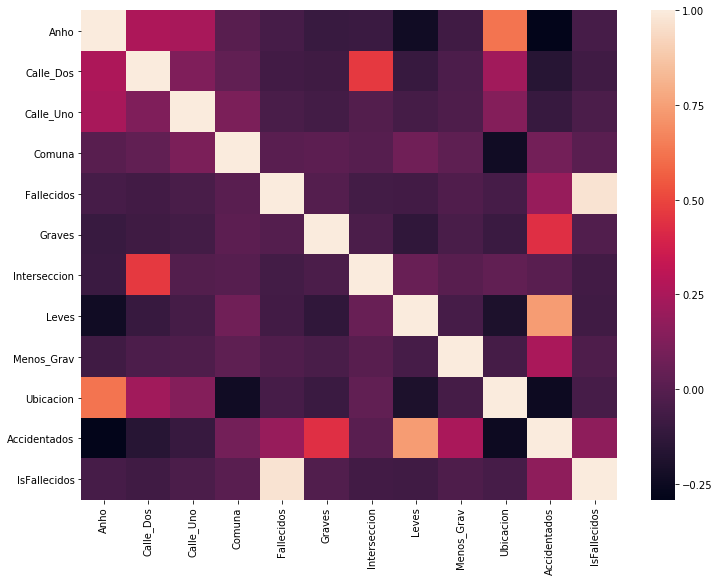

In [2246]:
plt.rcParams["figure.figsize"] = (12,9)
sns.heatmap(datos.corr(), square = False, annot = False)

In [2247]:
# 'Fallecidos' e 'IsFallecidos' están muy correlacionadas,
# además, sólo queremos predecir si el atropello será fatal,
# borramos 'Fallecidos'
datos = datos.drop('Fallecidos',1)

## Después

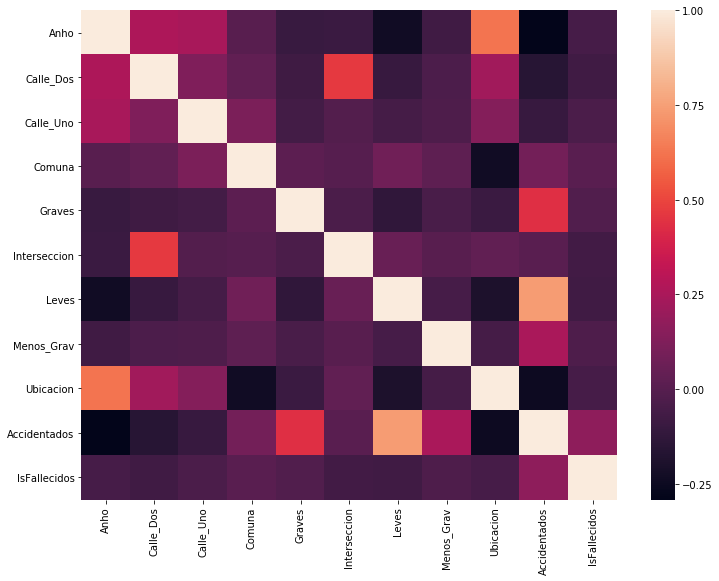

In [2248]:
plt.rcParams["figure.figsize"] = (12,9)
sns.heatmap(datos.corr(), square = False, annot = False)

# Agrupando

## Histograma antes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CCB8085C0>,
      dtype=object)

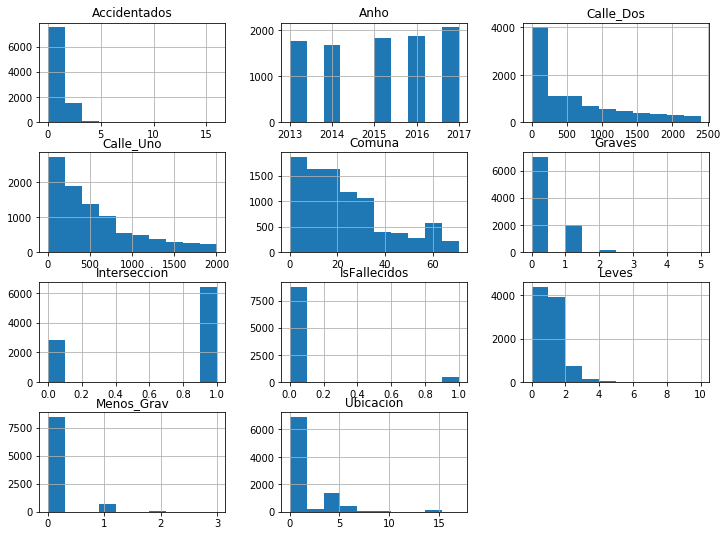

In [2249]:
# Histograma de los datos. Indica la cantidad de datos que son iguales.
datos.hist()

# Accidentados

In [2250]:
datos.Accidentados.value_counts()

1.0     5645
0.0     1874
2.0     1230
3.0      303
4.0      108
5.0       33
6.0       17
8.0       11
7.0       11
11.0       2
9.0        2
10.0       2
16.0       1
12.0       1
Name: Accidentados, dtype: int64

In [2251]:
# Agrupamos en:
# 0: No hay accidentados.
# 1: Hay un accidentado.
# 2: Hay más de un accidentado
datos.loc[datos['Accidentados'] > 1, 'Accidentados'] = 2

# Le cambiamos el nombre
#datos.rename(columns={'Accidentados':'IsAccidentados'}, inplace=True)

#datos[''] = np.where(datos['Accidentados'] > 1, 2)

In [2252]:
datos.Accidentados.value_counts()

1.0    5645
0.0    1874
2.0    1721
Name: Accidentados, dtype: int64

# Creando IsGraves

In [2253]:
datos.Graves.value_counts()

0.0    6985
1.0    2033
2.0     187
3.0      29
4.0       5
5.0       1
Name: Graves, dtype: int64

In [2254]:
# Agrupamos en:
# 0: No hay graves.
# 1: Hay graves.
datos.loc[datos['Graves'] > 0, 'Graves'] = 1

# Le cambiamos el nombre
datos.rename(columns={'Graves':'IsGraves'}, inplace=True)

In [2255]:
datos.IsGraves.value_counts()

0.0    6985
1.0    2255
Name: IsGraves, dtype: int64

# Renombrando a IsInterseccion

In [2256]:
# Le cambiamos el nombre
datos.rename(columns={'Interseccion':'IsInterseccion'}, inplace=True)

# Creando IsLeves

In [2257]:
datos.Leves.value_counts()

0.0     4378
1.0     3908
2.0      746
3.0      146
4.0       32
5.0       16
6.0        8
7.0        5
10.0       1
Name: Leves, dtype: int64

In [2258]:
# Agrupamos en:
# 0: No hay leves.
# 1: Hay leves.
datos.loc[datos['Leves'] > 0, 'Leves'] = 1

# Le cambiamos el nombre
datos.rename(columns={'Leves':'IsLeves'}, inplace=True)

In [2259]:
datos.IsLeves.value_counts()

1.0    4862
0.0    4378
Name: IsLeves, dtype: int64

# Creando Menos_Grav

In [2260]:
datos.Menos_Grav.value_counts()

0.0    8484
1.0     710
2.0      44
3.0       2
Name: Menos_Grav, dtype: int64

In [2261]:
# Agrupamos en:
# 0: No hay menos graves.
# 1: Hay menos graves.
datos.loc[datos['Menos_Grav'] > 0, 'Menos_Grav'] = 1

# Le cambiamos el nombre
datos.rename(columns={'Menos_Grav':'IsMenos_Grav'}, inplace=True)

In [2262]:
datos.IsMenos_Grav.value_counts()

0.0    8484
1.0     756
Name: IsMenos_Grav, dtype: int64

# Ubicacion

In [2263]:
datos.Ubicacion.value_counts()

0     5299
1     1627
5     1075
6      455
4      315
3      216
14      93
7       71
10      53
9       14
12       6
8        6
11       4
15       2
13       1
2        1
17       1
16       1
Name: Ubicacion, dtype: int64

In [2264]:
# Agrupamos en:
# 0: Sin Información (S/I).
# 1: Sí anotaron el tipo de ubicación.
datos.loc[datos['Ubicacion'] > 1, 'Ubicacion'] = 1

# Le cambiamos el nombre
datos.rename(columns={'Ubicacion':'IsUbicacion'}, inplace=True)

In [2265]:
# AHORA ESTÁ MÁS EQUILIBRADO, PERO CREO QUE PIERDE EL PROPÓSITO
# POR ESO CREO QUE ES MEJOR BORRAR 'Ubicacion' 
# Y SI HACEMOS OTRO MODELO SÓLO CON 2016 Y 2017, AHÍ RECIÉN CONSIDERAR ESA COLUMNA
datos.IsUbicacion.value_counts()

# Al final lo vamos a borrar
datos = datos.drop('IsUbicacion',1)

## Histograma después

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CCB2E6160>,
      dtype=object)

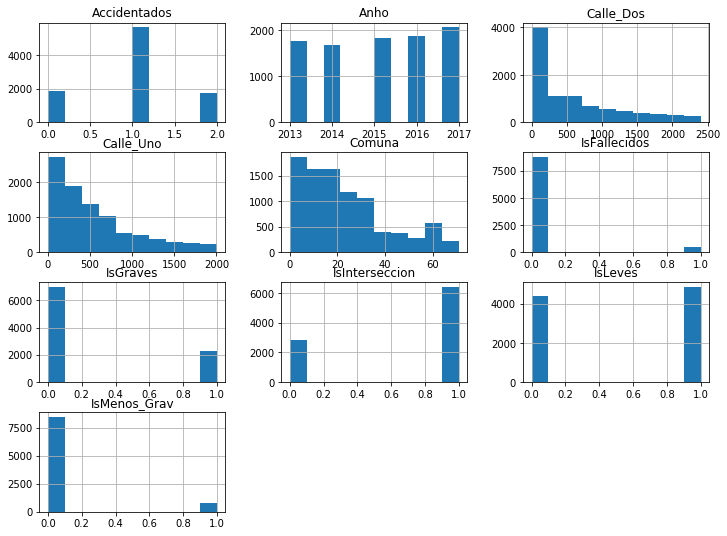

In [2266]:
datos.hist()

# Separando entrenamiento y pruebas

In [2267]:
# Guardamos el nombre de las columnas
columnas = datos.columns.tolist()

# Le quitamos la columna a predecir
columnas.remove("IsFallecidos")

In [2268]:
#Se indican las variables predictoras (X o Features)
predictors = datos[columnas]

In [2269]:
#Se define la clase a predecir (Y o Labels)
targets = datos['IsFallecidos']

In [2270]:
#Se crea la muestra de entrenamiento(70%) y de test(30%)
Entrenamiento_datos, Prueba_datos, Entrenamiento_target, Prueba_target = train_test_split(predictors, targets, test_size=0.3)

In [2271]:
#Se comprobueba tamaño de las muestras(Entrenamiento=Entrenamiento_datos; Prueba=Prueba_datos, 
#Target de Entrenamiento = Entrenamiento_target, Target de Prueba = Prueba_target)

print('Entrenamiento_datos: ')
print(Entrenamiento_datos.shape)

print('Prueba_datos: ')
print(Prueba_datos.shape)

print('Entrenamiento_target: ')
print(Entrenamiento_target.shape)

print('Prueba_target: ')
print(Prueba_target.shape)

#print(Entrenamiento_datos.shape, Prueba_datos.shape, Entrenamiento_target.shape, Prueba_target.shape)

Entrenamiento_datos: 
(6468, 9)
Prueba_datos: 
(2772, 9)
Entrenamiento_target: 
(6468,)
Prueba_target: 
(2772,)


# Random Forest

In [2272]:
#construimos nuestro random forest con los datos de entrenamiento y 50 arboles
rf = RandomForestClassifier(n_estimators = 1000, random_state = 25, max_features=9 ,max_depth= 30)
rf = rf.fit(Entrenamiento_datos, Entrenamiento_target)
# score: Returns the mean accuracy on the given test data and labels.
# retorna la precisión media
#print ("Score: ",rf.score(Entrenamiento_datos, Entrenamiento_target))
print ("Score: ",rf.score(Prueba_datos, Prueba_target))

Score:  0.9783549783549783


In [2273]:
#Obtenemos la matriz de confusion de las predicciones del grupo de prueba. La diagonal de esta matriz se lee: 
#arriba a la izquerda True Negatives y abajo a la derecha True Positives

# Negativos_Verdaderos  Positios_Falsos
# Negativos_Falsos      Positivos_Verdaderos

predictions = rf.predict(Prueba_datos)
sklearn.metrics.confusion_matrix(Prueba_target,predictions)

array([[2614,   13],
       [  47,   98]], dtype=int64)

In [2274]:
#sacamos el indice Accuracy Score, que resuma la certeza de los resultados obtenidos en comparación con los originales
# Es un porcenaje de precisión, si le achunta a 2 de 4, retorna 0.5
print ("Precisión del modelo: ", round(sklearn.metrics.accuracy_score(Prueba_target, predictions),4) *100, "%")

Precisión del modelo:  97.84 %


## Pruebas

In [2275]:
# Escogemos datos a probar
cant_datos = datos.Anho.count() -1
print(cant_datos)
# loc: numero de la fila, iloc: índice de la fila (como la posición en una lista)

prueba1 = datos.iloc[[cant_datos]]
prueba2 = datos.iloc[[cant_datos-1]]
prueba3 = datos.iloc[[cant_datos-2]]

9239


In [2276]:
prueba1

Anho  Calle_Dos  Calle_Uno  Comuna  IsGraves  IsInterseccion  IsLeves  \
2065  2017       2395        435       1       0.0               1      0.0   

      IsMenos_Grav  Accidentados  IsFallecidos  
2065           0.0           0.0             0

In [2277]:
rf.predict([[2017, 3080, 438,      1,     0.0,          1,    0.0,        0.0,       0.0]])

array([0])

In [2278]:
prueba2

Anho  Calle_Dos  Calle_Uno  Comuna  IsGraves  IsInterseccion  IsLeves  \
2064  2017       1215        114       6       1.0               0      0.0   

      IsMenos_Grav  Accidentados  IsFallecidos  
2064           0.0           1.0             0

In [2279]:
rf.predict([[2017, 1235, 114,      6,     1.0,          0,    0.0,        0.0,       0.0]])

array([0])

In [2280]:
prueba3

Anho  Calle_Dos  Calle_Uno  Comuna  IsGraves  IsInterseccion  IsLeves  \
2063  2017        424        401      13       1.0               1      1.0   

      IsMenos_Grav  Accidentados  IsFallecidos  
2063           0.0           2.0             0

In [2281]:
rf.predict([[2017, 428,  404,      13,    1.0,          1,    1.0,        0.0,       2.0]])

array([0])

In [2282]:
p = rf.predict([[2017, 428,  404,      13,    1.0,          1,    1.0,        0.0,       2.0]])[0]

In [2283]:
print(p)

0


## Visualizando aciertos

[[2614   13]
 [  47   98]]
Negativos_Verdaderos: 2614
Negativos_Falsos: 47
Positivos_Falsos: 13
Positivos_Verdaderos: 98
Total: 2772
   Aciertos  Total
0      2712   2772


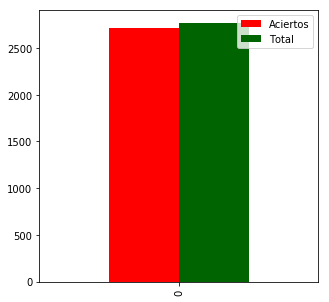

In [2284]:
print(sklearn.metrics.confusion_matrix(Prueba_target,predictions))

# Negativos_Verdaderos  Positios_Falsos
# Negativos_Falsos      Positivos_Verdaderos

Negativos_Verdaderos = sklearn.metrics.confusion_matrix(Prueba_target,predictions)[0][0]
print('Negativos_Verdaderos:',Negativos_Verdaderos)

Negativos_Falsos = sklearn.metrics.confusion_matrix(Prueba_target,predictions)[1][0]
print('Negativos_Falsos:',Negativos_Falsos)

Positivos_Falsos = sklearn.metrics.confusion_matrix(Prueba_target,predictions)[0][1]
print('Positivos_Falsos:',Positivos_Falsos)

Positivos_Verdaderos = sklearn.metrics.confusion_matrix(Prueba_target,predictions)[1][1]
print('Positivos_Verdaderos:',Positivos_Verdaderos)

Aciertos = Positivos_Verdaderos + Negativos_Verdaderos
Fallos = Positivos_Falsos + Negativos_Falsos

Total = Aciertos + Fallos
print('Total:',Total)

Dic = {
    "Aciertos" : Aciertos,
    "Total" : Total
}
dE=pd.DataFrame(Dic, index=[0])
print(dE)
#dE.sort_values(by="Aciertos",ascending=False,inplace=True)
#print (dE)
dE.loc[:,['Aciertos','Total']].plot.bar(stacked=False, color=["#FF0000","#006400"], figsize=(5,5))

## Importancia de cada variable

In [2285]:
# Obtenemos la importancia o qué tanto influyeron los campos del dataframe en el modelo
print('Importancia de cada variable:')
feature_imp = pd.Series(rf.feature_importances_, index = columnas).sort_values(ascending=False)
feature_imp

Importancia de cada variable:


IsMenos_Grav      0.421578
IsGraves          0.183300
Calle_Uno         0.105738
Calle_Dos         0.099307
Accidentados      0.079946
Comuna            0.061058
Anho              0.023977
IsLeves           0.021067
IsInterseccion    0.004029
dtype: float64

In [2286]:
# Obtenemos la importancia o qué tanto influyeron los campos del dataframe en el modelo
#importances = list(rf.feature_importances_)
#importances=sorted(importances,reverse=True)
#for n in range(len(importances)):
#    print ("Importancia de [", columnas[n], "] : ",round(importances[n],4)*100,"%")

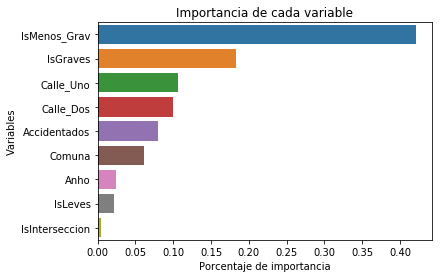

In [2287]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Porcentaje de importancia')
plt.ylabel('Variables')
plt.title("Importancia de cada variable")
#plt.legend()
plt.show()

In [2288]:
# Replicamos el modelo, pero esta vez sin IsIntersección, ya que hace ruido

# Guardamos el nombre de las columnas
columnas = datos.columns.tolist()

# Le quitamos la columna a predecir
columnas.remove("IsFallecidos")

# Le quitamos la columna sin importancia
columnas.remove("IsInterseccion")

#Se indican las variables predictoras (X o Features)
predictors = datos[columnas]

#Se define la clase a predecir (Y o Labels)
targets = datos['IsFallecidos']

#Se crea la muestra de entrenamiento(70%) y de test(30%)
Entrenamiento_datos, Prueba_datos, Entrenamiento_target, Prueba_target = train_test_split(predictors, targets, test_size=0.3)

#Se comprobueba tamaño de las muestras(Entrenamiento=Entrenamiento_datos; Prueba=Prueba_datos, 
#Target de Entrenamiento = Entrenamiento_target, Target de Prueba = Prueba_target)

print('Entrenamiento_datos: ')
print(Entrenamiento_datos.shape)

print('Prueba_datos: ')
print(Prueba_datos.shape)

print('Entrenamiento_target: ')
print(Entrenamiento_target.shape)

print('Prueba_target: ')
print(Prueba_target.shape)

#print(Entrenamiento_datos.shape, Prueba_datos.shape, Entrenamiento_target.shape, Prueba_target.shape)

#construimos nuestro random forest con los datos de entrenamiento y 50 arboles
rf = RandomForestClassifier(n_estimators = 1000, random_state = 25, max_features=8 ,max_depth= 30)
rf = rf.fit(Entrenamiento_datos, Entrenamiento_target)
# score: Returns the mean accuracy on the given test data and labels.
# retorna la precisión media
#print ("Score: ",rf.score(Entrenamiento_datos, Entrenamiento_target))
print ("Score: ",rf.score(Prueba_datos, Prueba_target))

#Obtenemos la matriz de confusion de las predicciones del grupo de prueba. La diagonal de esta matriz se lee: 
#arriba a la izquerda True Negatives y abajo a la derecha True Positives

# Negativos_Verdaderos  Positios_Falsos
# Negativos_Falsos      Positivos_Verdaderos

predictions = rf.predict(Prueba_datos)
print(sklearn.metrics.confusion_matrix(Prueba_target,predictions))

#sacamos el indice Accuracy Score, que resuma la certeza de los resultados obtenidos en comparación con los originales
# Es un porcenaje de precisión, si le achunta a 2 de 4, retorna 0.5
print ("Precisión del modelo: ", round(sklearn.metrics.accuracy_score(Prueba_target, predictions),4) *100, "%")

# Obtenemos la importancia o qué tanto influyeron los campos del dataframe en el modelo
#print('Importancia de cada variable:')
feature_imp = pd.Series(rf.feature_importances_, index = columnas).sort_values(ascending=False)

Entrenamiento_datos: 
(6468, 8)
Prueba_datos: 
(2772, 8)
Entrenamiento_target: 
(6468,)
Prueba_target: 
(2772,)
Score:  0.9797979797979798
[[2620   10]
 [  46   96]]
Precisión del modelo:  97.98 %


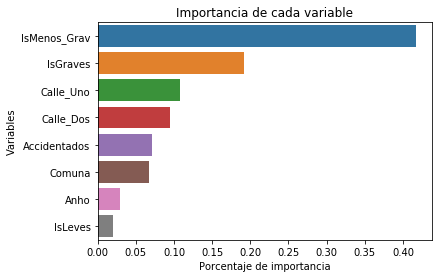

In [2289]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Porcentaje de importancia')
plt.ylabel('Variables')
plt.title("Importancia de cada variable")
#plt.legend()
plt.show()

### ¿CON O SIN LA VARIABLE 'IsInterseccion'? QUEDARSE CON LA QUE DE MEJOR PRECISIÓN

## Visualizando aciertos

In [2290]:
sklearn.metrics.confusion_matrix(Prueba_target,predictions)

array([[2620,   10],
       [  46,   96]], dtype=int64)

In [2291]:
# Negativos_Verdaderos  Positios_Falsos
# Negativos_Falsos      Positivos_Verdaderos

Negativos_Verdaderos = sklearn.metrics.confusion_matrix(Prueba_target,predictions)[0][0]
print('Negativos_Verdaderos:',Negativos_Verdaderos)

Negativos_Falsos = sklearn.metrics.confusion_matrix(Prueba_target,predictions)[1][0]
print('Negativos_Falsos:',Negativos_Falsos)

Positivos_Falsos = sklearn.metrics.confusion_matrix(Prueba_target,predictions)[0][1]
print('Positivos_Falsos:',Positivos_Falsos)

Positivos_Verdaderos = sklearn.metrics.confusion_matrix(Prueba_target,predictions)[1][1]
print('Positivos_Verdaderos:',Positivos_Verdaderos)

Aciertos = Positivos_Verdaderos + Negativos_Verdaderos
Fallos = Positivos_Falsos + Negativos_Falsos

Total = Aciertos + Fallos
print('Total:',Total)

Negativos_Verdaderos: 2620
Negativos_Falsos: 46
Positivos_Falsos: 10
Positivos_Verdaderos: 96
Total: 2772


In [2292]:
#N = 1
##N = 5

#aciertos = (Positivos_Verdaderos + Negativos_Verdaderos)
#totales = (total)
##menMeans = (20, 35, 30, 35, 27)
##womenMeans = (25, 32, 34, 20, 25)

##menStd = (2, 3, 4, 1, 2)
##womenStd = (3, 5, 2, 3, 3)

#ind = np.arange(N)    # the x locations for the groups
#width = 0.35       # the width of the bars: can also be len(x) sequence

#p1 = plt.bar(ind, aciertos, width)
#p2 = plt.bar(ind, totales, width,bottom=aciertos)
##p1 = plt.bar(ind, menMeans, width, yerr=menStd)
##p2 = plt.bar(ind, womenMeans, width,bottom=menMeans, yerr=womenStd)


#plt.ylabel('Cantidad de registros')
#plt.title('Aciertos en base al total')
##plt.ylabel('Scores')
##plt.title('Scores by group and gender')

####plt.xticks(ind, ('IsFallecidos'))
##plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))

####plt.yticks(np.arange(0, 81, 10))
##plt.yticks(np.arange(0, 81, 10))

#plt.legend((p1[0], p2[0]), ('Aciertos', 'Total'))
##plt.legend((p1[0], p2[0]), ('Men', 'Women'))

#plt.show()

   Aciertos  Total
0      2716   2772


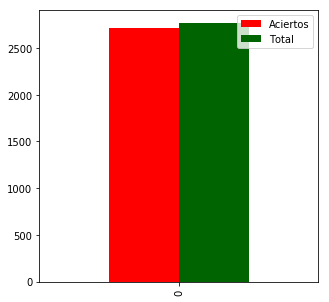

In [2293]:
Dic = {
    "Aciertos" : Aciertos,
    "Total" : Total
}
dE=pd.DataFrame(Dic, index=[0])
print(dE)
#dE.sort_values(by="Aciertos",ascending=False,inplace=True)
#print (dE)
dE.loc[:,['Aciertos','Total']].plot.bar(stacked=False, color=["#FF0000","#006400"], figsize=(5,5))

In [2294]:
## Forma 1:

#%matplotlib inline
##this preceding line is needed to display a plot inline on Windows

##plot the test and predictions
## Igual que plt.scatter(Y_test, pred_test, color = 'black')
#plt.scatter(Prueba_target, predictions, color = 'black')

##draw a line through the middle showing the fit
##x0 = min(Prueba_target)
##x1 = max(Prueba_target)
##y0 = min(predictions)
##y1 = max(predictions)
##plt.plot([x0,x1],[y0,y1], color = "red")

##add labels
#plt.xlabel("IsFallecidos real")
#plt.ylabel("IsFallecidos predecida")
#plt.title("IsFallecidos real vs IsFallecidos predecida")

#plt.show()

In [2295]:
# Forma 2:

#plt.scatter(datos.isPopular, lm.predict(X))
#plt.scatter(Prueba_target, predictions)
#plt.xlabel("Popularidad real")
#plt.ylabel("Popularidad predecida")
#plt.title("Popularidad real vs Popularidad predecida")

#draw a line through the middle showing the fit
#x0 = min(Prueba_target)
#x1 = max(Prueba_target)
#y0 = min(predictions)
#y1 = max(predictions)
#plt.plot([x0,x1],[y0,y1], color = "red")

# Regresión lineal

## Esta no

In [2296]:
## Guardamos el nombre de las columnas
#columnas = datos.columns.tolist()

## Le quitamos la columna a predecir
#columnas.remove("IsFallecidos")

##Se indican las variables predictoras (X o Features)
#predictors = datos[columnas]

##Se define la clase a predecir (Y o Labels)
#targets = datos['IsFallecidos']

##Se crea la muestra de entrenamiento(70%) y de test(30%)
#Entrenamiento_datos, Prueba_datos, Entrenamiento_target, Prueba_target = train_test_split(predictors, targets, test_size=0.3)

In [2297]:
## importando el modelo de regresión lineal
#from sklearn.linear_model import LinearRegression

#rl = LinearRegression() # Creando el modelo.
#rl.fit(Entrenamiento_datos, Entrenamiento_target) # ajustando el modelo

In [2298]:
## Lista de coeficientes B para cada X
#list(zip(columnas, rl.coef_))

In [2299]:
## haciendo las predicciones
#predicciones = rl.predict(Prueba_datos)
#predicciones_df = pd.DataFrame(predicciones, columns=['Pred'])
#predicciones_df.head() # predicciones de las primeras 5 lineas

In [2300]:
## Calculando el desvio
#np.mean(Prueba_target - predicciones)

## Esta si

X_train (6468, 9)
X_test (2772, 9)
Y_train (6468,)
Y_test (2772,)


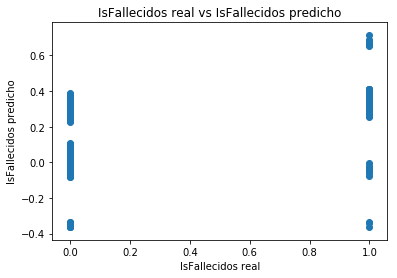

In [2301]:
# Fuente: https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

from sklearn.linear_model import LinearRegression
#import sklearn.cross_validation
#sklearn.model_selection.train_test_split

# X = Datos sin la popularidad
X = datos.drop('IsFallecidos', axis = 1)

#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, datos.IsFallecidos, test_size=0.3)#, random_state = 5)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, datos.IsFallecidos, test_size=0.3)#, random_state = 5)

# Igual a training_data
print("X_train", X_train.shape)
# Igual a testing_data
print("X_test", X_test.shape)
# Igual a training_target
print("Y_train", Y_train.shape)
# Igual a testing_target
print("Y_test", Y_test.shape)

# Igual a regr = linear_model.LinearRegression()
lm = LinearRegression()
# Igual a regr.fit(training_data, training_target)
lm.fit(X_train, Y_train)
# No se encuentra en el primer ejemplo
pred_train = lm.predict(X_train)
# Igual a prediction_of_test = regr.predict(testing_data)
pred_test = lm.predict(X_test)

# Igual a plt.scatter(testing_target, prediction_of_test, color = 'black')
# testing_target: Son todos los valores destinados a testing, sólo de la columna isPopular
# prediction_of_test: Predicción de los datos de testing sin la columna isPopular

#plt.scatter(datos.isPopular, lm.predict(X))
plt.scatter(Y_test, pred_test)
plt.xlabel("IsFallecidos real")
plt.ylabel("IsFallecidos predicho")
plt.title("IsFallecidos real vs IsFallecidos predicho")

#draw a line through the middle showing the fit
x0 = min(Y_test)
x1 = max(Y_test)
y0 = min(pred_test)
y1 = max(pred_test)
#plt.plot([x0,x1],[y0,y1], color = "red")

### Matriz de confusión

In [2302]:
#Obtenemos la matriz de confusion de las predicciones del grupo de prueba. La diagonal de esta matriz se lee: 
#arriba a la izquerda True Negatives y abajo a la derecha True Positives
sklearn.metrics.confusion_matrix(Y_test, lm.predict(X_test).round())

array([[2621,    0],
       [ 145,    6]], dtype=int64)

### Precisión del modelo

In [2303]:
#sacamos el indice Accuracy Score, que resuma la certeza de los resultados obtenidos en comparación con los originales
#print("Certeza del modelo: ", round(sklearn.metrics.accuracy_score(testing_target, lm.predict(X_test).round()),4) *100, "%")
print("Precisión del modelo: ", sklearn.metrics.accuracy_score(Y_test, lm.predict(X_test).round()))

Precisión del modelo:  0.9476911976911977


In [2304]:
# Retorna el coeficiente de determinación (R^2)
print ("Score: ",lm.score(X_train, Y_train))

Score:  0.27729992229561196


In [2305]:
#print("Cantidad de coeficientes: ", len(lm.coef_))
#print("Importancia de las columnas (más alto el coeficiente, mayor la importancia):")
#pd.DataFrame(zip(X.columns, lm.coef_), columns = ['Variable', 'Coeficiente estimado'])

### Importancias

In [2306]:
columnasRL = datos.columns.tolist()
columnasRL.remove("IsFallecidos")

# Obtenemos la importancia o qué tanto influyeron los campos del dataframe en el modelo
print("Importancia de las columnas (más alto el coeficiente, mayor la importancia):")
feature_imp = pd.Series(lm.coef_, index = columnasRL).sort_values(ascending=False)
feature_imp

Importancia de las columnas (más alto el coeficiente, mayor la importancia):


Accidentados      0.304083
Comuna            0.000290
Calle_Uno        -0.000008
Calle_Dos        -0.000012
Anho             -0.008875
IsInterseccion   -0.022618
IsMenos_Grav     -0.303133
IsGraves         -0.328665
IsLeves          -0.387026
dtype: float64

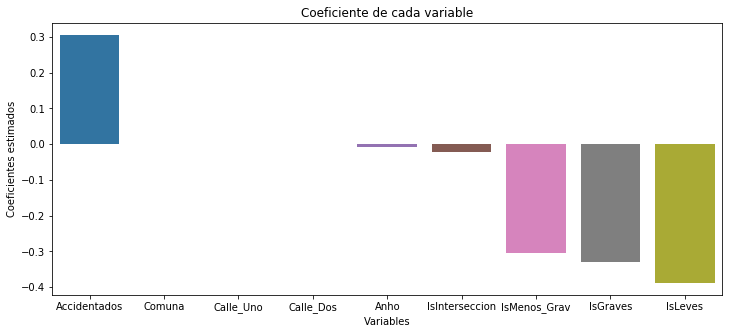

In [2307]:
%matplotlib inline

plt.figure(figsize=(12, 5))

# Creating a bar plot
sns.barplot(y=feature_imp, x=feature_imp.index)
# Add labels to your graph
plt.ylabel('Coeficientes estimados')
plt.xlabel('Variables')
plt.title("Coeficiente de cada variable")
#plt.legend()
plt.show()

### Modelando después de sacar los menos importantes (ruido)

X_train2 (6468, 6)
X_test2 (2772, 6)
Y_train2 (6468,)
Y_test2 (2772,)


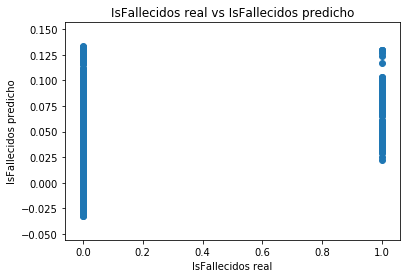

In [2308]:
from sklearn.linear_model import LinearRegression
#import sklearn.cross_validation
#sklearn.model_selection.train_test_split

# X = Datos sin la popularidad
X2 = datos.drop('IsFallecidos', axis = 1)

# Borramos las que tienen poca importancia
X2 = X2.drop('IsMenos_Grav', axis = 1)
X2 = X2.drop('IsGraves', axis = 1)
X2 = X2.drop('IsLeves', axis = 1)


#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, datos.IsFallecidos, test_size=0.3)#, random_state = 5)
X_train2, X_test2, Y_train2, Y_test2 = sklearn.model_selection.train_test_split(X2, datos.IsFallecidos, test_size=0.3)#, random_state = 5)

# Igual a training_data
print("X_train2", X_train2.shape)
# Igual a testing_data
print("X_test2", X_test2.shape)
# Igual a training_target
print("Y_train2", Y_train2.shape)
# Igual a testing_target
print("Y_test2", Y_test2.shape)

# Igual a regr = linear_model.LinearRegression()
lm2 = LinearRegression()
# Igual a regr.fit(training_data, training_target)
lm2.fit(X_train2, Y_train2)
# No se encuentra en el primer ejemplo
pred_train2 = lm2.predict(X_train2)
# Igual a prediction_of_test = regr.predict(testing_data)
pred_test2 = lm2.predict(X_test2)

# Igual a plt.scatter(testing_target, prediction_of_test, color = 'black')
# testing_target: Son todos los valores destinados a testing, sólo de la columna isPopular
# prediction_of_test: Predicción de los datos de testing sin la columna isPopular

#plt.scatter(datos.isPopular, lm.predict(X))
plt.scatter(Y_test2, pred_test2)
plt.xlabel("IsFallecidos real")
plt.ylabel("IsFallecidos predicho")
plt.title("IsFallecidos real vs IsFallecidos predicho")

#draw a line through the middle showing the fit
x0 = min(Y_test2)
x1 = max(Y_test2)
y0 = min(pred_test2)
y1 = max(pred_test2)
#plt.plot([x0,x1],[y0,y1], color = "red")

### Nueva precisión

In [2309]:
#sacamos el indice Accuracy Score, que resuma la certeza de los resultados obtenidos en comparación con los originales
#print("Certeza del modelo: ", round(sklearn.metrics.accuracy_score(testing_target, lm.predict(X_test).round()),4) *100, "%")

# Da 100% de precisión, no me tinca, es muy perfecto
print("Precisión del modelo: ", sklearn.metrics.accuracy_score(Y_test2, lm2.predict(X_test2).round()))

Precisión del modelo:  0.948051948051948


In [2310]:
columnasRL2 = X2.columns.tolist()
#columnasRL.remove("IsFallecidos")

# Obtenemos la importancia o qué tanto influyeron los campos del dataframe en el modelo
print("Importancia de las columnas (más alto el coeficiente, mayor la importancia):")
feature_imp2 = pd.Series(lm2.coef_, index = columnasRL2).sort_values(ascending=False)
feature_imp2

Importancia de las columnas (más alto el coeficiente, mayor la importancia):


Accidentados      0.048455
Calle_Dos        -0.000004
Calle_Uno        -0.000014
Comuna           -0.000123
Anho             -0.000147
IsInterseccion   -0.027985
dtype: float64

### Visualizando aciertos

In [2311]:
#matrizRL = sklearn.metrics.confusion_matrix(Y_test, lm.predict(X_test).round())
matrizRL = sklearn.metrics.confusion_matrix(Y_test2, lm2.predict(X_test2).round())

# Negativos_Verdaderos  Positios_Falsos
# Negativos_Falsos      Positivos_Verdaderos

Negativos_VerdaderosRL = matrizRL[0][0]
print('Negativos_VerdaderosRL:',Negativos_VerdaderosRL)

Negativos_FalsosRL = matrizRL[1][0]
print('Negativos_FalsosRL:',Negativos_FalsosRL)

Positivos_FalsosRL = matrizRL[0][1]
print('Positivos_FalsosRL:',Positivos_FalsosRL)

Positivos_VerdaderosRL = matrizRL[1][1]
print('Positivos_VerdaderosRL:',Positivos_VerdaderosRL)

AciertosRL = Positivos_VerdaderosRL + Negativos_VerdaderosRL
FallosRL = Positivos_FalsosRL + Negativos_FalsosRL

TotalRL = AciertosRL + FallosRL
print('TotalRL:',TotalRL)

Negativos_VerdaderosRL: 2628
Negativos_FalsosRL: 144
Positivos_FalsosRL: 0
Positivos_VerdaderosRL: 0
TotalRL: 2772


In [2322]:
matrizRL

array([[2628,    0],
       [ 144,    0]], dtype=int64)

   AciertosRL  TotalRL
0        2628     2772


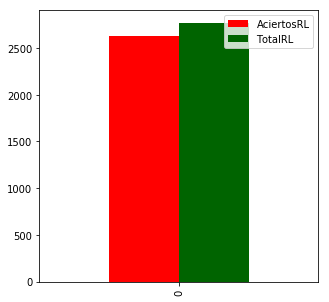

In [2312]:
DicRL = {
    "AciertosRL" : AciertosRL,
    "TotalRL" : TotalRL
}
dERL=pd.DataFrame(DicRL, index=[0])
print(dERL)
#dE.sort_values(by="Aciertos",ascending=False,inplace=True)
#print (dE)
dERL.loc[:,['AciertosRL','TotalRL']].plot.bar(stacked=False, color=["#FF0000","#006400"], figsize=(5,5))

# Ada-Boost

In [2313]:
from sklearn.ensemble import AdaBoostClassifier


# X = Datos sin la popularidad
XAB = datos.drop('IsFallecidos', axis = 1)

#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, datos.IsFallecidos, test_size=0.3)#, random_state = 5)
X_trainAB, X_testAB, Y_trainAB, Y_testAB = sklearn.model_selection.train_test_split(XAB, datos.IsFallecidos, test_size=0.3)#, random_state = 5)

# Igual a training_data
print("X_trainAB", X_trainAB.shape)
# Igual a testing_data
print("X_testAB", X_testAB.shape)
# Igual a training_target
print("Y_trainAB", Y_trainAB.shape)
# Igual a testing_target
print("Y_testAB", Y_testAB.shape)


# Creamos el modelo
ada_boost_classifier = AdaBoostClassifier()
# Se ajusta el modelo
ada_boost_classifier.fit(X_trainAB, Y_trainAB)
# Sacamos la predicción con el grupo de evaluación
test_prediction = ada_boost_classifier.predict(X_testAB)
# 
ada_boost_score = round( (np.count_nonzero(test_prediction == Y_testAB) / float(Y_testAB.size))*100 , 1)
print("Precisión en muestra de evaluación (Ada-Boost): {}%".format(ada_boost_score))
# print "Precisión en muestra de evaluación: ", round( dtc.score(x_test, y_test), 4) * 100, "%"

X_trainAB (6468, 9)
X_testAB (2772, 9)
Y_trainAB (6468,)
Y_testAB (2772,)
Precisión en muestra de evaluación (Ada-Boost): 95.0%


In [2314]:
print("Matriz de confusión de las predicciones:")
print(sklearn.metrics.confusion_matrix(Y_testAB, test_prediction))

Matriz de confusión de las predicciones:
[[2606   27]
 [ 111   28]]


Porcentaje de importancia de cada columna


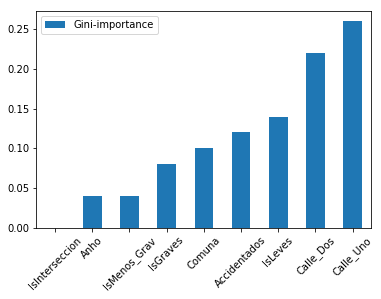

In [2315]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

# Guardamos el nombre de las columnas
columnas = datos.columns.tolist()

# Le quitamos la columna a predecir
columnas.remove("IsFallecidos")


feats = {} # a dict to hold feature_name: feature_importance
#columnasAB = ['actual','title','male','culture','house','spouse','book1','book2','book3','book4',
#                                        'book5', 'isAliveSpouse', 'isMarried', 'isNoble', 'numDeadRelations', 'boolDeadRelations']
columnasAB = columnas

for feature, importance in zip(datos[columnasAB], ada_boost_classifier.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
print("Porcentaje de importancia de cada columna")
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
#importances.plot(kind='bar', rot=45)

## Modelando después de sacar los menos importantes (ruido)

In [2316]:

# X = Datos sin la popularidad
XAB2 = datos.drop('IsFallecidos', axis = 1)
XAB2 = XAB2.drop('IsInterseccion', axis = 1)

#X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, datos.IsFallecidos, test_size=0.3)#, random_state = 5)
X_trainAB2, X_testAB2, Y_trainAB2, Y_testAB2 = sklearn.model_selection.train_test_split(XAB2, datos.IsFallecidos, test_size=0.3)#, random_state = 5)

# Igual a training_data
print("X_trainAB2", X_trainAB2.shape)
# Igual a testing_data
print("X_testAB2", X_testAB2.shape)
# Igual a training_target
print("Y_trainAB2", Y_trainAB2.shape)
# Igual a testing_target
print("Y_testAB2", Y_testAB2.shape)


# Creamos el modelo
ada_boost_classifier2 = AdaBoostClassifier()
# Se ajusta el modelo
ada_boost_classifier2.fit(X_trainAB2, Y_trainAB2)
# Sacamos la predicción con el grupo de evaluación
test_prediction2 = ada_boost_classifier2.predict(X_testAB2)
# 
ada_boost_score2 = round( (np.count_nonzero(test_prediction2 == Y_testAB2) / float(Y_testAB2.size))*100 , 1)
print("Precisión en muestra de evaluación (Ada-Boost): {}%".format(ada_boost_score2))
# print "Precisión en muestra de evaluación: ", round( dtc.score(x_test, y_test), 4) * 100, "%"

X_trainAB2 (6468, 8)
X_testAB2 (2772, 8)
Y_trainAB2 (6468,)
Y_testAB2 (2772,)
Precisión en muestra de evaluación (Ada-Boost): 94.5%


## Visualizando aciertos

In [2317]:
matrizAB = sklearn.metrics.confusion_matrix(Y_testAB2, test_prediction2)
#sklearn.metrics.confusion_matrix(Y_testAB, test_prediction)
#.round()

# Negativos_Verdaderos  Positios_Falsos
# Negativos_Falsos      Positivos_Verdaderos

Negativos_VerdaderosAB = matrizAB[0][0]
print('Negativos_VerdaderosAB:',Negativos_VerdaderosAB)

Negativos_FalsosAB = matrizAB[1][0]
print('Negativos_FalsosAB:',Negativos_FalsosAB)

Positivos_FalsosAB = matrizAB[0][1]
print('Positivos_FalsosAB:',Positivos_FalsosAB)

Positivos_VerdaderosAB = matrizAB[1][1]
print('Positivos_VerdaderosAB:',Positivos_VerdaderosAB)

AciertosAB = Positivos_VerdaderosAB + Negativos_VerdaderosAB
FallosAB = Positivos_FalsosAB + Negativos_FalsosAB

TotalAB = AciertosAB + FallosAB
print('TotalAB:',TotalAB)

Negativos_VerdaderosAB: 2605
Negativos_FalsosAB: 126
Positivos_FalsosAB: 27
Positivos_VerdaderosAB: 14
TotalAB: 2772


   AciertosAB  TotalAB
0        2619     2772


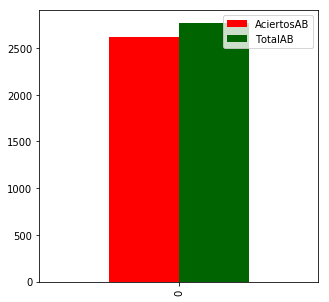

In [2318]:
DicAB = {
    "AciertosAB" : AciertosAB,
    "TotalAB" : TotalAB
}
dEAB=pd.DataFrame(DicAB, index=[0])
print(dEAB)
#dE.sort_values(by="Aciertos",ascending=False,inplace=True)
#print (dE)
dEAB.loc[:,['AciertosAB','TotalAB']].plot.bar(stacked=False, color=["#FF0000","#006400"], figsize=(5,5))

In [2319]:
##                       actual,title,male,culture,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular
## prueba2
#dataframe_test.loc[0] = ( 1,   172,   1,    6,     63,   21,    0,    0,     0,   1,     1,       1.0,         1,      1,          0,                0,             0)
## prueba3
##dataframe_test.loc[0] = ( 0,    7,    0,    9,      0,   122,   1,     1,   1,    0,    1,         1,           1,     0,        5,                 1,             1)                                       

#prediccion = ada_boost_classifier.predict(dataframe_test.drop(['isPopular'], axis = 1))
#print("Prediccion: " + str(prediccion))
#probabilidad = ada_boost_classifier.predict_proba(dataframe_test.drop(['isPopular'], axis = 1))
#print("Probabilidad de acierto: " + str(round(probabilidad[0][prediccion]* 100, 2))+"%")

In [2320]:
## prueba3
#dataframe_test.loc[0] = ( 0,    7,    0,    9,      0,   122,   1,     1,   1,    0,    1,         1,           1,     0,        5,                 1,             1)                                       

#prediccion = ada_boost_classifier.predict(dataframe_test.drop(['isPopular'], axis = 1))
#print("Prediccion: " + str(prediccion))
#probabilidad = ada_boost_classifier.predict_proba(dataframe_test.drop(['isPopular'], axis = 1))
#print("Probabilidad de acierto: " + str(round(probabilidad[0][prediccion]* 100, 2))+"%")

In [2323]:
datos

Anho  Calle_Dos  Calle_Uno  Comuna  IsGraves  IsInterseccion  IsLeves  \
0     2013          0          0       0       0.0               0      0.0   
1     2013          0          0       0       0.0               0      1.0   
2     2013          1          1       0       0.0               1      1.0   
3     2013          2          1       0       0.0               1      0.0   
4     2013          0          2       1       1.0               0      0.0   
5     2013          3          3       0       0.0               1      1.0   
6     2013          4          4       0       0.0               1      1.0   
7     2013          5          5       0       0.0               1      1.0   
8     2013          0          6       0       0.0               0      1.0   
9     2013          6          7       0       0.0               1      1.0   
10    2013          0          8       0       0.0               0      0.0   
11    2013          7          9       0       0.0               1      1.0   
12    2013          0         10       0       1.0               0      0.0   
13    2013          0         11       0       0.0               0      1.0   
14    2013          8         12       0       0.0               1      0.0   
15    2013          0         13       0       0.0               0      1.0   
16    2013          9         11       0       1.0               1      0.0   
17    2013         10          9       0       0.0               1      1.0   
18    2013         11         14       0       0.0               1      1.0   
19    2013          0          9       0       0.0               0      1.0   
20    2013          0         15       0       0.0               0      0.0   
21    2013         11         15       0       0.0               1      1.0   
22    2013         12         15       0       0.0               1      0.0   
23    2013         13         15       0       0.0               1      1.0   
24    2013         14         15       0       1.0               1      1.0   
25    2013         15         16       0       0.0               1      1.0   
26    2013         16         17       0       1.0               1      0.0   
27    2013         14         14       0       1.0               1      0.0   
28    2013         17         15       0       1.0               1      0.0   
29    2013          0         15       0       1.0               0      0.0   
...    ...        ...        ...     ...       ...             ...      ...   
2036  2017        162        165      21       0.0               0      0.0   
2037  2017        483       1026       1       0.0               1      0.0   
2038  2017       2394         97       6       0.0               0      0.0   
2039  2017        752       1200       1       0.0               0      0.0   
2040  2017        409        386       1       0.0               1      1.0   
2041  2017          0        384       1       1.0               0      0.0   
2042  2017        410        392       1       0.0               1      1.0   
2043  2017        768        435       1       0.0               1      0.0   
2044  2017        412       2004       1       1.0               1      1.0   
2045  2017        421        293      13       0.0               1      0.0   
2046  2017          0       2002      28       0.0               1      0.0   
2047  2017          0        402      13       0.0               0      0.0   
2048  2017       1496       1027      28       0.0               1      0.0   
2049  2017       2395        468       1       1.0               1      0.0   
2050  2017          0        402      21       1.0               0      0.0   
2051  2017         11       2005      28       0.0               1      0.0   
2052  2017       2396       2006      28       0.0               0      0.0   
2053  2017         10        448      26       0.0               1      1.0   
2054  2017        482        696       1       0.0      